# Week 1

In [39]:
# 한글 폰트

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!pip install bs4 requests

In [40]:
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import urllib.request
import datetime
import time
import json
from bs4 import BeautifulSoup
import requests
import re
from tqdm import tqdm

## BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup

# Example HTML content
html = """
<html>
    <head>
        <title>The Dormouse's story</title>
    </head>
    <body>
        <p class="title"><b>The Dormouse's story</b></p>
        <p class="story">Once upon a time there were three little sisters; and their names were
        <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
        <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
        <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
        and they lived at the bottom of a well.</p>
        <p class="story">...</p>
</body>
</html>
"""

# Creating a BeautifulSoup object
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup


<html>
<head>
<title>The Dormouse's story</title>
</head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
        <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
        <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
        <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
        and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body>
</html>

In [ ]:
soup.select('head')

[<head>
 <title>The Dormouse's story</title>
 </head>]

In [ ]:
soup.select('body')

[<body>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
         <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
         <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
         <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
         and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body>]

In [ ]:
soup.select('body')[0].text

"\nThe Dormouse's story\nOnce upon a time there were three little sisters; and their names were\n        Elsie,\n        Lacie and\n        Tillie;\n        and they lived at the bottom of a well.\n...\n"

In [ ]:
print(soup.select('p'))
print(soup.select('p.title'))

[<p class="title"><b>The Dormouse's story</b></p>, <p class="story">Once upon a time there were three little sisters; and their names were
        <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
        <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
        <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
        and they lived at the bottom of a well.</p>, <p class="story">...</p>]
[<p class="title"><b>The Dormouse's story</b></p>]


In [ ]:
print(soup.select('p.title > b'))

[<b>The Dormouse's story</b>]


In [ ]:
print(soup.select('p.story > a.sister'))

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [ ]:
print(soup.select('p.story > a.sister#link2'))

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]


In [ ]:
soup.select('p.story > a.sister#link2')[0].text

'Lacie'

In [ ]:
soup.select('p.story > a.sister#link2')[0]['href']

'http://example.com/lacie'

## Request

In [ ]:
url = 'https://www.segye.com/newsView/20240421508494?OutUrl=naver'

In [ ]:
headers = {"User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.6312.124 Safari/537.36'} # 서버에 요청이
html = requests.get(url,headers = headers)

In [ ]:
html

<Response [200]>

In [ ]:
soup = BeautifulSoup(html.text, "html.parser")
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Global site tag (gtag.js) - Google Analytics 20220531-->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-34857780-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}

  gtag('js', new Date());

  gtag('config', 'UA-34857780-1');
  gtag('config', 'G-95BQXKZ5VX');
  gtag('config', 'G-V3FF3RRGZH'); // 전체
</script>
<script type="text/javascript">
    var addresshttps = unescape(location.href);
	  
      if (document.location.protocol == 'http:') {
        if (addresshttps.indexOf('9999') > -1 || addresshttps.indexOf('sales') > -1 || addresshttps.indexOf('ucc') > -1 || addresshttps.indexOf('w1') > -1 || addresshttps.indexOf('w2') > -1 || addresshttps.indexOf('w3') > -1 ) {
        }else{
          document.location.href = document.location.href.replace('http:', 'https:');
        }
      }

     </script>
<titl

## Selenium

In [ ]:
! pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

options = Options()
options.add_argument('--headless') # 구글 코랩에서는 headless 옵션이 들어가야함
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

url = 'https://www.naver.com'
driver.get(url)

In [ ]:
search_box = driver.find_elements(By.XPATH, '/html/body/div[2]/div[1]/div/div[3]/div[2]/div/form/fieldset/div/input')[0]
search_box.clear()
search_box.send_keys('총선'+Keys.ENTER)

IndexError: list index out of range

In [ ]:
body = driver.find_elements(By.XPATH,'/html/body')[0]
body.send_keys(Keys.END)

In [ ]:
num = driver.find_elements(By.XPATH,'/html/body/div[3]/div[2]/div/div[1]/div[18]/div/div/a[2]')[0]
num.click()

In [ ]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')
soup

## Practice

### Naver News Main

In [ ]:
url = 'https://news.naver.com/'
headers = {"User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.6312.124 Safari/537.36'}
html = requests.get(url,headers = headers)
html

<Response [200]>

In [ ]:
soup = BeautifulSoup(html.text, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-s

In [ ]:
len(set([item.text for item in soup.select('li.cjs_age_item > a > div.cjs_age_name')]))

82

In [ ]:
[item.text for item in soup.select('li.cjs_age_item > a > div.cjs_age_name')]

['한국일보',
 '한겨레',
 '중앙일보',
 '세계일보',
 '동아일보',
 '국민일보',
 '조선일보',
 '문화일보',
 '서울신문',
 '경향신문',
 '디지털데일리',
 '더팩트',
 '디지털타임스',
 '노컷뉴스',
 '오마이뉴스',
 '데일리안',
 '미디어오늘',
 '지디넷코리아',
 '프레시안',
 '블로터',
 '머니S',
 '아이뉴스24',
 '전자신문',
 '뉴스1',
 'MBC',
 'SBS',
 'KBS',
 '한국경제TV',
 '연합뉴스',
 '연합뉴스TV',
 'SBS Biz',
 '뉴시스',
 'MBN',
 'JTBC',
 'TV조선',
 '채널A',
 'YTN',
 '시사저널',
 '매경이코노미',
 '시사IN',
 '한겨레21',
 '월간산',
 '신동아',
 '주간경향',
 '주간조선',
 '더스쿠프',
 '주간동아',
 '한경비즈니스',
 '이코노미스트',
 '조세일보',
 '이데일리',
 '헤럴드경제',
 '매일경제',
 '머니투데이',
 '비즈워치',
 '한국경제',
 '서울경제',
 '파이낸셜뉴스',
 '아시아경제',
 '조선비즈',
 '뉴스타파',
 '코리아헤럴드',
 '여성신문',
 '일다',
 '헬스조선',
 '농민신문',
 '코리아중앙데일리',
 '기자협회보',
 '동아사이언스',
 '코메디닷컴',
 'kbc광주방송',
 'JIBS',
 'CJB청주방송',
 '부산일보',
 '대전일보',
 '경기일보',
 '국제신문',
 '대구MBC',
 '전주MBC',
 '강원도민일보',
 '강원일보',
 '매일신문']

### Naver News

In [ ]:
# https://developers.naver.com/main/

# Set your API keys
client_id = 'zYa9O9tIE1u0ksLVL0g9'
client_secret = 'x4UvqCrzbd'

In [ ]:
import requests

# Set the API endpoint and headers for authentication
url = "https://openapi.naver.com/v1/search/blog?query=example"
headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

# Make the request
response = requests.get(url, headers=headers)

# Check the response
if response.status_code == 200:
    # Process the response if successful
    data = response.json()
    print(data)
else:
    print("Failed to retrieve data:", response.status_code)


{'lastBuildDate': 'Tue, 07 May 2024 01:31:01 +0900', 'total': 671647, 'start': 1, 'display': 10, 'items': [{'title': '<b>Example</b>  예시', 'link': 'https://blog.naver.com/huneyk/223354227863', 'description': '[그림 1] <b>Example</b> 이 예시에는 placeholder가 같이 쓰였다. 그러면서 결과를 보여줄 형식을 예시로... [그림 2] <b>Example</b> 제시 결과 여지없이 예시한 모양대로 정리해준다. 응답 결과를 원하는 모양대로 끄집어내는... ', 'bloggername': 'AI Story - 인공지능 이야기', 'bloggerlink': 'blog.naver.com/huneyk', 'postdate': '20240328'}, {'title': '입트영  vibrant, ultimate, engage in, lead by <b>example</b>', 'link': 'https://blog.naver.com/500yeon/223420310752', 'description': 'by <b>example</b> accommodation 숙소 providing a place to stay or live, especially temporarily 여행시... It can also imply the best or most extreme <b>example</b> of a particular quality 1. get the most out of 명사... ', 'bloggername': '오우영 : 오늘도 우리는 영어공부합니다.', 'bloggerlink': 'blog.naver.com/500yeon', 'postdate': '20240419'}, {'title': 'It finally dawns on me, lead by <b>example</b>, for a great cau

In [ ]:
keyword = input("검색할 키워드:")

검색할 키워드:물리학


In [ ]:
naver_urls = []
titles = []
pub_dates = []
descriptions = []

In [ ]:
# 검색을 끝낼 페이지 입력
end = input("\n크롤링을 끝낼 페이지 위치를 입력해주세요. (기본값:1, ):")
if end == "":
    end = 1
else:
    end = int(end)
print("\n 1 ~ ", end, "페이지 까지 크롤링을 진행 합니다")

# 한번에 가져올 페이지 입력
display = input("\n한번에 가져올 페이지 개수를 입력해주세요.(기본값:10,):")
if display == "":
    display = 10
else:
    display = int(display)
print("\n한번에 가져올 페이지 : ", display, "페이지")

for start in range(end):
    url = "https://openapi.naver.com/v1/search/news?query=" + keyword + "&start=" + str(start+1) + "&display=" + str(display+1) # JSON 결과
    headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
    }

    # Make the request
    response = requests.get(url, headers=headers)
    rescode = response.status_code
    if(rescode==200):
        data = response.json()['items']
        for row in data:
            if('news.naver' in row['link']):
                titles.append(row['title'])
                naver_urls.append(row['link'])
                pub_dates.append(row['pubDate'])
                descriptions.append(row['description'])
        time.sleep(3)
    else:
        print("Error Code:" + rescode)


 1 ~  200 페이지 까지 크롤링을 진행 합니다

한번에 가져올 페이지 :  10 페이지


In [ ]:
len(descriptions)

977

In [ ]:
response.text

'{\n\t"lastBuildDate":"Tue, 07 May 2024 01:44:17 +0900",\n\t"total":202745,\n\t"start":200,\n\t"display":11,\n\t"items":[\n\t\t{\n\t\t\t"title":"한국광기술원 \'제7회 빛의 날 기념행사\'",\n\t\t\t"originallink":"http:\\/\\/www.jndn.com\\/article.php?aid=1714374947384884004",\n\t\t\t"link":"http:\\/\\/www.jndn.com\\/article.php?aid=1714374947384884004",\n\t\t\t"description":"미국의 <b>물리학<\\/b>자 시어도어 메이먼이 1960년 5월 16일 세계 최초로 레이저를 동작시킨 날을 기념하기도 한다.... 빛의 <b>물리학<\\/b>’, ‘빛으로 열린 세상’을 주제로 삶과 빛의 밀접한 연관성을 풀어낼 전망이다. 국내 광산업은... ",\n\t\t\t"pubDate":"Mon, 29 Apr 2024 16:18:00 +0900"\n\t\t},\n\t\t{\n\t\t\t"title":"인천대, 명사 김상욱 교수 초청 특강",\n\t\t\t"originallink":"https:\\/\\/daily.hankooki.com\\/news\\/articleView.html?idxno=1079212",\n\t\t\t"link":"https:\\/\\/daily.hankooki.com\\/news\\/articleView.html?idxno=1079212",\n\t\t\t"description":"인천대학교 자연과학대학은 29일 TVN의 `알쓸신잡` 등 다수의 방송매체에서 활동을 해온 경희대 <b>물리학<\\/b>과 김상욱 교수를 모시고 &quot;과학을 왜 알아야할까?&quot; 주제로 명사초청 특강을 개최한다고 밝혔다. 특강은 인천대... ",\n\t\t\t"pubDate":"Mon, 29 Apr 2024 16:

In [ ]:
response.json()

{'lastBuildDate': 'Tue, 07 May 2024 01:44:17 +0900',
 'total': 202745,
 'start': 200,
 'display': 11,
 'items': [{'title': "한국광기술원 '제7회 빛의 날 기념행사'",
   'originallink': 'http://www.jndn.com/article.php?aid=1714374947384884004',
   'link': 'http://www.jndn.com/article.php?aid=1714374947384884004',
   'description': '미국의 <b>물리학</b>자 시어도어 메이먼이 1960년 5월 16일 세계 최초로 레이저를 동작시킨 날을 기념하기도 한다.... 빛의 <b>물리학</b>’, ‘빛으로 열린 세상’을 주제로 삶과 빛의 밀접한 연관성을 풀어낼 전망이다. 국내 광산업은... ',
   'pubDate': 'Mon, 29 Apr 2024 16:18:00 +0900'},
  {'title': '인천대, 명사 김상욱 교수 초청 특강',
   'originallink': 'https://daily.hankooki.com/news/articleView.html?idxno=1079212',
   'link': 'https://daily.hankooki.com/news/articleView.html?idxno=1079212',
   'description': '인천대학교 자연과학대학은 29일 TVN의 `알쓸신잡` 등 다수의 방송매체에서 활동을 해온 경희대 <b>물리학</b>과 김상욱 교수를 모시고 &quot;과학을 왜 알아야할까?&quot; 주제로 명사초청 특강을 개최한다고 밝혔다. 특강은 인천대... ',
   'pubDate': 'Mon, 29 Apr 2024 16:14:00 +0900'},
  {'title': "리체 '닥터키', 가정의 달 맞이 이벤트 진행",
   'originallink': 'https://www.enetnews.

In [ ]:
row

{'title': 'DGIST, 박막태양전지 내 전자-정공 분리 원인 규명해 태양 전지 효율 높인다',
 'originallink': 'https://www.idaegu.co.kr/news/articleView.html?idxno=459047',
 'link': 'https://www.idaegu.co.kr/news/articleView.html?idxno=459047',
 'description': 'DGIST 에너지환경연구부 양기정·김대환·강진규 책임연구원팀은 이화여대 <b>물리학</b>과 조윌렴 교수팀, 인천대학교 <b>물리학</b>과 김준호 교수팀, MIT 기계공학과 남상훈 박사 연구팀과 공동연구를 통해 케스터라이트... ',
 'pubDate': 'Mon, 29 Apr 2024 15:24:00 +0900'}

In [ ]:
len(naver_urls)

977

In [ ]:
len(set(naver_urls))

93

In [ ]:
url = naver_urls[1]
html = requests.get(url, headers=headers)
html

<Response [200]>

In [ ]:
html.text

'<!doctype html>\n<html lang="ko" data-useragent="python-requests/2.31.0">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n\t\t<meta property="og:title" content="[이준의 인사이드 아트] 칼더의 모빌에 숨겨진 코드">\n\t\t<meta property="og:type" content="article">\n\t\t<meta property="og:url" content="https://n.news.naver.com/mnews/article/025/0003358431?sid&#x3D;110">\n\t\t<meta property="og:image" content="https://imgnews.pstatic.net/image/025/2024/05/06/0003358431_001_20240506064052703.jpg?type&#x3D;w800">\n\t\t<meta property="og:description" content="꼭 20년 전 조사이긴 하지만 영국의 테이트 브리튼이 터너상에 참석한 전문가 500명을 대상으로 한 설문조사(2004)에서, ‘20세기 가장 영향력 있는 작품’으로 마르셀 뒤샹(1887~1968)의 오브제 ‘샘(변기">\n\t\t<meta property="og:article:author" content="중앙일보 | 네이버">\n\t\t<meta name="twitter:card" content="summary_large_image">\n\t\t<meta name="twitter:title"

In [ ]:
url

'https://n.news.naver.com/mnews/article/025/0003358431?sid=110'

In [ ]:
soup = BeautifulSoup(html.text, "html.parser")

In [ ]:
url

'https://n.news.naver.com/mnews/article/025/0003358431?sid=110'

In [ ]:
soup

<!DOCTYPE html>

<html data-useragent="python-requests/2.31.0" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport">
<meta content="[이준의 인사이드 아트] 칼더의 모빌에 숨겨진 코드" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://n.news.naver.com/mnews/article/025/0003358431?sid=110" property="og:url"/>
<meta content="https://imgnews.pstatic.net/image/025/2024/05/06/0003358431_001_20240506064052703.jpg?type=w800" property="og:image"/>
<meta content="꼭 20년 전 조사이긴 하지만 영국의 테이트 브리튼이 터너상에 참석한 전문가 500명을 대상으로 한 설문조사(2004)에서, ‘20세기 가장 영향력 있는 작품’으로 마르셀 뒤샹(1887~1968)의 오브제 ‘샘(변기" property="og:description"/>
<meta content="중앙일보 | 네이버" property="og:article:author"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="[이준의 인사이드 아트] 칼더의 모빌에 숨겨진 코드" name="twitter:title"/>
<meta content="네이버 뉴

In [ ]:
soup.find_all('h2',{'id':'title_area'}) # list

[<h2 class="media_end_head_headline" id="title_area"><span>[이준의 인사이드 아트] 칼더의 모빌에 숨겨진 코드</span></h2>]

In [ ]:
soup.select('h2.media_end_head_headline#title_area') # list

[<h2 class="media_end_head_headline" id="title_area"><span>[이준의 인사이드 아트] 칼더의 모빌에 숨겨진 코드</span></h2>]

In [ ]:
soup.select('h2 > span') # list

[<span>[이준의 인사이드 아트] 칼더의 모빌에 숨겨진 코드</span>]

In [ ]:
soup.find('h2',{'id':'title_area'}) # value

<h2 class="media_end_head_headline" id="title_area"><span>[이준의 인사이드 아트] 칼더의 모빌에 숨겨진 코드</span></h2>

In [ ]:
title = soup.select('h2.media_end_head_headline#title_area')[0].text

In [ ]:
title

'[이준의 인사이드 아트] 칼더의 모빌에 숨겨진 코드'

In [ ]:
soup.select('article')[0].text

'\n  \n\n\n\n이준 전 리움미술관 부관장·미술비평가           꼭 20년 전 조사이긴 하지만 영국의 테이트 브리튼이 터너상에 참석한 전문가 500명을 대상으로 한 설문조사(2004)에서, ‘20세기 가장 영향력 있는 작품’으로 마르셀 뒤샹(1887~1968)의 오브제 ‘샘(변기)’이 선정된 바 있다. 예술에 대한 고정관념을 파기하고, ‘예술의 규칙’을 바꿔 버린 뒤샹의 영향력은 한 세기가 지난 지금까지도 현재 진행형이다.       어려서부터 수학적 재능을 인정받은 그는 두뇌 게임의 천재였고, 미술 세계의 기존 패러다임을 바꾸어 놓았다. 뒤샹은 최소한의 행위, 선택만으로도 예술이 될 수 있다는 가능성을 열어주었고, 전시조건이나 맥락에 따른 관객의 반응과 해석에 완전히 새로운 의미를 부여했다. 그가 남긴 파장은 아서 단토 같은 예술철학자부터, 몸을 매개로 관객과 함께 완성해가는 마리나 아브라모비치 같은 행위예술가에 이르기까지 전방위적이다.      알렉산더 칼더와 뒤샹의 관계     아방가르드의 문화적 진화방식     입장들 사이의 힘겨루기 공간     모빌 조각의 사회학적 상상력      \n\n\n\n알렉산더 칼더, The Star, 1960년, ⓒAlexander Calder. [사진 위키아트]           21세기에도 여전히 미술관이나 미술시장에서 인기 있는 알렉산더 칼더(1898~1976·사진)의 작품을 볼 때 뒤샹과의 관계를 종종 떠올리게 된다. 칼더는 창의적이고 혁신적인 스타일로 현대의 조각 개념을 바꾼 작가다. 미술가 집안에서 태어나 기계 공학을 전공하고 피트 몬드리안, 호안 미로, 장 아르프 등과의 교류는 잘 알려져 있다. 그러나 뒤샹과의 관계는 대부분 비중 있게 다루어지고 있지 않다. 주로 몬드리안의 영향이나, 움직이는 조각에 뒤샹이 ‘모빌’이라는 명칭을 붙여주었다는 사실이 강조되곤 한다.      폰투스 홀텐은 움직이는 조각의 역사에서 칼더의 위상은 잘 확립되었지만 뒤샹은 그렇지 못했다고 말한다. 1916~18년 뒤샹의 

In [ ]:
description = soup.select('article')[0].text

In [ ]:
description

'\n  \n\n\n\n이준 전 리움미술관 부관장·미술비평가           꼭 20년 전 조사이긴 하지만 영국의 테이트 브리튼이 터너상에 참석한 전문가 500명을 대상으로 한 설문조사(2004)에서, ‘20세기 가장 영향력 있는 작품’으로 마르셀 뒤샹(1887~1968)의 오브제 ‘샘(변기)’이 선정된 바 있다. 예술에 대한 고정관념을 파기하고, ‘예술의 규칙’을 바꿔 버린 뒤샹의 영향력은 한 세기가 지난 지금까지도 현재 진행형이다.       어려서부터 수학적 재능을 인정받은 그는 두뇌 게임의 천재였고, 미술 세계의 기존 패러다임을 바꾸어 놓았다. 뒤샹은 최소한의 행위, 선택만으로도 예술이 될 수 있다는 가능성을 열어주었고, 전시조건이나 맥락에 따른 관객의 반응과 해석에 완전히 새로운 의미를 부여했다. 그가 남긴 파장은 아서 단토 같은 예술철학자부터, 몸을 매개로 관객과 함께 완성해가는 마리나 아브라모비치 같은 행위예술가에 이르기까지 전방위적이다.      알렉산더 칼더와 뒤샹의 관계     아방가르드의 문화적 진화방식     입장들 사이의 힘겨루기 공간     모빌 조각의 사회학적 상상력      \n\n\n\n알렉산더 칼더, The Star, 1960년, ⓒAlexander Calder. [사진 위키아트]           21세기에도 여전히 미술관이나 미술시장에서 인기 있는 알렉산더 칼더(1898~1976·사진)의 작품을 볼 때 뒤샹과의 관계를 종종 떠올리게 된다. 칼더는 창의적이고 혁신적인 스타일로 현대의 조각 개념을 바꾼 작가다. 미술가 집안에서 태어나 기계 공학을 전공하고 피트 몬드리안, 호안 미로, 장 아르프 등과의 교류는 잘 알려져 있다. 그러나 뒤샹과의 관계는 대부분 비중 있게 다루어지고 있지 않다. 주로 몬드리안의 영향이나, 움직이는 조각에 뒤샹이 ‘모빌’이라는 명칭을 붙여주었다는 사실이 강조되곤 한다.      폰투스 홀텐은 움직이는 조각의 역사에서 칼더의 위상은 잘 확립되었지만 뒤샹은 그렇지 못했다고 말한다. 1916~18년 뒤샹의 

In [ ]:
soup.select('div.media_end_head_info_datestamp > div > span')

[<span class="media_end_head_info_datestamp_time _ARTICLE_DATE_TIME" data-date-time="2024-05-06 00:28:00" data-date-time-age-in-minutes="459">2024.05.06. 오전 12:28</span>,
 <span class="media_end_head_info_datestamp_time _ARTICLE_MODIFY_DATE_TIME" data-modify-date-time="2024-05-06 00:29:01" data-modify-date-time-age-in-minutes="458">2024.05.06. 오전 12:29</span>]

In [ ]:
soup.select('div.media_end_head_info_datestamp > div > span')[0]['data-date-time']

'2024-05-06 00:28:00'

In [ ]:
date = soup.select('div.media_end_head_info_datestamp > div > span')[0].text

In [ ]:
soup.select('img.media_end_head_top_logo_img.light_type._LAZY_LOADING._LAZY_LOADING_INIT_HIDE')[0]['alt']

'중앙일보'

In [ ]:
publisher = soup.select('img.media_end_head_top_logo_img.light_type._LAZY_LOADING._LAZY_LOADING_INIT_HIDE')[0]['alt']

In [ ]:
len(naver_urls)

In [ ]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/98.0.4758.102"}

temp_result_list = []
for url in tqdm(naver_urls):
  try:
    html = requests.get(url, headers=headers)
    soup = BeautifulSoup(html.text, "html.parser")

    title = soup.select('h2.media_end_head_headline#title_area')[0].text
    description = soup.select('article')[0].text
    date = soup.select('div.media_end_head_info_datestamp > div > span')[0].text
    publisher = soup.select('img.media_end_head_top_logo_img.light_type._LAZY_LOADING._LAZY_LOADING_INIT_HIDE')[0]['alt']

    temp_list = []
    temp_list.append(title)
    temp_list.append(description)
    temp_list.append(date)
    temp_list.append(publisher)
    temp_result_list.append(temp_list)
  except Exception as e:
    print(url)
    print(f"An error occurred: {e.__class__.__name__}")
    print(f"Error message: {str(e)}")

 22%|██▏       | 219/977 [02:40<15:48,  1.25s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959495
An error occurred: IndexError
Error message: list index out of range


 23%|██▎       | 224/977 [02:45<13:03,  1.04s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959495
An error occurred: IndexError
Error message: list index out of range


 23%|██▎       | 229/977 [02:50<13:07,  1.05s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959495
An error occurred: IndexError
Error message: list index out of range


 24%|██▍       | 234/977 [02:54<12:41,  1.03s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959495
An error occurred: IndexError
Error message: list index out of range


 24%|██▍       | 239/977 [02:59<11:43,  1.05it/s]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959495
An error occurred: IndexError
Error message: list index out of range


 25%|██▌       | 245/977 [03:04<12:42,  1.04s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959495
An error occurred: IndexError
Error message: list index out of range


 26%|██▌       | 250/977 [03:08<11:41,  1.04it/s]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959495
An error occurred: IndexError
Error message: list index out of range


 26%|██▌       | 256/977 [03:14<13:25,  1.12s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959495
An error occurred: IndexError
Error message: list index out of range


 27%|██▋       | 261/977 [03:18<12:21,  1.04s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959495
An error occurred: IndexError
Error message: list index out of range


 27%|██▋       | 266/977 [03:23<11:52,  1.00s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959495
An error occurred: IndexError
Error message: list index out of range


 28%|██▊       | 271/977 [03:27<11:10,  1.05it/s]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959495
An error occurred: IndexError
Error message: list index out of range


 35%|███▌      | 345/977 [04:24<12:54,  1.23s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959249
An error occurred: IndexError
Error message: list index out of range


 36%|███▌      | 348/977 [04:27<11:47,  1.12s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959249
An error occurred: IndexError
Error message: list index out of range


 36%|███▌      | 351/977 [04:30<11:43,  1.12s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959249
An error occurred: IndexError
Error message: list index out of range


 36%|███▌      | 354/977 [04:33<11:19,  1.09s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959249
An error occurred: IndexError
Error message: list index out of range


 36%|███▋      | 356/977 [04:35<12:24,  1.20s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959249
An error occurred: IndexError
Error message: list index out of range


 37%|███▋      | 358/977 [04:38<12:30,  1.21s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959249
An error occurred: IndexError
Error message: list index out of range


 37%|███▋      | 361/977 [04:41<11:39,  1.14s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959249
An error occurred: IndexError
Error message: list index out of range


 37%|███▋      | 365/977 [04:44<10:44,  1.05s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959249
An error occurred: IndexError
Error message: list index out of range


 38%|███▊      | 370/977 [04:49<10:43,  1.06s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959249
An error occurred: IndexError
Error message: list index out of range


 38%|███▊      | 376/977 [04:55<12:00,  1.20s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959249
An error occurred: IndexError
Error message: list index out of range


 39%|███▉      | 382/977 [05:00<09:57,  1.00s/it]

https://sports.news.naver.com/news.nhn?oid=144&aid=0000959249
An error occurred: IndexError
Error message: list index out of range


100%|██████████| 977/977 [12:26<00:00,  1.31it/s]


In [ ]:
import pandas as pd

df = pd.DataFrame(temp_result_list,columns = ['title','content','date','publisher'])
df.head()

,title,content,date,publisher
0,[홍성욱의 과학 오디세이] [55] 멕시코의 과학자 출신 여성 정치인,\n과학과 정치는 궁합이 잘 맞지 않는다. 정치인은 당장 성과를 보기 힘든 과학 연...,2024.05.07. 오전 12:08,조선일보
1,"[만물상] 램프를 탈출한 요정, AI",\n\n\n\n\n일러스트=이철원\t\t\t\t\t\t\t\t\t\t투자의 귀재 워...,2024.05.06. 오후 8:29,조선일보
2,공중에 멈춘 中 놀이기구…“우연히 평형” 황당 해명,\n\t\t\t[앵커]하늘에서 놀이기구가 멈춰섰습니다. 탑승객들이 거꾸로 매달린 상...,2024.05.06. 오후 7:48,채널A
3,"[단독] ""정부, 펄쩍 뛰더니 입단속"" 주장…'다누리호'에 무슨 일이","\n[앵커]2년 전쯤, 우리나라는 처음으로 달 탐사선 '다누리'를 쏘아 올렸습니다....",2024.05.06. 오후 7:11,JTBC
4,"글로벌한상드림이 키운 김민재씨, 린다우 노벨상 수상자회의 참가",\n한상드림 드림서포터즈 멤버글로벌한상드림은 카이스트 신소재공학과 재학생 김민재 씨...,2024.05.06. 오후 6:21,매일경제


In [ ]:
df.to_csv('/content/drive/MyDrive/Text Mining/Naver_News3.csv')
df.to_csv('/content/drive/MyDrive/Text Mining/Naver_News3.csv',encoding= 'utf-8 sig')

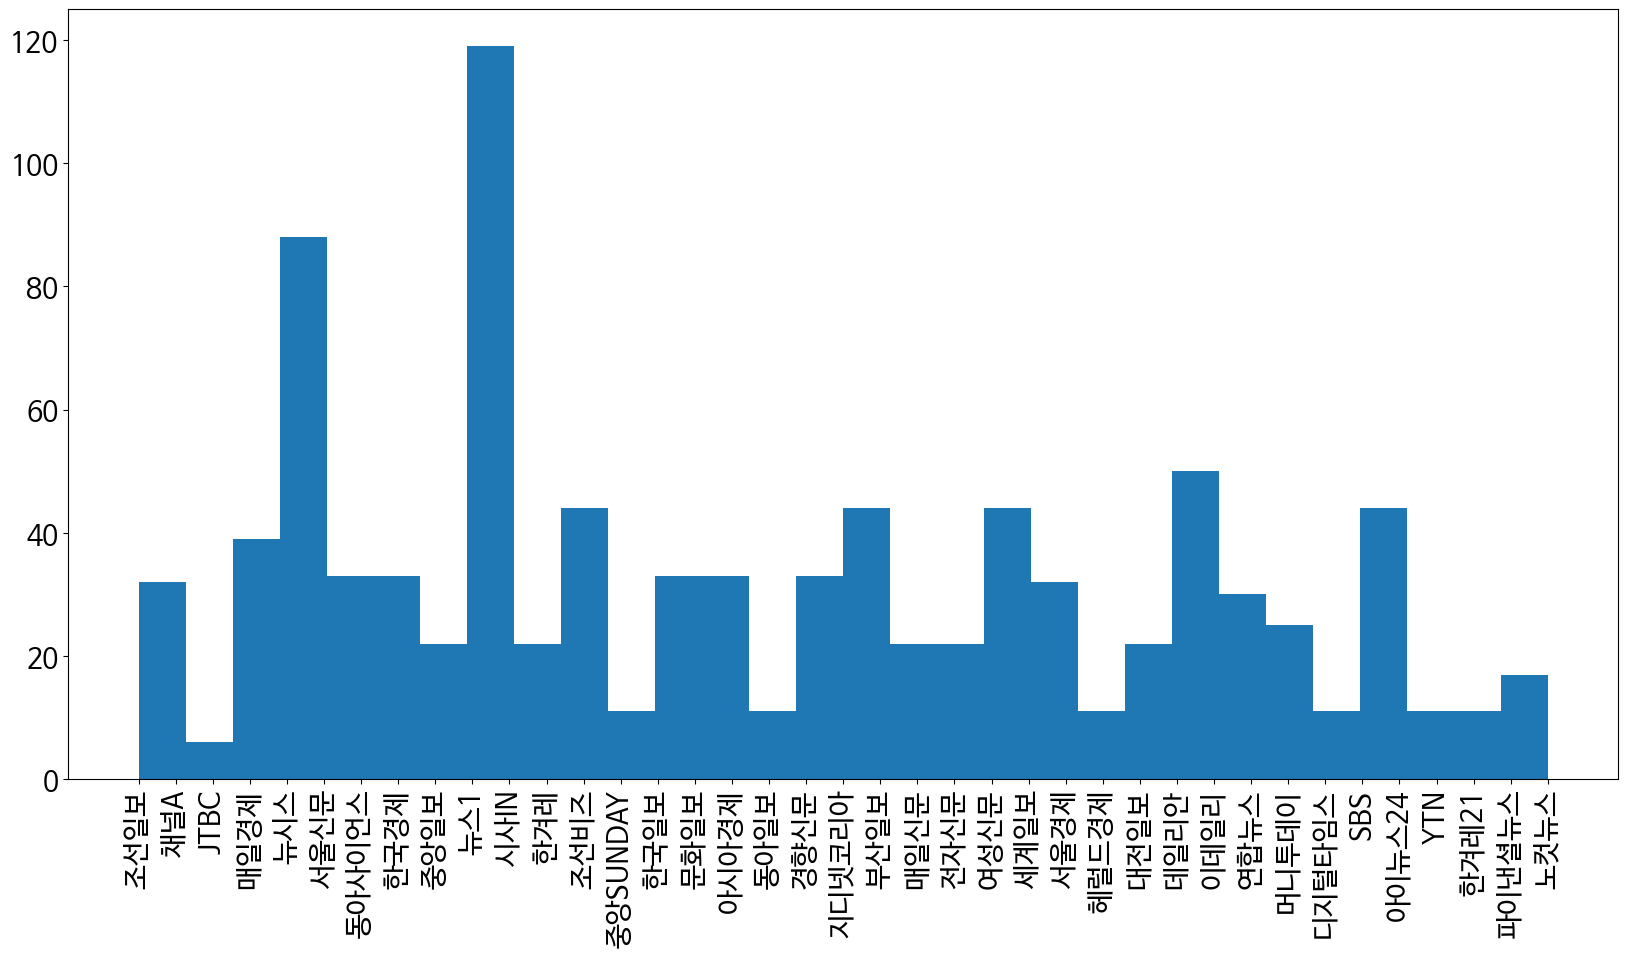

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.hist(df['publisher'],bins=30)
ax.tick_params('x',labelsize=20,rotation = 90)
ax.tick_params('y',labelsize=20)

# Week 2

## Regular Expression

In [ ]:
import re

In [ ]:
string = '안녕하세요?\t ㅎㅎ abCccde\n 1248ccccc'

In [ ]:
print(string)

안녕하세요?	 ㅎㅎ abCccde
 1248ccccc


In [ ]:
pattern = re.compile('안녕하세요')
pattern.match(string)

<re.Match object; span=(0, 5), match='안녕하세요'>

In [ ]:
# [abc]: Matches any one character out of a, b, or c.
re.findall('[안a]',string)

['안', 'a']

In [ ]:
# [^abc]: Matches any one character that is not a, b, or c.
re.findall('[^abc]',string)

['안',
 '녕',
 '하',
 '세',
 '요',
 '?',
 '\t',
 ' ',
 'ㅎ',
 'ㅎ',
 ' ',
 'C',
 'd',
 'e',
 '\n',
 ' ',
 '1',
 '2',
 '4',
 '8']

In [ ]:
# [a-z]: Matches any one character from lowercase a to z.
re.findall('[a-z]',string)

['a', 'b', 'c', 'c', 'd', 'e', 'c', 'c', 'c', 'c', 'c']

In [ ]:
string

'안녕하세요?\t ㅎㅎ abCccde\n 1248ccccc'

In [ ]:
# [A-Z]: Matches any one character from uppercase A to Z.
re.findall('A-Z',string)

[]

In [ ]:
# [0-9]: Matches any digit from 0 to 9.
re.findall('[0-9]',string)

['1', '2', '4', '8']

In [ ]:
re.findall('[^가-힣a-zA-Z0-9]',string)

['?', '\t', ' ', 'ㅎ', 'ㅎ', ' ', '\n', ' ']

In [ ]:
re.findall('[가-힣a-zA-Z0-9]',string)

['안',
 '녕',
 '하',
 '세',
 '요',
 'a',
 'b',
 'C',
 'c',
 'c',
 'd',
 'e',
 '1',
 '2',
 '4',
 '8',
 'c',
 'c',
 'c',
 'c',
 'c']

In [ ]:
re.findall('[\s]',string)

['\t', ' ', ' ', '\n', ' ']

In [ ]:
re.findall('[^\s]',string)

['안',
 '녕',
 '하',
 '세',
 '요',
 '?',
 'ㅎ',
 'ㅎ',
 'a',
 'b',
 'C',
 'c',
 'c',
 'd',
 'e',
 '1',
 '2',
 '4',
 '8',
 'c',
 'c',
 'c',
 'c',
 'c']

In [ ]:
re.findall('[\S]',string)

['안',
 '녕',
 '하',
 '세',
 '요',
 '?',
 'ㅎ',
 'ㅎ',
 'a',
 'b',
 'C',
 'c',
 'c',
 'd',
 'e',
 '1',
 '2',
 '4',
 '8',
 'c',
 'c',
 'c',
 'c',
 'c']

In [ ]:
re.findall('[^\s]',string)

['안',
 '녕',
 '하',
 '세',
 '요',
 '?',
 'ㅎ',
 'ㅎ',
 'a',
 'b',
 'C',
 'c',
 'c',
 'd',
 'e',
 '1',
 '2',
 '4',
 '8',
 'c',
 'c',
 'c',
 'c',
 'c']

In [ ]:
string = '안녕하세요?\t ㅎㅎ abCccde\n 1248.ccccc'

In [ ]:
re.findall('\.',string)

['.']

In [ ]:
re.findall('.',string)

['안',
 '녕',
 '하',
 '세',
 '요',
 '?',
 '\t',
 ' ',
 'ㅎ',
 'ㅎ',
 ' ',
 'a',
 'b',
 'C',
 'c',
 'c',
 'd',
 'e',
 ' ',
 '1',
 '2',
 '4',
 '8',
 '.',
 'c',
 'c',
 'c',
 'c',
 'c']

In [ ]:
re.findall('\d',string)

['1', '2', '4', '8']

In [ ]:
string

'안녕하세요?\t ㅎㅎ abCccde\n 1248.ccccc'

In [ ]:
re.findall('cc*',string)

['cc', 'ccccc']

In [ ]:
string

'안녕하세요?\t ㅎㅎ abCccde\n 1248.ccccc'

In [ ]:
re.findall('c{4}',string)

['cccc']

In [ ]:
re.findall('c{2,}',string)

['cc', 'ccccc']

In [ ]:
re.findall('c{2,4}',string)

['cc', 'cccc']

In [ ]:
string = '안녕하세요 저는 Dawoon Jeong입니다! 전화번호는 999-1234-5678이며,\n e-mail 주소는 jdwoon0523@gmail.com입니다.'

In [ ]:
re.search('Dawoon',string)

<re.Match object; span=(9, 15), match='Dawoon'>

In [ ]:
re.match('Dawoon',string)

In [ ]:
re.match('안녕하세요',string)

<re.Match object; span=(0, 5), match='안녕하세요'>

In [ ]:
re.fullmatch(string,string)

<re.Match object; span=(0, 85), match='안녕하세요 저는 Dawoon Jeong입니다! 전화번호는 999-1234-5678이며,\>

In [ ]:
string = '안녕하세요 저는 Dawoon Jeong입니다! 전화번호는 999-1234-5678이며,\n e-mail 주소는 jdwoon0523@gmail.com입니다.'

In [ ]:
re.findall('는',string)

['는', '는', '는']

In [ ]:
re.findall('[가-힣a-zA-Z0-9]+는',string)

['저는', '전화번호는', '주소는']

In [ ]:
re.findall('Dawoon',string)

['Dawoon']

In [ ]:
re.findall('[Dawoon]',string)

['D', 'a', 'w', 'o', 'o', 'n', 'o', 'n', 'a', 'w', 'o', 'o', 'n', 'a', 'o']

In [ ]:
string

'안녕하세요 저는 Dawoon Jeong입니다! 전화번호는 999-1234-5678이며,\n e-mail 주소는 jdwoon0523@gmail.com입니다.'

In [ ]:
print(re.sub('Dawoon','다운',string))

안녕하세요 저는 다운 Jeong입니다! 전화번호는 999-1234-5678이며,
 e-mail 주소는 jdwoon0523@gmail.com입니다.


In [ ]:
re.sub('[Dawoon]','다운',string)

'안녕하세요 저는 다운다운다운다운다운다운 Je다운다운g입니다! 전화번호는 999-1234-5678이며,\n e-m다운il 주소는 jd다운다운다운다운0523@gm다운il.c다운m입니다.'

In [ ]:
string

'안녕하세요 저는 Dawoon Jeong입니다! 전화번호는 999-1234-5678이며,\n e-mail 주소는 jdwoon0523@gmail.com입니다.'

In [ ]:
re.split('전화번호는',string)

['안녕하세요 저는 Dawoon Jeong입니다! ',
 ' 999-1234-5678이며,\n e-mail 주소는 jdwoon0523@gmail.com입니다.']

In [ ]:
re.split(' ',string)

['안녕하세요',
 '저는',
 'Dawoon',
 'Jeong입니다!',
 '전화번호는',
 '999-1234-5678이며,\n',
 'e-mail',
 '주소는',
 'jdwoon0523@gmail.com입니다.']

In [ ]:
re.findall('.',string)

In [ ]:
# email pattern

def validate_email(email):
    pattern = r"^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$"
    if re.match(pattern, email):
        return True
    else:
        return False

# 예제 이메일 검증
emails = ["example@domain.com", "bademail@domain", "Another@good-email.com"]
for email in emails:
    print(f"{email}: {validate_email(email)}")

example@domain.com: True
bademail@domain: False
Another@good-email.com: True


In [ ]:
re.findall('[-.]?\d{4}',string)

['-1234', '-5678', '0523']

In [ ]:
# phone number
def extract_phone_numbers(text):
    pattern = r"\d{3}[-.]?\d{3}[-.]?\d{4}"
    #3자리 숫자 -.(0번 혹은 1번) 3자리 숫자 ([-.] 0번 혹은 1번) 4자리 숫자

    return re.findall(pattern, text)

text = "Contact us at 123-456-7890 or 987.654.3210 today."
print("Found phone numbers:", extract_phone_numbers(text))

Found phone numbers: ['123-456-7890', '987.654.3210']


In [ ]:
# Data pattern
def find_dates(text):
    pattern = r"\d{1,2}/\d{1,2}/\d{4}"
    # 0-9숫자가 1~2, / 0_9숫자가 1~2자리 / 0-9숫자가 4자리
    return re.findall(pattern, text)

text = "Important dates are 01/02/2023, 12/15/2023, and 07/04/2024."
print("Dates in the text:", find_dates(text))

Dates in the text: ['01/02/2023', '12/15/2023', '07/04/2024']


In [ ]:
# html pattern
def remove_html_tags(html):
    # < tag > item  </tag>

    pattern = r"<[^>]+>"
    return re.sub(pattern, "", html)

# tag
# HTML 문자열에서 태그 제거
html_content = "<p>This is a <a href='#'>link</a> inside a paragraph.</p>"
print("Text without HTML tags:", remove_html_tags(html_content))

Text without HTML tags: This is a link inside a paragraph.


In [ ]:
soup = BeautifulSoup(html_content, 'html.parser')
soup.text

'This is a link inside a paragraph.'

## Tokenization

In [ ]:
html = """
<!doctype html>
<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36">
	<head>
		<meta charset="utf-8">
		<meta http-equiv="X-UA-Compatible" content="IE=edge">
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />
		<meta property="og:title" content="별들은 왜 그렇게 서로 멀리 떨어져 있을까? [이광식의 천문학+]">
		<meta property="og:type" content="article">
		<meta property="og:url" content="https://n.news.naver.com/article/081/0003446496">
		<meta property="og:image" content="https://imgnews.pstatic.net/image/081/2024/04/24/0003446496_001_20240424150501168.jpg?type&#x3D;w800">
		<meta property="og:description" content="우리은하에는 별(항성)이 몇 개나 있을까? 예전에는 얼추 1000억 개쯤 있으리라 생각했지만, 최근에는 대략 4000억 개의 별들이 있는 것으로 보는 것이 대세다. 지금 지구상에 바글바글 사는 인류가 모두 약 80억">
		<meta property="og:article:author" content="서울신문 | 네이버">
		<meta name="twitter:card" content="summary_large_image">
		<meta name="twitter:title" content="별들은 왜 그렇게 서로 멀리 떨어져 있을까? [이광식의 천문학+]">
		<meta name="twitter:site" content="네이버 뉴스">
		<meta name="twitter:creator" content="서울신문">
		<meta name="twitter:image" content="https://imgnews.pstatic.net/image/081/2024/04/24/0003446496_001_20240424150501168.jpg?type&#x3D;w800">
		<meta name="twitter:description" content="우리은하에는 별(항성)이 몇 개나 있을까? 예전에는 얼추 1000억 개쯤 있으리라 생각했지만, 최근에는 대략 4000억 개의 별들이 있는 것으로 보는 것이 대세다. 지금 지구상에 바글바글 사는 인류가 모두 약 80억">
		<meta name="napp-site-analysis" content="gdid=880000D1_000000000000000003446496,service=news,collection=news,section=105">
		<title>별들은 왜 그렇게 서로 멀리 떨어져 있을까? [이광식의 천문학+]</title>
			<link rel="stylesheet" href="https://static-nnews.pstatic.net/css/min/20240418/news.css">
			<link rel="shortcut icon" type="image/x-icon" href="https://ssl.pstatic.net/static.news/image/news/m/2023/08/21/favicon.ico" />
			<link rel="apple-touch-icon-precomposed" href="https://ssl.pstatic.net/static.news/image/news/m/2018/favicon/06/android_legacy_xxxhpdi_192x192.png" />
			<link rel="apple-touch-icon-precomposed" size="72x72" href="https://ssl.pstatic.net/static.news/image/news/m/2018/favicon/06/android_legacy_hdpi_72X72.png" />
			<link rel="apple-touch-icon-precomposed" size="96x96" href="https://ssl.pstatic.net/static.news/image/news/m/2018/favicon/06/android_legacy_xhdpi_96x96.png" />
			<link rel="apple-touch-icon-precomposed" size="144x144" href="https://ssl.pstatic.net/static.news/image/news/m/2018/favicon/06/android_legacy_xxhpdi_144x144.png" />
			<link rel="apple-touch-icon-precomposed" size="192x192" href="https://ssl.pstatic.net/static.news/image/news/m/2018/favicon/06/android_legacy_xxxhpdi_192x192.png" />
					<script async src="https://ssl.pstatic.net/tveta/libs/glad/prod/gfp-core.js"></script>
		<script>
			var g_ssc = nsc = "Mnews.v2";
			var g_default_area = "art";

			var svr = "one-service-r-20240418-240418-172047-6c9957ccf-5b54r";
			var nelo = {
				name : "one-front",
				url : "https://kr-col-ext.nelo.navercorp.com/_store",
				sampleNumber : 100,
				maxCount : 100,
				maxSendMessage : "로그 전송 최대치 도달"
			};
			var isGreendot = document.cookie.indexOf("MM_NEW=1") > -1;
			var isNewGreendot = document.cookie.indexOf("MM_NEW=2") > -1;
			var domain = "https://n.news.naver.com";
			var ajaxDomain = "";
			var newsDomain = "https://news.naver.com";
			var layoutName = "article";
			var layoutType = "article";
			var isAvailableDarkMode = false;

			var article = {
				isSubscribe: false,
				officeId: "081",
				articleId: "0003446496",
				sectionId : "105",
				gdid: "880000D1_000000000000000003446496",
				type: "1",
				sectionInfo: {
					firstSection: "105",
					secondSection: "228",
					thirdSection: "000"
				},
				title: document.title
			};



			var office = {
				isChannel: true,
				isPressHome: true,
				name : "서울신문",
				category : "종합지"
			};

			var searchQuery = (function() {
				var referrerLink = document.createElement("a");
				var emptySearch = "";

				referrerLink.href = document.referrer || "";

				if (referrerLink.host.indexOf("search.naver.com") === -1) {
					return emptySearch;
				}

				return decodeURIComponent(
					(
						referrerLink.search.match(/(?:\?|&)query\=([^&]+)/) || [ null, emptySearch ]
					)[1].replace(/\+/g, " ")
				);
			})();

			var divIds = [];
			var syncDivIds = [];
			var syncDivIdsForNonArticle = [];

			var unitIds = [];
			var syncUnitIds = [];
			var syncUnitIdsForNonArticle = [];

			window.gladsdk = window.gladsdk || { cmd: [] };
			gladsdk.cmd.push(function() {
				gladsdk.setAdDeduplication("article_body_dedup");
				gladsdk.setGlobalConfig({ enablePersistAd: true });

				var adInfoList = [];

				adInfoList.push({
					seq: 1,
					unitId: "p_news_newsend",
					sync: false,
					mobileOnly: false,
					article: false,
					directSalesPct: "0",
					calp: false,
					hasSid1: false
				});
				adInfoList.push({
					seq: 2,
					unitId: "p_news_sidebox",
					sync: false,
					mobileOnly: false,
					article: false,
					directSalesPct: "0",
					calp: false,
					hasSid1: false
				});

				var userAgent = navigator.userAgent.toLowerCase();

				for (var i = 0; i < adInfoList.length; i++) {
					var adInfo = adInfoList[i];

					var divId = "nmap_c_" + article.officeId + "_" + article.articleId + "_" + article.sectionId + "_" + adInfo.seq;

					var unitId = adInfo.unitId;
					var mobileOnly = adInfo.mobileOnly;
					var sync = adInfo.sync;
					var isArticle = adInfo.article;
					var directSalesPct = adInfo.directSalesPct;
					var calp = adInfo.calp;
					var hasSid1 = adInfo.hasSid1;

					if (mobileOnly == true) {
						if (/iphone|android|ipod/.test(userAgent) == false) {
							continue;
						}
					}

					var customParam = {
						sid1: article.sectionId,
						oid: article.officeId,
						gdid: article.gdid,
						pk: searchQuery,
						directSalesPct: directSalesPct
					};

					if (calp == true) {
						customParam.calp = "";
					}
					if (hasSid1 == true) {
						customParam.sid1 = "105";
					}

					var adUnit = {
						adUnitId: unitId,
						adSlotElementId: divId,
						customParam: customParam
					};

					if (sync == true) {
						syncUnitIds.push(unitId);
						syncDivIds.push(divId);

						if (isArticle == false) {
							syncUnitIdsForNonArticle.push(unitId);
							syncDivIdsForNonArticle.push(divId);
						}
					} else {
						unitIds.push(unitId);
						divIds.push(divId);
					}

					gladsdk.defineAdSlot(adUnit);
				}

			});
			window.__htExternalUrl = window.__htExternalUrl || {};
		</script>
		<script src="https://static-nnews.pstatic.net/js/min/20240418/common.min.js"></script>
	</head>
	<body class="n_news fs2 as_mp_layout">
		<div class="end_container">
		<div class="u_skip"><a href="#ct">본문 바로가기</a></div>
			<header role="banner" class="as_gnb as_type_a">
		<div class="header_inner" style="color: #3c539d;">
		<div class="Ngnb IS_FIXED">
			<div id="_OFFICE_HEADER" class="office_header _OFFICE_HEADER">
				<div class="ofhd_float" style="background-color: #3c539d;">
					<div class="ofhd_float_inner">
						<a href="#" class="ofhd_float_back _BACK">이전 페이지</a>
						<div class="ofhd_float_head">
							<div class="ofhd_float_head_left">
								<a href="https://www.naver.com" class="ofhd_n_link" data-clk="gnb.naver"></a>
								<a href="https://news.naver.com" class="ofhd_news_link" data-clk="gnb.news"></a>
							</div>
							<h1 class="ofhd_float_title">
								<a href="https://media.naver.com/press/081" class="ofhd_float_title_text">서울신문</a>
							</h1>
						</div>
						<div class="ofhd_float_subscribe _CHANNEL_BUTTON_WRAP" style="display:none;">
							<button type="button" class="_channel_add ofhd_float_subscribe_btn _CHANNEL_BUTTON _CHANNEL_ADD" data-clk-add="chmain081" data-clk-remove="chdelete081" data-text="구독" data-delay="1000" data-notification="true" data-notification-clk="notru">구독</button>
							<p id="_CHANNEL_MAIN_PROMOTION" class="ofhd_float_subscribe_tooltip" style="display:none;">
								<span class="ofhd_float_subscribe_tooltip_text"><strong>언론사를 구독하면 메인</strong>에서 바로 볼 수 있어요!</span>
							</p>
							<a id="_CHANNEL_LAYER_081_0003446496" href="#" class="ofhd_float_subscribe_layer _add _LINK" data-url-type="NAVERAPP_NEWS_CHANNEL" style="display: none;">
								<span class="ofhd_float_subscribe_layer_text">메인 뉴스판에서 서울신문 주요뉴스를 <br> 볼 수 있습니다.</span>
								<span class="ofhd_float_subscribe_layer_link">보러가기</span>
							</a>
							<p id="_CHANNEL_REMOVE_LAYER_081_0003446496" class="ofhd_float_subscribe_layer _remove" style="display: none;">
								<span class="ofhd_float_subscribe_layer_text"><strong>서울신문</strong> 언론사 구독 해지되었습니다.</span>
							</p>
						</div>
					</div>
				</div>
			</div>
		</div>
		<div id="_LNB_PARENT_WRAP" class="Nlnb is_fixed" style="z-index:3000; color: #3c539d;">
		<div id="_LNB_WRAP" class="Nlnb_menu Ntype_scroll " style="position: relative;">
			<div id="_LNB" class="Nlnb_menu_inner">
				<ul class="Nlnb_menu_list" role="tablist">
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.mm"><span class="Nitem_link_menu">주요뉴스</span></a></li>
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081?sid&#x3D;165#lnb" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.section"><span class="Nitem_link_menu">총선</span></a></li>
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081?sid&#x3D;100#lnb" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.section"><span class="Nitem_link_menu">정치</span></a></li>
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081?sid&#x3D;102#lnb" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.section"><span class="Nitem_link_menu">사회</span></a></li>
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081?sid&#x3D;104#lnb" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.section"><span class="Nitem_link_menu">세계</span></a></li>
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081?sid&#x3D;101#lnb" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.section"><span class="Nitem_link_menu">경제</span></a></li>
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081?sid&#x3D;103#lnb" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.section"><span class="Nitem_link_menu">생활</span></a></li>
					<li class="Nlist_item _LNB_ITEM is_active" role="presentation"><a href="https://media.naver.com/press/081?sid&#x3D;105#lnb" class="Nitem_link" role="tab" aria-selected="true" data-clk="prs_hom.section"><span class="Nitem_link_menu">IT</span></a></li>
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081/shortform" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.section"><span class="Nitem_link_menu">숏폼</span></a></li>
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081/newspaper" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.section"><span class="Nitem_link_menu">신문보기</span></a></li>
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081?sid&#x3D;110#lnb" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.section"><span class="Nitem_link_menu">사설/칼럼</span></a></li>
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081/live" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.live"><span class="Nitem_link_menu">생중계</span></a></li>
					<li class="Nlist_item _LNB_ITEM" role="presentation"><a href="https://media.naver.com/press/081/ranking" class="Nitem_link" role="tab" aria-selected="false" data-clk="prs_hom.section"><span class="Nitem_link_menu">랭킹</span></a></li>
				</ul>
			</div>
		</div>
		</div>
		</div>
	</header>
<hr>
<script>
	var svt = "20240425000933.708";
	var timestamp = svt.substr(0, 8);
	var isLogin = false;
	var uhv = "lgxXlmV9ccjn5RnbTOBQnQ==";

	var service = {
		news: true,
		entertain: false,
		sports: false,
		mnews: false,
		newsType: true
	};
	var serviceName = "news";

	var envPhase = "production";
	var isProduction = true;

</script>
<div id="ct_wrap" class="ct_wrap">
	<div class="ct_scroll_wrapper">
		<div id="newsct" class="newsct_wrapper _GRID_TEMPLATE_COLUMN _STICKY_CONTENT" role="main"><div id="ct" class="newsct">
<div class="media_end_head go_trans">
	<div class="media_end_head_top _LAZY_LOADING_WRAP">
		<a href="https://www.seoul.co.kr" class="media_end_head_top_logo _LAZY_LOADING_ERROR_HIDE">
			<img data-src="https://mimgnews.pstatic.net/image/upload/office_logo/081/2022/01/07/logo_081_6_20220107180811.png" width="" height="32" alt="서울신문" title="서울신문" class="media_end_head_top_logo_img light_type _LAZY_LOADING _LAZY_LOADING_INIT_HIDE" style="display:none;">
			<img data-src="https://mimgnews.pstatic.net/image/upload/office_logo/081/2020/09/15/dark_logo_081_6_20200915183034.png" width="" height="32" alt="서울신문" title="서울신문" class="media_end_head_top_logo_img dark_type _LAZY_LOADING _LAZY_LOADING_INIT_HIDE" style="display:none;">
		</a>
	</div>
	<div class="media_end_head_title">
		<h2 id="title_area" class="media_end_head_headline"><span>별들은 왜 그렇게 서로 멀리 떨어져 있을까? [이광식의 천문학+]</span></h2>
	</div>
	<div class="media_end_head_info nv_notrans ">
		<div class="media_end_head_info_datestamp">
			<div class="media_end_head_info_datestamp_bunch">
				<em class="media_end_head_info_datestamp_term">입력</em><span class="media_end_head_info_datestamp_time _ARTICLE_DATE_TIME" data-date-time="2024-04-24 15:05:01" data-date-time-age-in-minutes="544">2024.04.24. 오후 3:05</span>
			</div>
			<a href="https://nownews.seoul.co.kr/news/newsView.php?id&#x3D;20240424601009&amp;wlog_tag3&#x3D;naver" target="_blank" class="media_end_head_origin_link" data-clk="are.ori" data-gdid="081" data-extra="{&quot;lk&quot;:{&quot;oid&quot;:&quot;081&quot;,&quot;aid&quot;:&quot;6361dd247083fb9c&quot;}}">기사원문</a>
		</div>		<div class="media_end_head_info_variety">
			<div class="media_end_head_info_variety_left" id="commentFontGroup">
				<div class="media_end_head_info_variety_likeit _LIKE_HIDE as_likeit_improve">
					<!-- 좋아요 -->
					<div class="_reactionModule u_likeit nv_notrans" data-sid="NEWS" data-cid="ne_081_0003446496">
						<a class="u_likeit_button _face _LIKE_BUTTON" data-label="recommend" aria-haspopup="true" aria-pressed="false" data-clk="RTL.face">
							<span class="u_likeit_icons _icons">
								<span class="u_likeit_icon __reaction__zeroface"></span>
							</span>
							<span class="u_likeit_text _count">추천</span>
						</a>
						<ul class="u_likeit_layer _faceLayer" role="menu">
							<li class="u_likeit_list useful" role="menuitem">
								<a class="u_likeit_list_button _button off" data-type="useful" data-log="RTL.useful|RTL.unuseful" href="#" role="button" aria-selected="false" aria-pressed="false">
									<span class="u_likeit_list_name _label">쏠쏠정보</span>
									<span class="u_likeit_list_count _count">0</span>
								</a>
							</li>
							<li class="u_likeit_list wow" role="menuitem">
								<a class="u_likeit_list_button _button off" data-type="wow" data-log="RTL.wow|RTL.unwow" href="#" role="button" aria-selected="false" aria-pressed="false">
									<span class="u_likeit_list_name _label">흥미진진</span>
									<span class="u_likeit_list_count _count">0</span>
								</a>
							</li>
							<li class="u_likeit_list touched" role="menuitem">
								<a class="u_likeit_list_button _button off" data-type="touched" data-log="RTL.touched|RTL.untouched" href="#" role="button" aria-selected="false" aria-pressed="false">
									<span class="u_likeit_list_name _label">공감백배</span>
									<span class="u_likeit_list_count _count">0</span>
								</a>
							</li>
							<li class="u_likeit_list analytical" role="menuitem">
								<a class="u_likeit_list_button _button off" data-type="analytical" data-log="RTL.analytical|RTL.unanalytical" href="#" role="button" aria-selected="false" aria-pressed="false">
									<span class="u_likeit_list_name _label">분석탁월</span>
									<span class="u_likeit_list_count _count">0</span>
								</a>
							</li>
							<li class="u_likeit_list recommend" role="menuitem">
								<a class="u_likeit_list_button _button off" data-type="recommend" data-log="RTL.recommend|RTL.unrecommend" href="#" role="button" aria-selected="false" aria-pressed="false">
									<span class="u_likeit_list_name _label">후속강추</span>
									<span class="u_likeit_list_count _count">0</span>
								</a>
							</li>
						</ul>			</div>
					<!-- 좋아요 -->
				</div>
				<div class="media_end_head_info_variety_cmtcount _COMMENT_HIDE">
					<a href="/article/comment/081/0003446496" class="media_end_head_cmtcount_button _COMMENT_COUNT_VIEW" id="comment_count" data-clk="rplt" data-zero-allow="false" data-max-limit="true">댓글</a>
				</div>
			</div>
			<div class="media_end_head_info_variety_right">
				<!-- 요약봇 -->
				<div id="_SUMMARY_BUTTON" class="media_end_head_autosummary _auto_summary_wrapper _SUMMARY _LIKE_HIDE" data-officeId="081" data-articleId="0003446496">
					<a href="javascript:;" class="media_end_head_autosummary_button _toggle_btn _SUMMARY_BTN" data-clk="sum"><span class="blind">본문 요약봇</span></a>
					<div class="media_end_head_autosummary_layer_dimmed _SUMMARY_DIMMED" style="display: none;"></div>
					<div class="media_end_head_autosummary_layer _auto_summary_contents _SUMMARY_LAYER" style="display: none;">
						<div class="media_end_head_autosummary_layer_head">
							<strong class="media_end_head_autosummary_layer_head_tit">본문 요약봇<a href="https://help.naver.com/alias/news/news_022.naver" class="media_end_head_autosummary_help" data-clk="help">도움말</a></strong>
							<span class="media_end_head_autosummary_layer_head_txt">자동 추출 기술로 요약된 내용입니다. 요약 기술의 특성상 본문의 주요 내용이 제외될 수 있어, 전체 맥락을 이해하기 위해서는 기사 본문 전체보기를 권장합니다.</span>
							<a href="javascript:;" class="media_end_head_autosummary_layer_close _close_button _SUMMARY_CLOSE_BTN" data-clk="close"><span class="blind">닫기</span></a>
						</div>
						<div class="media_end_head_autosummary_layer_body">
							<div class="_contents_body _SUMMARY_CONTENT_BODY"></div>
						</div>
					</div>
				</div>
				<!-- TTS -->
					<div id="tts_player_div_wrap" class="media_end_head_tts nv_notrans">
						<button type="button" class="media_end_head_tts_run _TTS_SETTING_BTN" title="텍스트 음성 변환 서비스" data-clk="wtts"><span class="blind">텍스트 음성 변환 서비스 사용하기</span></button>
						<div class="media_end_head_tts_setlayer nv_notrans _TTS_SETTING_LAYER">
							<div class="media_end_head_tts_setlayer_select">
								<div class="media_end_head_tts_setlayer_select_bunch" id="ttsSelectGender">
									<em class="media_end_head_tts_option_tit">성별</em>
									<button type="button" class="media_end_head_tts_option" value="m" data-clk="ttsma">남성</button>
									<button type="button" class="media_end_head_tts_option" value="f" data-clk="ttsfe">여성</button>
								</div>
								<div class="media_end_head_tts_setlayer_select_bunch" id="ttsSelectSpeed">
									<em class="media_end_head_tts_option_tit">말하기 속도</em>
									<button type="button" class="media_end_head_tts_option" value="3" data-clk="ttssp">느림</button>
									<button type="button" class="media_end_head_tts_option" value="2" data-clk="ttssp">보통</button>
									<button type="button" class="media_end_head_tts_option" value="0" data-clk="ttssp">빠름</button>
								</div>
								<p class="media_end_head_tts_desc">이동 통신망을 이용하여 음성을 재생하면 별도의 데이터 통화료가 부과될 수 있습니다.</p>
								<button type="button" class="media_end_head_tts_apply _TTS_LISTEN_BTN" data-clk="ttsstart">본문듣기 시작</button>
							</div>
							<button type="button" class="media_end_head_tts_setlayer_close _TTS_SETTING_LAYER_CLOSE_BTN" data-clk="ttsclose"><span class="blind">닫기</span></button>
						</div>
					</div>
					<div id="tts_player_div"></div>		<!-- 폰트 사이즈 -->
				<div class="media_end_head_fontsize _font_size_config_wrapper _FONT_WRAP">
					<a href="#" class="media_end_head_fontsize_set _font_size_config_toggle_btn _FONT_BUTTON" data-clk="fsz"><span class="blind">글자 크기 변경하기</span></a>
					<div class="media_end_head_fontsize_setlayer _FONT_LAYER">
						<ul class="media_end_head_fontsize_setlayer_select">
							<li class="media_end_head_fontsize_option1 _opt">
								<a href="#" class="media_end_head_fontsize_option_text _FONT_LAYER_BUTTON" data-value="1" data-clk="fsz1">가<em class="blind">1단계</em></a>
								<a href="#" class="media_end_head_fontsize_option_name _FONT_LAYER_BUTTON" data-value="1" data-clk="fsz1">작게</a>
							</li>
							<li class="media_end_head_fontsize_option2 _opt">
								<a href="#" class="media_end_head_fontsize_option_text _FONT_LAYER_BUTTON" data-value="2" data-clk="fsz2">가<em class="blind">2단계</em></a>
								<a href="#" class="media_end_head_fontsize_option_name _FONT_LAYER_BUTTON" data-value="2" data-clk="fsz2">보통</a>
							</li>
							<li class="media_end_head_fontsize_option3 _opt">
								<a href="#" class="media_end_head_fontsize_option_text _FONT_LAYER_BUTTON" data-value="3" data-clk="fsz3">가<em class="blind">3단계</em></a>
								<a href="#" class="media_end_head_fontsize_option_name _FONT_LAYER_BUTTON" data-value="3" data-clk="fsz3">크게</a>
							</li>
							<li class="media_end_head_fontsize_option4 _opt">
								<a href="#" class="media_end_head_fontsize_option_text _FONT_LAYER_BUTTON" data-value="4" data-clk="fsz4">가<em class="blind">4단계</em></a>
								<a href="#" class="media_end_head_fontsize_option_name _FONT_LAYER_BUTTON" data-value="4" data-clk="fsz4">아주크게</a>
							</li>
							<li class="media_end_head_fontsize_option5 _opt">
								<a href="#" class="media_end_head_fontsize_option_text _FONT_LAYER_BUTTON" data-value="5" data-clk="fsz5">가<em class="blind">5단계</em></a>
								<a href="#" class="media_end_head_fontsize_option_name _FONT_LAYER_BUTTON" data-value="5" data-clk="fsz5">최대크게</a>
							</li>
						</ul>
					</div>
				</div>
				<div class="media_end_head_share nv_notrans">
					<a href="#" id="spiButton" class="u_btn_sns_share naver-splugin spi_sns_share nv_notrans _SHARE_BUTTON" onclick="return false" data-clk="ushr"
					   data-style="type_a"
					   data-url="https://n.news.naver.com/article/081/0003446496" data-canonical-url="https://news.naver.com/main/read.naver?mode=LSD&mid=sec&oid=081&aid=0003446496&sid1=001"
					   data-title="별들은 왜 그렇게 서로 멀리 떨어져 있을까? [이광식의 천문학+]"
					   data-likeServiceId="NEWS"
					   data-likeContentsId="ne_081_0003446496"
					   data-mail-url="https://n.news.naver.com/article/081/0003446496?lfrom=mail"
					   data-blog-url="https://n.news.naver.com/article/081/0003446496?lfrom=blog"
					   data-blog-source-type="3"
					   data-blog-blog-id="naver"
					   data-cafe-url="https://n.news.naver.com/article/081/0003446496?lfrom=cafe"
					   data-cafe-source-type="3"
					   data-memo-url="https://n.news.naver.com/article/081/0003446496?lfrom=memo"
					   data-calendar-url="https://n.news.naver.com/article/081/0003446496?lfrom=calendar"
					   data-band-url="https://n.news.naver.com/article/081/0003446496?lfrom=band"
					   data-line-url="https://n.news.naver.com/article/081/0003446496?lfrom=line"
					   data-kakaotalk-url="https://n.news.naver.com/article/081/0003446496?lfrom=kakao"
					   data-kakaostory-display="off"
					   data-kakaotalk-image-url="https://imgnews.pstatic.net/image/081/2024/04/24/0003446496_001_20240424150501168.jpg?type=nf300_200"
					   data-facebook-url="https://n.news.naver.com/article/081/0003446496?lfrom=facebook"
					   data-twitter-url="https://n.news.naver.com/article/081/0003446496?lfrom=twitter"
					   data-mypeople-url="https://n.news.naver.com/article/081/0003446496?lfrom=mypeople"
					   data-friend-display="on"
					   data-friend-url="https://n.news.naver.com/article/081/0003446496?lfrom=friend">
						<span class="naver-splugin-c send_caption"><span class="u_hc">SNS 보내기</span></span>
					</a>
				</div>
				<div class="media_end_head_print">
					<a href="#" class="media_end_print_link _PRINT_BUTTON" data-print-url="/article/print/081/0003446496" data-clk="print"><span class="blind">인쇄하기</span></a>
				</div>
			</div>
		</div>
	</div>
</div>
<div id="contents" class="newsct_body">
	<div id="newsct_article" class="newsct_article _article_body">
		<article id="dic_area" class="go_trans _article_content">
			[서울신문 나우뉴스]<br><span class="end_photo_org"><div class="nbd_im_w _LAZY_LOADING_WRAP ">
	<div class="nbd_a _LAZY_LOADING_ERROR_HIDE" id="img_a1">
		<img id="img1" data-src="https://imgnews.pstatic.net/image/081/2024/04/24/0003446496_001_20240424150501168.jpg?type&#x3D;w647" class="_LAZY_LOADING _LAZY_LOADING_INIT_HIDE" alt="위에서 본 우리은하의 모습 상상도." style="display: none;" />
	</div>
</div><em class="img_desc">위에서 본 우리은하의 모습 상상도.</em></span>우리은하에는 별(항성)이 몇 개나 있을까? 예전에는 얼추 1000억 개쯤 있으리라 생각했지만, 최근에는 대략 4000억 개의 별들이 있는 것으로 보는 것이 대세다. 지금 지구상에 바글바글 사는 인류가 모두 약 80억이라는데, 우리은하에 저 태양 같은 별이 4000억 개나 있다니, 참으로 놀라운 일이고 어마어마한 숫자다.<br><br>나선은하인 우리은하는 지름 10만 광년, 두께는 약 1000광년의 둥근 디스크 형태를 하고 있다. 이 부피 안에 4000억 개의 별들이 퍼져 있는 셈인데, 천문학자들은 우리은하의 빈 공간을 감안해서 별 사이의 평균 거리를 약 3~4광년 정도로 보고 있다. 지구에서 가장 가까운 별은 물론 태양이다. 하지만 우리에게는 태양이 별이란 느낌이 별로 없다. 우리 삶에 너무나 직접적인 영향을 미치는 특별한 천체이다 보니 그런 모양이다. 우리는 보통 태양이 지고 캄캄해진 밤하늘에 반짝이는 빛점들을 별이라고 생각한다. 하지만 태양은 엄연히 별이다. 그래서 미국의 시인 데이비드 소로는 “태양은 아침에 뜨는 별이다”고 표현했다.<br><br>우리 별 태양은 지름이 지구의 109배, 질량이 33만 배나 된다. 그래도 태양이 별 중에서도 대략 크기가 중간치에 속한다니, 별이란 존재는 이처럼 지구와는 비교가 되지 않을 정도로 큰 천체다. 이처럼 별 자체는 지구에 비하면 압도적으로 크고 무겁고 밝은 존재이지만, 별과 별 사이는 빛으로도 3~4년이 걸릴 만큼 엄청나게 멀리 떨어져 있는 것이다.<span class="end_photo_org"><div class="nbd_im_w _LAZY_LOADING_WRAP ">
	<div class="nbd_a _LAZY_LOADING_ERROR_HIDE" id="img_a2">
		<img id="img2" data-src="https://imgnews.pstatic.net/image/081/2024/04/24/0003446496_002_20240424150501212.jpg?type&#x3D;w647" class="_LAZY_LOADING _LAZY_LOADING_INIT_HIDE" alt="센타우루스 자리 알파 B별의 상상도.(그림/ESO)" style="display: none;" />
	</div>
</div><em class="img_desc">센타우루스 자리 알파 B별의 상상도.(그림/ESO)</em></span>그러면 태양을 제외하고 지구에서 가장 가까운 별은 어느 별일까? 남반구 하늘의 센타우루스자리 프록시마란 적색왜성으로서, 프록시마 센타우리라고도 불린다. 프록시마와 함께 3중성계를 이루는 센타우루스자리 알파, 베타별은 태양계에서 가장 가까운 &#8203; 항성계로, 거리는 4.37광년이다. 그중 센타우루스자리 알파별은 천구에서 네번째 밝은 별이지만, 사실은 쌍성계로, 센타우루스자리 알파A, 센타우루스자리 알파B로 이루어져 있다.<br><br>우리가 프록시마가 지구에서 가장 가깝다는 사실을 안 것도 사실 그리 오래 된 일이 아니다. 맨눈으로는 보이지 않을 정도로 어두운 별이기 때문이다. 밤하늘에서 우리가 맨눈으로 볼 수 있는 별 밝기의 하한선은 6등급인데, 프록시마는 그보다 100배나 어두운 11등급의 적색왜성이다. 크기는 우리 태양의 7분의 1밖에 되지 않는다.<br><br>프록시마 센타우리가 발견된 것은 1915년으로, 스코틀랜드 천문학자 로버트 이네스가 망원경으로 발견했다. 이네스는 이 별이 지구에서 가장 가까운 별임을 밝혀내고는 ‘프록시마’(Proxima)라 부르자고 제안했다. 이는 라틴어로 ‘가장 가깝다’는 뜻이다. 사실 프록시마가 원래 알파 센타우리 다중성계에 속한 별인지, 아니면 우연히 지나가다 근처에 있게 된 별인지도 확실히 밝혀지지 않았는데, 2016년에 이르러서야 프록시마가 알파 센타우리로부터 약 12,950AU(약 2조km) 떨어져 있으며 55만 년을 주기로 공전하고 있다는 사실이 밝혀졌다.<br><br>어쨌든 이 프록시마가 태양을 제외하고는 가장 가까운 별인데, 거리는 4.22광년이다. 이 거리는 미터법으로는 약 40조km에 이르며, 태양-지구 간 거리의 약 27만 배, 태양-해왕성 간 거리의 9000배에 이르는 엄청난 간격이다. 자, 그러면 이것이 얼마만큼 먼 거리인지 상상력을 발휘해 체감해보도록 하자.<br><br>먼저 이 거리를 시속 4km 속도로 걸어서 간다면 약 11억 4000만 년이 걸린다. 사람이 100년을 산다고 보면 약 1100만 명이 릴레이로 걸어가야 한다는 뜻이다. 시속 100km의 차로 달린다면 그보다는 좀 빠르게 4550만 년이면 갈 수 있다. 제트기를 타고 날아가면 약 500만 년이 걸리고, 지금도 심우주의 성간공간을  초속 17km로 날고 있는 보이저 1호를 집어타면 7만 년 남짓 걸린다. 왕복이면 14만 년이다. 이것이 인류가 우주의 다른 별로 이주해갈 수 없는 이유이며, 우리가 외계인을 만날 수 없는 이유이다.<br><br>우주에서 가장 빠른 것, 곧 빛을 타고 가면 4년하고도 3개월이 걸리고, 왕복이면 8.5년이 걸린다. 빛이 이웃 별에 마실 갔다오는 데도 이만한 시간이 걸린다니, 빛도 우주의 크기에 비하면 거의 굼뱅이 수준이다. 프록시마와 알파 센타우리 다음으로 가까운 별은 5.96광년의 바너드라는 적색왜성이며, 그 다음은 7.78광년의 볼프 359별로 역시 적색왜성이며 맨눈에는 보이지 않는 어두운 별이다.<span class="end_photo_org"><div class="nbd_im_w _LAZY_LOADING_WRAP ">
	<div class="nbd_a _LAZY_LOADING_ERROR_HIDE" id="img_a3">
		<img id="img3" data-src="https://imgnews.pstatic.net/image/081/2024/04/24/0003446496_003_20240424150501251.jpg?type&#x3D;w647" class="_LAZY_LOADING _LAZY_LOADING_INIT_HIDE" alt="허블 우주망원경이 잡은 시리우스A와 B(왼쪽 아래)." style="display: none;" />
	</div>
</div><em class="img_desc">허블 우주망원경이 잡은 시리우스A와 B(왼쪽 아래).</em></span>태양에서 5번째로 가까운 별은 시리우스로, 8.6광년이다. 또한 이 별은 전천에서 태양 다음으로 가장 밝은 별로 -1.5등성이다. 큰개자리의 알파별인 시리우스는 서양에서는 개별(Dog Star)이라 하고 동양에서는 늑대별(天狼星)이라 불렀다. 늑대 눈처럼 시퍼렇게 보이는 시리우스는 사실 쌍성으로, 그 중 밝은 별은 태양보다 23배 더 밝다.<br><br>그렇다면 별들은 왜 이렇게 서로 멀리 떨어져 있는 걸까? 아직까지 어떤 천문학자도 이에 대해 깊이 연구한 이론을 발표한 적이 없다. 이상하게도 별들 사이의 거리가 과학자들에게 별다른 관심을 불러일으키지 못한 모양이다. 다만, &lt;코스모스&gt;의 저자이자 천문학자인 칼 세이건이 별 사이의 거리에 대해 언급한 말이 있을 뿐이다.<br><br><i>“별들 사이의 아득한 거리에는 신의 배려가 깃들어 있는 듯하다.”</i><br><br>별들 사이의 이 아득한 거리는 결국 우주가 설계한 것이라고 밖에 볼 수 없다. 아마도 별들이 이보다 더 가까이나 또는 멀리 있다면 별들의 충돌이 다반사가 되거나 은하가 흩어져버려 우리 인간이 우주에 나타나지 못했을지도 모른다. 그래서 우주에서 수시로 은하들이 충돌하더라도 별들 사이의 간격이 너무나 넓어 별들은 거의 충돌하는 일 없이 부드럽게 비켜나간다. 우리 태양계 역시 별들 사이의 거리가 어득히 먼 덕분에 존재할 수 있었을 거라고 생각한다. 그러므로 별들이 저렇게 멀리 있다고 불평하지 말자. 우주의 배려에 감사하자.
		</article>
	</div>
	<div class="byline">
		<p class="byline_p">
			<span class="byline_s">이광식 칼럼니스트 joand999@naver.com</span>
		</p>
	</div>
	<div class="copyright">
		<div class="c_inner">
			<p class="c_text">Copyright ⓒ 서울신문. All rights reserved. 무단 전재 및 재배포 금지.</p>
		</div>
	</div>	<div class="media_end_categorize">
		<a href="#" class="media_end_categorize_link _categorize_title _TOGGLE" data-target="_ARTICLE_SECTION_GUIDE_LAYER">이 기사는 언론사에서 <em class="media_end_categorize_item">IT</em> 섹션으로 분류했습니다.</a>
		<div id="_ARTICLE_SECTION_GUIDE_LAYER" class="media_end_categorize_ct">
			<em class="media_end_categorize_ct_title">기사 섹션 분류 안내</em>
			<p class="media_end_categorize_ct_p">기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다. 언론사는 개별 기사를 2개 이상 섹션으로 중복 분류할 수 있습니다.</p>
			<a href="#" class="media_end_categorize_ct_close _CLOSE" data-target="_ARTICLE_SECTION_GUIDE_LAYER">닫기</a>
		</div>
	</div>
	<div id="channelBanner" style="display:none;">
		<div class="media_end_channel_banner _LAZY_LOADING_WRAP">
			<a href="#" class="media_end_channel_banner_link _CHANNEL_BANNER _CHANNEL_ADD" data-clk-add="chbanner081" data-clk-remove="chsee081" data-notification="true" data-notification-clk="notbb">
				<div class="media_end_channel_banner_head _LAZY_LOADING_ERROR_HIDE">
					<div class="media_end_channel_banner_img">
						<img data-src="https://mimgnews.pstatic.net/image/upload/office_logo/081/2018/08/08/logo_081_57_20180808172708.png" class="_LAZY_LOADING _LAZY_LOADING_INIT_HIDE" width="40" height="40" alt="서울신문" style="display:none;">
					</div>
				</div>
				<div class="media_end_channel_banner_body _before _CHANNEL_BANNER_ADD">
					<p class="media_end_channel_banner_add">구독</p>
					<p class="media_end_channel_banner_txt"><span class="media_end_channel_banner_span"><strong>메인에서</strong> 바로 보는 언론사 편집 뉴스 지금 바로 구독해보세요!</span></p>
				</div>
				<div class="media_end_channel_banner_body _after _CHANNEL_BANNER_REMOVE is_hidden">
					<p class="media_end_channel_banner_add is_disabled">구독중</p>
					<p class="media_end_channel_banner_txt"><span class="media_end_channel_banner_span"><strong>메인에서</strong> 바로 보는 언론사 편집 뉴스 지금 바로 확인해보세요!</span></p>
				</div>
			</a>
		</div>
	</div>
	<div id="channelBannerRecommendList"></div>
	<script type="x-tmpl-mustache" class="_CHANNEL_BANNER_RECOMMEND_LIST">
	<div class="office_preference _CHANNEL_BANNER_RECOMMEND_LIST_WRAP">
	<div class="ofpr_recommend">
		<div class="ofpr_recommend_inner">
			<div class="ofpr_more_link">
				<h4 class="ofpr_tit">관심있는 언론사를 추가 구독해 보세요!</h4>
			</div>
			<ul class="ofpr_channel">
				{{#recommendList}}
				<li class="ofpr_item">
					<a href="#" class="ofpr_a _ALL_OFFICES_ITEM" data-officeId="{{officeId}}" data-officename="{{name}}" data-logo="{{logo}}" role="checkbox" aria-checked="false" data-clk-add="chwith" data-clk-remove="chwithno" data-target="_CHANNEL_BANNER_RECOMMEND_LIST_WRAP">
						<div class="ofpr_thumb"><img src="{{logo}}" class="ofpr_m" alt="" onerror="this.outerHTML='<span class=&quot;noimage&quot;></span>'"></div>
						<div class="ofpr_text">{{name}}</div>
						<span class="ofpr_badge">언론사 추가</span>
					</a>
				</li>
				{{/recommendList}}
			</ul>
			<div class="ofpr_btn_wrap">
				<div class="ofpr_btn_inner">
				<button type="button" class="ofpr_btn_more _ALL_OFFICE_LIST" data-clk="chwithall">언론사 전체보기</button>
				<button type="button" class="ofpr_btn_confirm _ALL_OFFICES_COMPLETE disabled" data-clk-disabled="chwithsetall" data-clk-enabled="chwithchoice" data-target="_CHANNEL_BANNER_RECOMMEND_LIST_WRAP">언론사 전체 선택</button>
				</div>
			</div>
			<button type="button" class="ofpr_recommend_close _TOGGLE" data-target="channelBannerRecommendList" data-clk="chclosing">닫기</button>
		</div>
	</div>
	</div>
	</script>
	<div class="promotion">
		<ul class="p_list">
			<li class="p_item _LAZY_LOADING_WRAP">
				<div class="p_text_area">
					<a href="https://nownews.seoul.co.kr/news/newsView.php?id&#x3D;20190220601002" class="p_link" data-clk="promo">나우뉴스에서 세계 통신원과 전문 칼럼리스트를 모집합니다!!</a>
				</div>
			</li>
			<li class="p_item _LAZY_LOADING_WRAP">
				<div class="p_text_area">
					<a href="https://www.youtube.com/channel/UCYPLiC4RE8iDRP7GwKnrLQA" class="p_link" data-clk="promo">나우뉴스 유튜브 [지구인 극장] 오픈</a>
				</div>
			</li>
		</ul>
	</div>
	<div class="media_end_linked">
		<h3 class="media_end_linked_title _LAZY_LOADING_WRAP">
			<a href="https://www.seoul.co.kr" class="media_end_linked_title_inner _LAZY_LOADING_ERROR_HIDE">
				<img data-src="https://mimgnews.pstatic.net/image/upload/office_logo/081/2022/01/07/logo_081_6_20220107180811.png" width="" height="26" alt="서울신문" title="서울신문" class="media_end_linked_title_img light_type _LAZY_LOADING _LAZY_LOADING_INIT_HIDE" style="display:none;">
				<img data-src="https://mimgnews.pstatic.net/image/upload/office_logo/081/2020/09/15/dark_logo_081_6_20200915183034.png" width="" height="26" alt="서울신문" title="서울신문" class="media_end_linked_title_img dark_type _LAZY_LOADING _LAZY_LOADING_INIT_HIDE" style="display:none;">
			</a>
			주요뉴스<span class="media_end_linked_title_desc">해당 언론사에서 선정하며 <em>언론사 페이지(아웃링크)</em>로 이동해 볼 수 있습니다.</span>
		</h3>
		<ul class="media_end_linked_list">
			<li class="media_end_linked_item"><a href="https://nownews.seoul.co.kr/news/newsView.php?id=20240411601002&wlog_tag3=naver_relation" target="_blank" class="media_end_linked_item_inner" data-clk="are.link" data-gdid="081" data-extra="{&quot;lk&quot;:{&quot;oid&quot;:&quot;081&quot;,&quot;aid&quot;:&quot;5bba15404c75d840&quot;}}">딸에게 몹쓸짓으로 임신까지...인면수심 남성들에 징역 20년 [여기는 남미]</a></li>
			<li class="media_end_linked_item"><a href="https://nownews.seoul.co.kr/news/newsView.php?id=20240415601008&wlog_tag3=naver_relation" target="_blank" class="media_end_linked_item_inner" data-clk="are.link" data-gdid="081" data-extra="{&quot;lk&quot;:{&quot;oid&quot;:&quot;081&quot;,&quot;aid&quot;:&quot;87930776480380f6&quot;}}">아내와 24세 스님 신분 양아들의 불륜 현장 촬영한 태국 남편 [여기는 동남아]</a></li>
			<li class="media_end_linked_item"><a href="https://nownews.seoul.co.kr/news/newsView.php?id=20240420601007&wlog_tag3=naver_relation" target="_blank" class="media_end_linked_item_inner" data-clk="are.link" data-gdid="081" data-extra="{&quot;lk&quot;:{&quot;oid&quot;:&quot;081&quot;,&quot;aid&quot;:&quot;5aa030fd80d2f6fd&quot;}}">1살 아기 성폭행한 현직 경찰, '비겁한 변명' 들어보니 [핫이슈]</a></li>
			<li class="media_end_linked_item"><a href="https://nownews.seoul.co.kr/news/newsView.php?id=20240325601010&wlog_tag3=naver_relation" target="_blank" class="media_end_linked_item_inner" data-clk="are.link" data-gdid="081" data-extra="{&quot;lk&quot;:{&quot;oid&quot;:&quot;081&quot;,&quot;aid&quot;:&quot;f2d17721f4c6eee1&quot;}}">"포기란 없다"…비트코인 '7600억원 어치' 실수로 버린 남성 근황[핫이슈]</a></li>
			<li class="media_end_linked_item"><a href="https://nownews.seoul.co.kr/news/newsView.php?id=20240302601004&wlog_tag3=naver_relation" target="_blank" class="media_end_linked_item_inner" data-clk="are.link" data-gdid="081" data-extra="{&quot;lk&quot;:{&quot;oid&quot;:&quot;081&quot;,&quot;aid&quot;:&quot;2ca57b3d5916d4bd&quot;}}">나홀로 사냥…단 2분만에 백상아리 간만 쏙 빼먹는 범고래 [핵잼 사이언스]</a></li>
		</ul>
	</div>
	<div class="r_group_comp ad_box _da_banner is_border_none">
		<div id="nmap_c_081_0003446496_105_1" class="ad_area _AD_WRAP _PERSIST_HEIGHT" data-unitid="p_news_newsend" data-mobileonly="false" data-persist="1_ad" data-sync="false" data-article="false"></div>
	</div>
	<script>
	window.__htExternalUrl = window.__htExternalUrl || {};
	window.__htExternalUrl["like"] = "https://static-like.pstatic.net/js/reaction/dist/reaction.min.js";
	window.__htLikeOption = {
		type: "multi",
		cssId: "news",
		domain: "https://news.like.naver.com",
		staticDomain: "https://static-like.pstatic.net",
		isMobile: true,
		isHiddenLabel: false,
		isHiddenCount: false,
		isHiddenZeroCount: false,
		isUsedLabelAsZeroCount: false,
		isDebugMode: false,
		isDuplication: false,
		isHiddenLayerAfterSelection: true,
		clicklog: function(el, name) {
			nclkWrap.send({
				$this: $(el),
				sArea: name
			});
		}
	};
	window.__htLikeOption["isZeroFace"] = true;
	</script>
	<div class="ends_btn _PERSIST_HEIGHT _LIKE_HIDE as_likeit_improve" data-persist="0_faceLike">
		<div class="ends_btn_head">
			<strong class="ends_head_title">이 기사를 추천합니다</strong>
			<button type="button" class="ends_help_btn _TOGGLE" data-clk="RTC.info" data-target="_LIKE_INFO_LAYER" data-classValue="is_hidden"></button>
			<div id="_LIKE_INFO_LAYER" class="ends_help_layer is_hidden">
				<p class="ends_help_desc">기사 추천은 24시간 내 50회까지 참여할 수 있습니다.</p>
				<button class="ends_help_close _TOGGLE" data-clk="RTC.infoclose" data-target="_LIKE_INFO_LAYER" data-classValue="is_hidden"><span class="blind">닫기</span></button>
			</div>
		</div>
		<div class="_reactionModule u_likeit" data-sid="NEWS" data-cid="ne_081_0003446496" id="likeItCountViewDiv" style="visibility: visible;">
			<ul class="u_likeit_layer _faceLayer" role="menu">
				<li class="u_likeit_list useful" role="menuitem">
					<a class="u_likeit_list_button _button off" data-type="useful" data-log="RTC.useful|RTC.unuseful" href="#" role="button" aria-selected="false" aria-pressed="false">
						<span class="u_likeit_list_name _label">쏠쏠정보</span>
						<span class="u_likeit_list_count _count">0</span>
					</a>
				</li>
				<li class="u_likeit_list wow" role="menuitem">
					<a class="u_likeit_list_button _button off" data-type="wow" data-log="RTC.wow|RTC.unwow" href="#" role="button" aria-selected="false" aria-pressed="false">
						<span class="u_likeit_list_name _label">흥미진진</span>
						<span class="u_likeit_list_count _count">0</span>
					</a>
				</li>
				<li class="u_likeit_list touched" role="menuitem">
					<a class="u_likeit_list_button _button off" data-type="touched" data-log="RTC.touched|RTC.untouched" href="#" role="button" aria-selected="false" aria-pressed="false">
						<span class="u_likeit_list_name _label">공감백배</span>
						<span class="u_likeit_list_count _count">0</span>
					</a>
				</li>
				<li class="u_likeit_list analytical" role="menuitem">
					<a class="u_likeit_list_button _button off" data-type="analytical" data-log="RTC.analytical|RTC.unanalytical" href="#" role="button" aria-selected="false" aria-pressed="false">
						<span class="u_likeit_list_name _label">분석탁월</span>
						<span class="u_likeit_list_count _count">0</span>
					</a>
				</li>
				<li class="u_likeit_list recommend" role="menuitem">
					<a class="u_likeit_list_button _button off" data-type="recommend" data-log="RTC.recommend|RTC.unrecommend" href="#" role="button" aria-selected="false" aria-pressed="false">
						<span class="u_likeit_list_name _label">후속강추</span>
						<span class="u_likeit_list_count _count">0</span>
					</a>
				</li>
			</ul>	</div>
		<div id="likeItSTimeLineShareDiv" style="display:none" class="u_likeit_module u_btn_likeit_on"></div>
		<div id="likeItScrollDiv" style="display:none" class="u_likeit_module">
			<div class="u_likeit_friends" id="likeItFriendListDiv"></div>
		</div>
	</div>
	<div class="ends_addition" id="endAdditionContainer">


		<script>
			window.__htExternalUrl = window.__htExternalUrl || {};
			window.__htExternalUrl["share"] = "https://ssl.pstatic.net/spi/js/release/ko_KR/splugin.js";
			window.__htShareOption = {
				"scriptUrl": window.__htExternalUrl["share"],
				"evKey": "news",
				"dimmed": "fixed",
				"serviceName": "뉴스",
				"sourceName": "서울신문"
			};
			if (isAvailableDarkMode) {
				window.__htShareOption["darkMode"] = true;
			}
		</script>
		<div id="spiLayer" style="display:none;">
			<div class="spi_wrap layer_share_on">
				<div class="spi">
					<div class="spug">
						<a href="#" class="naver-splugin _spi_release spi_ico _btn_postbtn sns_share" data-clk="dshr"
						   data-style="type_a"
						   data-url="https://n.news.naver.com/article/081/0003446496" data-canonical-url="https://news.naver.com/main/read.naver?mode=LSD&mid=sec&oid=081&aid=0003446496&sid1=001"
						   data-title="별들은 왜 그렇게 서로 멀리 떨어져 있을까? [이광식의 천문학+]"
						   data-likeServiceId="NEWS"
						   data-likeContentsId="ne_081_0003446496"
						   data-mail-url="https://n.news.naver.com/article/081/0003446496?lfrom=mail"
						   data-blog-url="https://n.news.naver.com/article/081/0003446496?lfrom=blog"
						   data-blog-source-type="3"
						   data-blog-blog-id="naver"
						   data-cafe-url="https://n.news.naver.com/article/081/0003446496?lfrom=cafe"
						   data-cafe-source-type="3"
						   data-memo-url="https://n.news.naver.com/article/081/0003446496?lfrom=memo"
						   data-calendar-url="https://n.news.naver.com/article/081/0003446496?lfrom=calendar"
						   data-band-url="https://n.news.naver.com/article/081/0003446496?lfrom=band"
						   data-line-url="https://n.news.naver.com/article/081/0003446496?lfrom=line"
						   data-kakaotalk-url="https://n.news.naver.com/article/081/0003446496?lfrom=kakao"
						   data-kakaostory-display="off"
						   data-kakaotalk-image-url="https://imgnews.pstatic.net/image/081/2024/04/24/0003446496_001_20240424150501168.jpg?type=nf300_200"
						   data-facebook-url="https://n.news.naver.com/article/081/0003446496?lfrom=facebook"
						   data-twitter-url="https://n.news.naver.com/article/081/0003446496?lfrom=twitter"
						   data-mypeople-url="https://n.news.naver.com/article/081/0003446496?lfrom=mypeople"
						   data-friend-display="on"
						   data-friend-url="https://n.news.naver.com/article/081/0003446496?lfrom=friend"
						   data-button="postbtn"></a>
					</div>
				</div>
			</div>
		</div>

		<div id="_TOMAIN_INFO" class="tomain_info _LIKE_HIDE" style="display: none;">
			<p class="tomain_info_layer">
				<strong class="tomain_info_head">모두에게 보여주고 싶은 기사라면<i>?</i><span class="tomain_info_betaicon">beta</span></strong>
				<span class="tomain_info_body">
					<strong class="tomain_info_point">이 기사를 추천합니다 </strong><span class="tomain_info_text">버튼을 눌러주세요. <br> 집계 기간 동안 추천을 많이 받은 기사는 네이버 자동 기사배열 영역에 추천 요소로 활용됩니다.</span>
				</span>
				<a href="#" class="tomain_info_close _CLOSE" data-target="_TOMAIN_INFO">레이어 닫기</a>
			</p>
		</div>
	</div>	<div class="_VALID_SERIES" data-component-id=""></div>
	<div class="media_end_linked_more">
		<div class="media_end_linked_more_inner">
			<a href="https://media.naver.com/press/081" class="media_end_linked_more_link" data-clk="phome" data-gdid="081"><em class="media_end_linked_more_point">서울신문</em> 언론사홈 바로가기</a>
		</div>
	</div>
	<script>
		window.__htExternalUrl = window.__htExternalUrl || {};
		window.__htExternalUrl["tip"] = "https://ssl.pstatic.net/dicimg/tip/tip_m.js";
		window.__htExternalUrl["pcTip"] = "https://ssl.pstatic.net/dicimg/tip/tip_pc.js";

		window.__htExternalUrl["handOff"] = {
			"category": "news_article",
			"apiDomain": "https://sidekick.fever.naver.com"
		};
	</script>	<div id="_MODAL_LAYER_FOR_UNSUBSCRIBER_PROMOTION" class="subscribe_cta_layer">
		<div class="cta_layer_inner">
		<button type="button" class="cta_btn as_subscribe _CHANNEL_ADD" data-clk-add="mediaflw" data-delay="1000" data-notification="true">
			<div class="cta_thumb">
				<img data-src="https://mimgnews.pstatic.net/image/upload/office_logo/081/2018/08/08/logo_081_57_20180808172708.png" class="_LAZY_LOADING" alt="" width="28" height="28" onerror="this.outerHTML='<span class=&quot;noimage&quot;></span>'">
			</div>
			<span class="cta_text"><em class="cta_text_em">언론사</em> 구독 후 기사보기</span>
			<i class="cta_arrow"></i>
		</button>
		<button type="button" class="cta_btn _UNSUBSCRIBER_PROMOTION_CLOSE" data-clk="medianoflw">
			<span class="cta_text">구독 없이 계속 보기</span>
		</button>
		</div>
	</div>
</div>
</div>
	<div class="more_news2_wrap _LAZY_LOADING_TEMPLATE_SCRIPT" data-target="_ITEM_LEVERAGE_SCRIPT"></div>
	<script id="_ITEM_LEVERAGE_SCRIPT" type="text/html">
	<div class="box1 more_news2">
<h4>
프리미엄콘텐츠 4월 기획전
</h4>
<div class="type2">
<a class="thumb" href='https://blog.naver.com/premiumcontents/223406740471' onClick="nclk(event,'wit.img','','1');"><img width="115" height="80" alt="섬네일 이미지" src="https://imgnews.pstatic.net/image/upload/item/2024/04/24/143741847_%25B4%25BA%25BD%25BA_%25B1%25E2%25BB%25E7_%25BA%25BB%25B9%25AE_460x320.png" onError="javascript:this.src='https://imgnews.pstatic.net/image/news/2009/noimage_120x90.gif';this.style.width=115;this.style.height=80;"><span class="frame"></span></a>
<a href='https://blog.naver.com/premiumcontents/223406740471' onClick="nclk(event,'wit.tit','','1');">
<strong>창작자들이 전하는 봄날의 콘텐츠!</strong>
<p>내 마음에 온기와 위로를 전해줄 채널들, 첫 달 무료로 만나보세요~</p>
</a>
</div>
</div>

	</script>
<div id="frontDetect" class="check_visible"></div>
<div class="office_headline more_news optional_hidden pc_hidden _FLICKING_WRAP _OFFICE_HEADLINE _PERSIST_HEIGHT _PERSIST_META" data-persist="5_officeHeadline" data-count="3" data-flicking-nclk="false" data-nclk-prefix="art" data-grid-template-column-aside="">
	<div class="ofhe_head">
		<div class="ofhe_head_inner">
				<h2 class="ofhe_head_title">
					<a href="https://media.naver.com/press/081" class="ofhe_head_title_link" data-clk="art.pheadhome">
						<em>서울신문</em> 헤드라인
					</a>
				</h2>
		</div>
	</div>
	<div class="ofhe_body flick">
		<div class="flick-container _FLICKING" style="height: 161px; opacity:0;">
				<div class="flick-panel">
					<ul class="ofhe_list">
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/081/0003446591" class="ofhe_link" data-clk="art.phead">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446591.jpg?type&#x3D;nf336_206&amp;ut&#x3D;20240424194801" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">의협 “5월엔 경험 못한 대한민국 볼 것…尹대통령이 결정하라”</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">대한의사협회(의협) 비상대책위원회가 “오는 5월이면 의대생과 전공의, 대학교수들이 줄줄이 의료 현장을 떠나게 돼 경험하지 못했던 대한민국을 경험하게 될 것”이라고 경고했다. 비대위는 의료 현장의 파국까지 며칠도 남지</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/081/0003446562" class="ofhe_link" data-clk="art.phead">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446562.jpg?type&#x3D;nf336_206&amp;ut&#x3D;20240424195801" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">[단독] ‘돈 받고 마약 검사 봐주고·곶감에 수용자 편의’…비위 공무원들 중징계</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">보호관찰 대상자 A씨에게 “간이약물 검사를 좀 미뤄달라”라는 청탁과 함께 현금 500만원을 받은 법무부 산하기관 직원 B씨. A씨가 마약을 투여한 것으로 의심되는 상황이었지만, B씨는 보호관찰 상황보고서를 허위로 작</div>
								</a>
							</li>
					</ul>
				</div>
				<div class="flick-panel">
					<ul class="ofhe_list">
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/081/0003446577" class="ofhe_link" data-clk="art.phead">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446577.jpg?type&#x3D;nf336_206&amp;ut&#x3D;20240424182103" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">경동시장서 상온 개고기 파는 불법 노점… 못 막는 까닭은</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">서울 한복판인 동대문 경동시장에서 개고기가 상온 상태로 판매되고 있지만 관련법의 사각지대에 있어 제대로 된 단속이 이뤄지지 못하고 있다. 위생과 안전에 문제가 있음에도 처벌 근거가 없어 담당 자치구가 단속에 어려움을</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/081/0003446593" class="ofhe_link" data-clk="art.phead">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446593.jpg?type&#x3D;nf336_206&amp;ut&#x3D;20240424221601" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">美 금지한 틱톡, 억만장자 이 미국인 투자로 성공</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">23일(현지시간) 미국 의회가 중국산 동영상 플랫폼 틱톡의 미국 내 사업권을 매각해야 한다고 결정한 가운데 틱톡 1호 투자자는 미국 억만장자인 것으로 나타났다. 파이낸셜 타임스는 이날 비상장 무역회사인 서스퀘하나 인</div>
								</a>
							</li>
					</ul>
				</div>
				<div class="flick-panel">
					<ul class="ofhe_list">
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/081/0003446596" class="ofhe_link" data-clk="art.phead">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446596.jpg?type&#x3D;nf336_206&amp;ut&#x3D;20240424222401" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">‘스타벅스 1년간 공짜’…최정 468호 홈런볼에 SSG가 건 상품</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">24일 부산 사직야구장에서 SSG 최정(37)이 KBO(한국야구위원회) 리그 역대 개인 통산 최다 홈런인 469호를 쳐낸 가운데 역사적인 홈런볼을 잡은 주인공에게 주어지는 상품에도 관심이 쏠린다. 앞서 SSG 구단 </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/081/0003446604" class="ofhe_link" data-clk="art.phead">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/25/3446604.jpg?type&#x3D;nf336_206&amp;ut&#x3D;20240425000401" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">벤츠 대리주차 중 ‘12중 추돌’…경비원은 왜 운전대를 잡았나</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">서울 여의도의 한 아파트에서 이중 주차된 입주민의 벤츠 차량을 이동시키던 70대 경비원이 주차장에 세워져 있던 다른 차량 12대를 잇달아 들이받는 사고가 발생했다. 피해 차량 가운데는 고급 수입차를 비롯해 고가의 차</div>
								</a>
							</li>
					</ul>
				</div>
		</div>
	</div>
	<div class="ofhe_paginate pg">
		<div class="pg_num_area pg_num_area_v2">
			<button type="button" class="pg_btn_prev _FLICKING_PREV"><span class="blind">이전 뉴스들 보기</span></button>
			<div class="_FLICKING_INDICATOR" data-count="3"></div>
			<div class="pg_line"></div>
			<div class="pg_num pg_num">3</div>
			<button type="button" class="pg_btn_next _FLICKING_NEXT"><span class="blind">다음 뉴스들 보기</span></button>
		</div>
	</div>
	<script type="x-tmpl-mustache" class="_FLICKING_INDICATOR_TEMPLATE _PC">
	{{#selected}}
		<div class="pg_num pg_num_cur">{{number}}</div>
	{{/selected}}
	</script>
</div>
		<script>
			window.__htExternalUrl = window.__htExternalUrl || {};
			window.__htExternalUrl["comment"] = "https://ssl.pstatic.net/static.cbox/js/cbox.core.js";
			window.__htCboxOption = {"htMessage":{"template":{"user":{"profile":{"help":{"last":{"help_desc":"최근 30일간 작성한 댓글의 정보를 요약해 보여줍니다. 작성대비 본인의 삭제비율<em>(본인삭제율)</em>과 작성글이 받은 피드백 중 공감비율<em>(받은공감률)</em>을 표기합니다. <br/>이때, 받은공감률은 댓글 삭제로 변동된 정보를 반영하지 않습니다."}},"title":"뉴스 댓글모음"},"header":{"help":{"content":"댓글목록을 공개한 사용자의 댓글모음이 제공됩니다. 나의 댓글 모음에서 다른 사람에게 공개 또는 비공개 설정을 할 수 있습니다. 제공되는 목록에 삭제댓글/답글은 포함하지 않습니다.","title":"뉴스댓글 도움말"}}},"social_login_message":"계정을 선택하시면 <span class=\"u_cbox_msg_point\">로그인&middot;계정인증</span>을 통해<br> 댓글을 남기실 수 있습니다.<br>뉴스서비스에서는 소셜 계정 사용이 불가하며<br>댓글모음만 확인하실 수 있습니다.","write_placeholder":"댓글을 입력해주세요","sort_favorite":"순공감순","duplicate_caution_link_address_pc":"https://news.naver.com/main/principle.naver","duplicate_caution_link_address_mobile":"https://m.news.naver.com/ombudsman/index?mode=rule&open=comment","duplicate_caution_link_title":"운영규정 자세히 알아보기","duplicate_caution_cont":"반복 등록이 계속될 경우 운영규정에 따라 <br>서비스 이용이 정지될 수 있습니다.","duplicate_caution_title":"동일 내용 댓글의 반복 등록이<br>확인되었습니다.","write_long_placeholder":"다양한 의견이 서로 존중될 수 있도록 다른 사람에게 불쾌감을 주는 욕설, 혐오, 비하의 표현이나 타인의 권리를 침해하는 내용은 주의해주세요.  모든 작성자는 <em class=\"u_cbox_guide_emphasis\">본인이 작성한 의견에 대해 법적 책임을 갖는다는 점</em> 유의하시기 바랍니다.","help_titles":["댓글이력공개안내","댓글노출정책"],"info_comment_off":"<em>서울신문</em> 댓글 정책에 따라<br>이 기사에서는 댓글을 제공하지 않습니다.","view_all":"댓글 더보기","help_contents":["작성자가 삭제한 댓글(작성자 삭제), 운영자가 삭제한 댓글(규정 미준수) 그리고 삭제되지 않은 현재 남은 댓글의 수와 이력을 투명하게 제공합니다.","순공감순은 공감수에서 비공감수를 뺀 수치가 많은 댓글입니다. 비정상적인 방법으로 공감수가 증가하는 경우 제외될 수 있습니다."],"reply_close":"답글 접기","list_empty":"댓글이 없습니다.<br>첫번째 댓글을 남겨주세요.","comment_link":"이 기사의 댓글 전체보기"},"stats":{"title":"댓글 작성 통계","view":"통계","fold":"접기","user_env_title":"어디에서 댓글을 썼을까요?"},"alert":{"max_length":"{0}자까지 입력할 수 있습니다.","login_require":"로그인을 하신 후 이용해 주시기 바랍니다.","min_length":"내용을 최소 {0}자 이상 입력해주세요."}},"nPageSize":5,"sObjectId":"news081,0003446496","sLikeItId":"ne_081_0003446496","sTicket":"news","nUserCommentReplyPageSize":10,"sAuthType":"naver","sTemplateId":"view_it_m1","htErrorHandler":{"3003":"고객님께서는 운영원칙에서 제한하고 있는 글을 작성하셨기 때문에 글쓰기를 포함한 일부 활동이 일정 기간 제한되었습니다. 동일 내용 댓글의 반복작성이 확인된 경우 제한기간은 1일이며, 반복이 계속되면 기간이 연장될 수 있습니다.","3004":"고객님께서는 운영원칙에서 제한하고 있는 글을 다수 작성하셨기 때문에 글쓰기를 포함한 일부​ 활동이 일정 기간 제한되었습니다.","3005":"고객님의 IP는 운영원칙에서 제한하고 있는 글을 작성하셨기 때문에 글쓰기를 포함한 일부​ 활동이 제한되었습니다.","3006":"고객님께서는 운영원칙에서 제한하고 있는 글을 작성하셨기 때문에 무기한 글쓰기를 포함한 일부​ 활동이 제한되었습니다.","3011":"서울신문 댓글 정책에 따라 이 기사에서는 댓글을 제공하지 않습니다.","4004":"해당되는 댓글이 없습니다.","5003":"정상적으로 반영되지 않았습니다. 화면 새로고침 후 다시 시도해 주세요.","5006":"자신의 글에 공감 할 수 없습니다.","5008":"자신의 글에 비공감 할 수 없습니다.","5010":"댓글/답글은 60초 내에 한 개만 등록하실 수 있습니다.","5026":"공감/비공감은 최근 24시간내 50회까지 가능합니다.","5027":"공감/비공감은 10초 내에 한 번만 클릭하실 수 있습니다.","5029":"기사당 댓글은 3개, 답글은 10개까지 작성할 수 있습니다.","5080":"실명확인을 받지 않은 아이디는 가입 이후 7일이 지난 시점부터 댓글 활동이 가능합니다.","5091":"본인 확인이 되지 않은 계정입니다. 본인 확인 후 다시 시도해주세요."},"bSortCookie":true,"bMobile":false,"bShowReply":false,"bManager":false,"sDomain":"https://ssl.pstatic.net/static.cbox","sCountry":"KR","nUserCommentPageSize":20,"sLanguage":"ko","sDateFormat":"Y.m.d. H:i","sCommentNo":"","sPageType":"more","sHelp":"down","sSort":"FAVORITE","sApiDomain":"https://apis.naver.com/commentBox/cbox5","nFollowSize":5,"nFeedPageSize":50,"bIncludeAllComments":true,"sCountType":"comment","aFormation":["count","graph","write","notice","follow","list","view"],"bByCountry":false,"bUseAgo":false,"nReplyPageSize":20,"sCssId":"news_w","aSortTypes":["FAVORITE","NEW","RELATIVE"]};
			window.__htCboxOption["bLogin"] = isLogin;
			window.__htCboxOption["bMobile"] = false;
			window.__htCboxOption["sHighlightColor"] = "rgba(124, 255, 182, 0.06)";
			window.__htCboxOption["vViewAllHandler"] = function() {
				window.location.href = "/article/comment/081/0003446496";
			};
		</script>
			<div id="_COMMENT_NOTICE" class="changecmt" style="display:none;">
				<p class="changecmt_p _LAZY_LOADING_WRAP">
					<span class="changecmt_image _LAZY_LOADING_ERROR_HIDE"><img data-src="https://mimgnews.pstatic.net/image/upload/office_logo/081/2018/08/08/logo_081_57_20180808172708.png" class="changecmt_img _LAZY_LOADING" alt=""></span><em>서울신문</em>이 이 기사의 댓글 정책을 결정합니다.
					<span class="changecmt_info">
						<button type="button" class="changecmt_info_icon _layer_notice_btn _TOGGLE" data-target="_COMMENT_NOTICE_INFO_LAYER" data-classValue="is_hidden">안내</button><span id="_COMMENT_NOTICE_INFO_LAYER" class="changecmt_layer _layer_notice is_hidden">
							<strong class="changecmt_info_title"><span class="changecmt_ico_help"></span>댓글 정책 언론사별 선택제</strong>
							<span class="changecmt_info_txt">섹션별로 기사의 댓글 제공여부와 정렬방식을 <br>언론사가 직접 결정합니다. 기사 섹션 정보가<br>정치/선거를 포함하는 경우 정치/선거섹션 정책이<br>적용됩니다. 단, 운영규정에 따른<br>삭제나 이용제한 조치는 네이버가 직접<br>수행합니다.</span>
							<button class="changecmt_btn_info_close _close_layer _TOGGLE" data-target="_COMMENT_NOTICE_INFO_LAYER" data-classValue="is_hidden">레이어 닫기</button>
						</span>
					</span>
				</p>
			</div>
		<div id="cbox_module" class="_COMMENT _COMMENT_HIDE">
		</div><div class="rankingnews mobile_hidden is_hidden" data-grid-template-column-aside="true">
	<div class="ra_head">
		<strong class="ra_title"><em class="ra_highlight">서울신문</em> 헤드라인</strong>
		<a href="https://media.naver.com/press/081" class="media_more" data-clk="pheadhome"><span class="blind">더보기</span></a>
	</div>
	<div class="ra_area">
		<div class="flick">
			<div class="flick-container">
				<div class="flick-panel">
					<ul class="ranking_list">
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="/article/081/0003446591" class="rl_link_end" data-clk="phead">
								<div class="rl_content">
									<p class="rl_txt">의협 “5월엔 경험 못한 대한민국 볼 것…尹대통령이 결정하라”</p>
									<div class="rl_time">4시간전</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446591.jpg?type&#x3D;nf190_130&amp;ut&#x3D;20240424194801" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="/article/081/0003446562" class="rl_link_end" data-clk="phead">
								<div class="rl_content">
									<p class="rl_txt">[단독] ‘돈 받고 마약 검사 봐주고·곶감에 수용자 편의’…비위 공무원들 중징계</p>
									<div class="rl_time">6시간전</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446562.jpg?type&#x3D;nf190_130&amp;ut&#x3D;20240424195801" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="/article/081/0003446577" class="rl_link_end" data-clk="phead">
								<div class="rl_content">
									<p class="rl_txt">경동시장서 상온 개고기 파는 불법 노점… 못 막는 까닭은</p>
									<div class="rl_time">5시간전</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446577.jpg?type&#x3D;nf190_130&amp;ut&#x3D;20240424182103" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="/article/081/0003446593" class="rl_link_end" data-clk="phead">
								<div class="rl_content">
									<p class="rl_txt">美 금지한 틱톡, 억만장자 이 미국인 투자로 성공</p>
									<div class="rl_time">4시간전</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446593.jpg?type&#x3D;nf190_130&amp;ut&#x3D;20240424221601" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="/article/081/0003446596" class="rl_link_end" data-clk="phead">
								<div class="rl_content">
									<p class="rl_txt">‘스타벅스 1년간 공짜’…최정 468호 홈런볼에 SSG가 건 상품</p>
									<div class="rl_time">1시간전</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446596.jpg?type&#x3D;nf190_130&amp;ut&#x3D;20240424222401" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="/article/081/0003446604" class="rl_link_end" data-clk="phead">
								<div class="rl_content">
									<p class="rl_txt">벤츠 대리주차 중 ‘12중 추돌’…경비원은 왜 운전대를 잡았나</p>
									<div class="rl_time">5분전</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/25/3446604.jpg?type&#x3D;nf190_130&amp;ut&#x3D;20240425000401" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
									</div>
								</div>
							</a>
						</li>
					</ul>
				</div>
			</div>
		</div>
	</div>
</div>
		<div class="r_group_comp ad_box _da_banner is_border_none mobile_hidden" data-grid-template-column-aside="true">
			<div id="nmap_c_081_0003446496_105_2" class="ad_area _AD_WRAP _PERSIST_HEIGHT" data-unitid="p_news_sidebox" data-mobileonly="false" data-persist="2_ad" data-sync="false" data-article="false"></div>
		</div>
<div class="col2_banner mobile_hidden is_hidden _LAZY_LOADING_WRAP" data-grid-template-column-aside="true">
	<div class="col2_banner_inner _LAZY_LOADING_ERROR_HIDE">
		<a href="https://media.naver.com/algorithm" class="col2_banner_link" data-clk="asidebanner1">
			<img data-src="https://imgnews.pstatic.net/image/upload/item/2023/07/06/183901500_banner_AI.png" alt="네이버 AI 뉴스 알고리즘" width="300" height="80" class="_LAZY_LOADING _LAZY_LOADING_INIT_HIDE" style="display: none;">
			<div class="blind">
				<strong>네이버 AI 뉴스 알고리즘</strong>
				<p>뉴스 추천 알고리즘이 궁금하다면?</p>
			</div>
		</a>
	</div>
</div>
	<div class="rankingnews optional_hidden is_hidden _FLICKING_WRAP _OFFICE_RANKING_ALL _PERSIST_META" data-persist="3_officeRankingAll" data-aggregation-start="" data-aggregation-end="" data-count="2" data-flicking-nclk="true" data-nclk-prefix="ark" data-flicking-disable="" data-flicking-init-tab-index="" data-grid-template-column-aside="true">
		<div class="ra_head">
			<strong class="ra_title"><em class="ra_highlight">서울신문</em> 랭킹 뉴스</strong>
				<span class="ra_time _AGGREGATION_TEXT_LIST">오후 11시~자정까지 집계한 결과입니다.</span>
				<span class="ra_time _AGGREGATION_TEXT_LIST" style="display:none;">오후 8시~11시까지 집계한 결과입니다.</span>
			<a href="https://media.naver.com/press/081/ranking" class="media_more _MORE_URL_LIST" data-clk="ark.renwsmore"><span class="blind">더보기</span></a>
			<a href="https://media.naver.com/press/081/ranking?type&#x3D;comment" class="media_more _MORE_URL_LIST" data-clk="ark.cmtnwsmore" style="display:none;"><span class="blind">더보기</span></a>
		</div>

		<div class="ra_area">
			<div class="ra_tab _FLICKING_TAB_WRAP">
				<ul class="ra_tab_list">
						<li class="ra_tab_item _FLICKING_TAB on" data-index="0" data-expandable="" data-random="false" data-subtab-count="1" data-aggregation-text-visible="" style="opacity:0;">
							<a href="#" class="ra_tab_a" data-clk="ark.renwstab">많이 본</a>
						</li>
						<li class="ra_tab_item _FLICKING_TAB" data-index="1" data-expandable="" data-random="false" data-subtab-count="1" data-aggregation-text-visible="" style="opacity:0;">
							<a href="#" class="ra_tab_a" data-clk="ark.cmtnwstab">댓글 많은</a>
						</li>
				</ul>
			</div>
			<div class="flick" style="height:442px;">
				<div class="flick-container _FLICKING" style="height:442px; opacity:0;">
						<div class="flick-panel">
								<ul class="ranking_list _FLICKING_CONTENT" data-index="0" style="margin-top: 0;">
										<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
											<div class="rl_link_end">
												<i class="rl_ranking">1</i>
												<div class="rl_content">
													<p class="rl_txt">‘체조 여제’ 눈물…330명 성폭력 부실수사 1900억 합의</p>
													<div class="rl_time">8시간전</div>
												</div>
													<div class="rl_img _LAZY_LOADING_WRAP _LAZY_LOADING_ERROR_HIDE">
														<div class="rl_border">
															<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446516.jpg?type&#x3D;nf190_130&amp;ut&#x3D;1713941881000" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
														</div>
													</div>
												<a href="/article/081/0003446516?ntype&#x3D;RANKING" class="rl_coverlink" data-clk="ark.renws">
													<span class="blind">더보기</span>
												</a>
											</div>
										</li>
										<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
											<div class="rl_link_end">
												<i class="rl_ranking">2</i>
												<div class="rl_content">
													<p class="rl_txt">‘스타벅스 1년간 공짜’…최정 468호 홈런볼에 SSG가 건 상품</p>
													<div class="rl_time">1시간전</div>
												</div>
													<div class="rl_img _LAZY_LOADING_WRAP _LAZY_LOADING_ERROR_HIDE">
														<div class="rl_border">
															<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446596.jpg?type&#x3D;nf190_130&amp;ut&#x3D;1713965041000" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
														</div>
													</div>
												<a href="/article/081/0003446596?ntype&#x3D;RANKING" class="rl_coverlink" data-clk="ark.renws">
													<span class="blind">더보기</span>
												</a>
											</div>
										</li>
										<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
											<div class="rl_link_end">
												<i class="rl_ranking">3</i>
												<div class="rl_content">
													<p class="rl_txt">의협 “5월엔 경험 못한 대한민국 볼 것…尹대통령이 결정하라”</p>
													<div class="rl_time">4시간전</div>
												</div>
													<div class="rl_img _LAZY_LOADING_WRAP _LAZY_LOADING_ERROR_HIDE">
														<div class="rl_border">
															<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446591.jpg?type&#x3D;nf190_130&amp;ut&#x3D;1713955681000" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
														</div>
													</div>
												<a href="/article/081/0003446591?ntype&#x3D;RANKING" class="rl_coverlink" data-clk="ark.renws">
													<span class="blind">더보기</span>
												</a>
											</div>
										</li>
										<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
											<div class="rl_link_end">
												<i class="rl_ranking">4</i>
												<div class="rl_content">
													<p class="rl_txt">‘범죄도시 4’ 개봉일 예매율 95% 돌파…韓 영화 ‘사상 최다’</p>
													<div class="rl_time">3시간전</div>
												</div>
													<div class="rl_img _LAZY_LOADING_WRAP _LAZY_LOADING_ERROR_HIDE">
														<div class="rl_border">
															<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446594.jpg?type&#x3D;nf190_130&amp;ut&#x3D;1713957901000" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
														</div>
													</div>
												<a href="/article/081/0003446594?ntype&#x3D;RANKING" class="rl_coverlink" data-clk="ark.renws">
													<span class="blind">더보기</span>
												</a>
											</div>
										</li>
										<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
											<div class="rl_link_end">
												<i class="rl_ranking">5</i>
												<div class="rl_content">
													<p class="rl_txt">女 유튜버, 이태원서 외국인이 준 초콜릿 살피다 ‘화들짝’</p>
													<div class="rl_time">10시간전</div>
												</div>
													<div class="rl_img _LAZY_LOADING_WRAP _LAZY_LOADING_ERROR_HIDE">
														<div class="rl_border">
															<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446461.jpg?type&#x3D;nf190_130&amp;ut&#x3D;1713933601000" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
														</div>
													</div>
												<a href="/article/081/0003446461?ntype&#x3D;RANKING" class="rl_coverlink" data-clk="ark.renws">
													<span class="blind">더보기</span>
												</a>
											</div>
										</li>
								</ul>
						</div>
						<div class="flick-panel">
								<ul class="ranking_list _FLICKING_CONTENT" data-index="0" style="margin-top: 0;">
										<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
											<div class="rl_link_end">
												<i class="rl_ranking">1</i>
												<div class="rl_content">
													<p class="rl_txt">의협 “5월엔 경험 못한 대한민국 볼 것…尹대통령이 결정하라”</p>
													<div class="rl_time">4시간전</div>
												</div>
													<div class="rl_img _LAZY_LOADING_WRAP _LAZY_LOADING_ERROR_HIDE">
														<div class="rl_border">
															<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446591.jpg?type&#x3D;nf190_130&amp;ut&#x3D;1713955681000" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
														</div>
													</div>
												<a href="/article/081/0003446591?ntype&#x3D;RANKING" class="rl_coverlink" data-clk="ark.cmtnws">
													<span class="blind">더보기</span>
												</a>
											</div>
										</li>
										<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
											<div class="rl_link_end">
												<i class="rl_ranking">2</i>
												<div class="rl_content">
													<p class="rl_txt">용혜인 “국민 1인당 25만원 줘도 물가 안 올라…생산적 민생 정책”</p>
													<div class="rl_time">6시간전</div>
												</div>
													<div class="rl_img _LAZY_LOADING_WRAP _LAZY_LOADING_ERROR_HIDE">
														<div class="rl_border">
															<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446564.jpg?type&#x3D;nf190_130&amp;ut&#x3D;1713948781000" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
														</div>
													</div>
												<a href="/article/081/0003446564?ntype&#x3D;RANKING" class="rl_coverlink" data-clk="ark.cmtnws">
													<span class="blind">더보기</span>
												</a>
											</div>
										</li>
										<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
											<div class="rl_link_end">
												<i class="rl_ranking">3</i>
												<div class="rl_content">
													<p class="rl_txt">‘조사실에 숨겨진 CCTV’…이화영 측 주장에 수원지검 “명백한 허위주장” 반박</p>
													<div class="rl_time">4시간전</div>
												</div>
													<div class="rl_img _LAZY_LOADING_WRAP _LAZY_LOADING_ERROR_HIDE">
														<div class="rl_border">
															<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446588.jpg?type&#x3D;nf190_130&amp;ut&#x3D;1713954961000" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
														</div>
													</div>
												<a href="/article/081/0003446588?ntype&#x3D;RANKING" class="rl_coverlink" data-clk="ark.cmtnws">
													<span class="blind">더보기</span>
												</a>
											</div>
										</li>
										<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
											<div class="rl_link_end">
												<i class="rl_ranking">4</i>
												<div class="rl_content">
													<p class="rl_txt">경동시장서 상온 개고기 파는 불법 노점… 못 막는 까닭은</p>
													<div class="rl_time">5시간전</div>
												</div>
													<div class="rl_img _LAZY_LOADING_WRAP _LAZY_LOADING_ERROR_HIDE">
														<div class="rl_border">
															<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446577.jpg?type&#x3D;nf190_130&amp;ut&#x3D;1713950463000" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
														</div>
													</div>
												<a href="/article/081/0003446577?ntype&#x3D;RANKING" class="rl_coverlink" data-clk="ark.cmtnws">
													<span class="blind">더보기</span>
												</a>
											</div>
										</li>
										<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
											<div class="rl_link_end">
												<i class="rl_ranking">5</i>
												<div class="rl_content">
													<p class="rl_txt">‘범죄도시 4’ 개봉일 예매율 95% 돌파…韓 영화 ‘사상 최다’</p>
													<div class="rl_time">3시간전</div>
												</div>
													<div class="rl_img _LAZY_LOADING_WRAP _LAZY_LOADING_ERROR_HIDE">
														<div class="rl_border">
															<img data-src="https://mimgnews.pstatic.net/image/origin/081/2024/04/24/3446594.jpg?type&#x3D;nf190_130&amp;ut&#x3D;1713957901000" data-scroll="true" class="_LAZY_LOADING" width="95" height="65" alt="">
														</div>
													</div>
												<a href="/article/081/0003446594?ntype&#x3D;RANKING" class="rl_coverlink" data-clk="ark.cmtnws">
													<span class="blind">더보기</span>
												</a>
											</div>
										</li>
								</ul>
						</div>
				</div>
			</div>
		</div>
	</div>
<div class="_MY_CHANNEL_OFFICE_WRAP pc_hidden" data-grid-template-column-aside="true">
</div><div class="office_headline more_news optional_hidden is_hidden _FLICKING_WRAP _OFFICE_HEADLINE _PERSIST_HEIGHT _PERSIST_META" data-persist="12_officeHeadline" data-count="5" data-flicking-nclk="true" data-nclk-prefix="arw" data-grid-template-column-aside="true">
	<div class="ofhe_head">
		<div class="ofhe_head_inner">
				<h2 class="ofhe_head_title">함께 볼만한 뉴스</h2>
				<button type="button" class="ofhe_info_button _TOGGLE" data-target="_ARTICLE_NEXT_AIRS_INFO" data-clk="arw.inftoggle"><span class="blind">안내</span></button>
				<div id="_ARTICLE_NEXT_AIRS_INFO" class="ofhe_info_layer" style="display:none">
					<p class="ofhe_info_layer_text">이 기사를 본 이용자들이 함께 많이 본 기사, 해당 기사와 유사한 기사, 관심 기사 등을 자동 추천합니다</p>
					<button type="button" class="ofhe_info_layer_close _CLOSE" data-target="_ARTICLE_NEXT_AIRS_INFO" data-clk="arw.infclose">닫기</button>
				</div>
					</div>
	</div>
	<div class="ofhe_body flick">
		<div class="flick-container _FLICKING" style="height: 161px; opacity:0;">
				<div class="flick-panel">
					<ul class="ofhe_list">
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/025/0003356266" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/025/2024/04/24/3356266.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">[팩플] "돈 되는 우주" 열렸다…'초소형 군집위성' 발사 성공</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">민간, 정부, 학계가 공동 개발한 국내 초소형군집위성이 24일 오전 성공적으로 발사됐다. 양산형 초소형 위성을 국내 기술로 자체 개발한 것은 이번이 처음이다. 정부는 추가로 10기를 더 쏘아 올려 우주경제 생태계를 </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/016/0002299755" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/016/2024/04/24/2299755.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">“그냥 보석 아냐?” 송가인이 낀 이 반지, 깜짝 놀랄 비밀이 있다</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">지난 13일 경기아트센터. 가수 송가인의 전국투어 콘서트. ‘가인(佳人)의 선물’이란 이름으로 열린 마지막 콘서트 투어였다. 이날 무대에 오른 송가인 손엔 붉은색과 투명색의 반지가 껴 있었다. 얼핏 보면 평범한 보석</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/138/0002171808" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/138/2024/04/24/2171808.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">이노그리드 공모일정 또 한달 연기…상장 흥행에 ‘찬물’</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">코스닥 상장을 추진 중인 클라우드 솔루션 전문기업 이노그리드가 상장 일정을 다시 연기했다. 24일 전자공시시스템에 따르면 이노그리드는 증권신고서 정정으로 다음달 7~8일 진행하려던 총 60만주의 공모주 청약 일정을 </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/092/0002329090" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/092/2024/04/24/2329090.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">"아이폰16에 이런 AI 기능 들어간다"</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">삼성전자와 구글이 생성형 인공지능(AI) 기능을 탑재한 스마트폰을 잇따라 출시하면서 스마트폰에 AI 기능을 내장하는 것이 또 하나의 흐름이 됐다. 올 가을 출시될 예정인 아이폰16에도 다양한 AI 기능들이 탑재될 예</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/028/0002686792" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/028/2024/04/24/2686792.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">‘도로 친윤’ 국힘…이철규 원내대표 밀며 “욕먹어도 단일대오”</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">국민의힘에서 24일 ‘친윤계’(친윤석열계) 의원들을 중심으로 친윤 핵심인 이철규 의원(3선 당선)을 다음 원내대표로 선출해야 한다는 목소리가 커지고 있다. 비주류 쪽에서는 총선 참패 뒤에도 “당이 바뀐 게 없다”는 </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/421/0007500763" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/421/2024/04/24/7500763.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">'뭉쳐야 산다'…초소형 군집위성, 일반 위성과 뭐가 다를까?</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">한국이 처음 운영을 시도하는 초소형 군집위성 &#x27;네온샛&#x27;(NEONSAT) 1호가 24일 뉴질랜드 발사장에서 발사됐다. 군집위성이란 같은 운영 목적을 지닌 채 지구 궤도를 일정한 간격으로 도는 위성 무리다. 위성이 떼를</div>
								</a>
							</li>
					</ul>
				</div>
				<div class="flick-panel">
					<ul class="ofhe_list">
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/138/0002171799" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/138/2024/04/24/2171799.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">방산업체 총공격 가한 北 해킹 조직…수법도 교묘했다</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">북한 해킹조직 3곳이 국내 방산기술을 탈취하기 위해 전방위적 공격을 가한 정황이 포착됐다. 협력업체를 대상으로 선제 공격을 가한 뒤, 핵심 자료를 탈취하는 방식으로 공격법 또한 교묘해진 것으로 파악됐다. 피해 규모는</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/214/0001344639" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/214/2024/04/24/1344639.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
											<span class="ofhe_btn_play"><em class="blind">재생하기</em></span>
											<span class="ofhe_playtime"><em class="blind">재생시간</em><span class="ofhe_time">02:21</span></span>
										</div>
									</div>
									<div class="ofhe_headline">"왜 항상 막히나" 했더니 "이유 있었네"‥고속도로 구조 바꾼다</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">◀ 앵커 ▶ 요즘 주말이나 휴일은 물론이고, 평일에도 고속도로 곳곳에서 극심한 정체가 이어지곤 하는데요. 당연히 차가 많은 게 원인이겠지만 도로의 구조나 차량의 통행 방식 때문에, 더 막히는 경우도 많다고 합니다. </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/119/0002823386" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/119/2024/04/24/2823386.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">라이코스·엠파스처럼…네이버도 역사 속으로? [데스크 칼럼]</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">과거 네이버는 벤처 생태계를 교란하는 &#x27;황소개구리&#x27;로 불렸다. 그랬다. 네이버는 차별화된 형태의 검색 포털을 내세워 뉴스 배급망과 모바일, 전자상거래 업체를 닥치는 대로 먹어 치우는 상위포식자였다. 그 식성만큼 대번</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/015/0004976594" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/015/2024/04/24/4976594.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">'여기어때' 사건으로 살펴본 '크롤링'의 적법성 [긱스]</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">이 기사는 프리미엄 스타트업 미디어 플랫폼 한경 긱스에 게재된 기사입니다. 최근 인공지능(AI)이 다양한 정보를 학습해 성능을 고도화하고 있습니다. 이 과정에서 AI 개발사가 해당 정보를 무단으로 이용했다는 논란이 </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/437/0000389967" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/437/2024/04/24/389967.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
											<span class="ofhe_btn_play"><em class="blind">재생하기</em></span>
											<span class="ofhe_playtime"><em class="blind">재생시간</em><span class="ofhe_time">11:19</span></span>
										</div>
									</div>
									<div class="ofhe_headline">[사반 제보] "내 딸같네"…놀이터서 9세 여아 '성추행'한 93세 노인</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">만 9살인 딸이 90대 노인에게 성추행당했다는 어머니의 제보가 오늘(24일) JTBC &#x27;사건반장&#x27;에 보도됐습니다. 피해 여아의 부모인 제보자에 따르면 이 노인은 지난 20일 대낮에 한 놀이터에서 친구와 놀던 제보자 </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/092/0002329096" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/092/2024/04/24/2329096.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">위성 통화부터 240W 고속충전까지...中폰 신기술 추격전</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">중국 스마트폰 업체들이 애플과 삼성전자에 없는 기능이나 기술을 탑재한 신제품을 속속 선보이고 있다. 그동안 가격 대비 성능을 앞세운 보급형 기기로 성장해 온 중국 스마트폰 업체들이 고성능 스마트폰을 앞다퉈 선보이며 </div>
								</a>
							</li>
					</ul>
				</div>
				<div class="flick-panel">
					<ul class="ofhe_list">
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/018/0005722964" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/018/2024/04/24/5722964.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">"숏폼 따라잡기 어렵네"…쇼츠·릴스에 고전하는 네카오</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">네이버와 카카오(035720)가 숏폼 중심으로 탈바꿈하고 있는 온라인 콘텐츠 소비 시장에서 고전하고 있다. 유튜브와 인스타그램에 맞선 차별화된 숏폼 콘텐츠 확보가 절실하다는 지적이다. 24일 앱·리테일 분석 서비스 </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/020/0003560925" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/020/2024/04/24/3560925.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">입 연 클린스만 “이강인, 손흥민에 무례한 말…나이 많은 쪽 항상 옳아”</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">한국 축구대표팀 감독을 맡은 지 1년 만에 경질된 위르겐 클린스만(59·독일)이 아시아축구연맹(AFC) 아시안컵 당시 발생한 이른바 ‘탁구 게이트’ 등에 대해 처음 입을 열었다. 클린스만은 22일(현지시간) 방송된 </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/003/0012509021" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/003/2024/04/24/12509021.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">네이버 '하이퍼클로바X' 파죽지세…금융·공기업 도입 '속속'</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">국내외에서 출시된 다양한 초거대 AI(인공지능) 경쟁이 치열한 가운데 네이버의 초대규모 AI ‘하이퍼클로바X&#x27;가 월 평균 4건에 가까운 업무협약을 체결하며 빠르게 생태계를 확장하고 있어 주목된다. 24일 네이버에 따</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/366/0000988023" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/366/2024/04/24/988023.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">스타트업 투자 문 닫은 네카오, 투자액 역대 최소… “작년보다 더 어렵다”</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">올 4월까지 투자액, 지난해 전체 투자액 16% 수준 네카오, 올해 VC 설립 후 투자액 최소 전망 “투자할 스타트업 적고 자사 AI 개발 집중” 국내 스타트업 생태계의 마중물 역할을 하던 네이버와 카카오가 투자 문</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/119/0002823245" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/119/2024/04/24/2823245.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">"트레이너 남편이 헬스女와 불륜 저질러…" 소문 퍼뜨린 아내의 최후</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">헬스 트레이너가 직업인 한 남성이 헬스장에 다니는 여성 회원과 바람을 피운다며 헛소문을 퍼뜨리 다닌 아내와 이혼하고 싶다며 조언을 구하고 나섰다. 23일 YTN 라디오 &#x27;조인섭 변호사의 상담소&#x27;는 허위 사실을 유포한</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/018/0005722533" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/018/2024/04/24/5722533.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">반감기 지나도 힘 못쓰는 비트코인…향후 가격 전망 엇갈려</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">가상자산 대장주 비트코인이 기대했던 반감기 이후 힘을 쓰지 못하고 6만6000달러대에서 횡보 중이다. 시장은 신규로 발행되는 비트코인 수량이 절반으로 줄어드는 반감기를 기점으로 가격 상승을 기대해왔다. 앞으로 가격 </div>
								</a>
							</li>
					</ul>
				</div>
				<div class="flick-panel">
					<ul class="ofhe_list">
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/421/0007500261" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/421/2024/04/24/7500261.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">'온디바이스 AI'로 격돌하는 애플-삼성, 승자는?</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">인공지능(AI) 분야에서 한 발 뒤처진 애플이 &#x27;온디바이스 AI&#x27; 스마트폰으로 반격에 나선다. 앞서 온디바이스 AI폰 &#x27;갤럭시S24&#x27;를 앞세워 시장을 선도한 삼성전자(005930)와 정면 대결을 예고했다. 24일 업</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/057/0001814099" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/057/2024/04/24/1814099.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">"주 6일 월급 450만원"…타워팰리스 입주 도우미 구인 공고 '시끌'</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">월급 450만원에 서울 강남구 도곡동 타워팰리스 입주 도우미를 구하는 구인 공고가 온라인상에서 논란입니다. 최근 중고 거래 앱 당근마켓에는 &#x27;도곡 파워팰리스 입주 도우미&#x27;라는 구인 글이 올라왔습니다. 공고문에 따르면</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/003/0012509022" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/003/2024/04/24/12509022.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">CJ가 해킹대회를 연다?…中企 수호천사 자처</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">CJ그룹에서 IT서비스 사업을 담당하는 CJ올리브네트웍스가 중소·중견 기업에 무료로 보안 컨설팅 서비스를 제공하고 있다. 회사는 모의해킹을 통한 취약점 점검부터 솔루션·교육 서비스까지 보안 &#x27;토털 서비스&#x27;를 무료로 </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/030/0003200774" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/030/2024/04/24/3200774.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">정책 제언 나선 게이머 집단... “게임 질병화 추진 반대”</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">게임을 즐기고 소비해온 이용자들이 정부와 국회를 상대로 정책 제언 활동에 나섰다. 국내 게임 생태계를 구성하고 시장 발전의 한 축을 담당해온 핵심 주체로서 이용자 권익을 보호하고, 게임 문화에 대한 사회적 인식 개선</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/022/0003927106" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/022/2024/04/24/3927106.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">교직원 화장실 숨어 여교사들 올 때마다…중학생 “호기심에…”</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">촉법소년이라 소년부 송치…영상 유포 정황은 없어 학교 교직원 여자 화장실에 숨어 여러 차례 불법 촬영을 한 중학생이 소년부로 넘겨졌다. 제주경찰청은 성폭력범죄의 처벌 등에 관한 특례법 위반 혐의로 제주지역 모 중학교</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/011/0004331816" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/011/2024/04/24/4331816.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">카카오 오픈링크 독립 앱 출시 무산…핵심 인력 줄퇴사</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">카카오(035720)의 오픈링크 독립 애플리케이션(앱) 출시 계획이 무산됐다. 오픈링크는 한때 글로벌 진출을 위한 주력 사업으로 꼽혔으나 인공지능(AI) 등에 집중하면서 카카오가 비주력 사업을 정리하고 있는 것으로 </div>
								</a>
							</li>
					</ul>
				</div>
				<div class="flick-panel">
					<ul class="ofhe_list">
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/015/0004976641" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/015/2024/04/24/4976641.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">"비슷한 이미지 만들어줘"…어도비, 신형 AI 적용한 포토샵 공개</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">어도비는 생성형 인공지능(AI) 기능을 강화한 새로운 포토샵 베타 버전을 공개했다고 24일 발표했다. 이번에 선보인 포토샵 베타는 어도비가 새로 개발한 파이어플라이 이미지3 파운데이션 모델을 기반으로 △참조 이미지 </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/014/0005175782" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/014/2024/04/24/5175782.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">"저 정도면 못먹죠" 서천 수산시장, '썩은 게' 팔고도 큰소리</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">과거 인천 소래포구와 노량진수산시장에서 불량 게가 유통돼 논란이 일은 있는 가운데 이번에는 충남 서천에서 썩은 게를 고의로 팔았다는 주장이 나왔다. 23일 MBN뉴스에 따르면 주부 김모씨는 최근 충남 서천에 있는 홍</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/023/0003830229" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/023/2024/04/24/3830229.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">구글 직원들, 사무실 10시간 점거 反이스라엘 시위...50여명 해고</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">피차이 CEO, “구글, 개방적 문화 있지만 결국 회사” ‘동료를 불안하게 하는 방식은 용납 불가’ 구글이 최근 ‘이스라엘 정부에 클라우드를 제공하기로 한 계약을 취소하라’며 사내 시위에 참석한 직원을 추가로 해고했</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/081/0003446475" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/081/2024/04/24/3446475.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">中 첫번째 전략 스텔스 폭격기 ‘H-20’ 성능은?…美 ‘평가절하’</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">중국이 8년 넘게 심혈을 기울여 개발 중인 첫번째 전략 스텔스 폭격기의 능력을 평가절하하는 반응이 나왔다. 지난 23일(현지시간) 미 군사전문매체 더워존 등 현지언론은 중국의 전략 스텔스 폭격기 H-20에 대해 미 </div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/296/0000077094" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/296/2024/04/24/77094.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">“중년 넘으니 ‘몸속’이 망가지네”... 가장 나쁜 식습관은?</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">나이 들면 얼굴 주름 뿐만 아니라 몸속 장기들의 노화에도 신경 써야 한다. 아니, 장기의 노화를 늦추는 것이 더 중요하다. 건강수명(건강하게 장수)과 직접 관련이 있기 때문이다. 심뇌혈관질환으로 오래 앓아 누우면 얼</div>
								</a>
							</li>
							<li class="ofhe_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
								<a href="/article/011/0004332069" class="ofhe_link" data-clk="arw.art" data-extra="{&quot;md&quot;:{&quot;s&quot;:&quot;TsepZZC8cQMMrOkP&quot;}}">
									<div class="ofhe_thumb _LAZY_LOADING_ERROR_HIDE">
										<div class="ofhe_image">
											<img data-src="https://imgnews.pstatic.net/image/origin/011/2024/04/24/4332069.jpg?type&#x3D;nf336_206" data-scroll="true" alt="" class="_LAZY_LOADING">
										</div>
									</div>
									<div class="ofhe_headline">전기차 판매 2035년 절반 차지…中 저가 모델 확대 영향</div>
									<div class="ofhe_lede _LAZY_LOADING_ERROR_SHOW" style="display:none;">오는 2035년이면 전기차(EV)가 세계 신차 판매량의 절반(플러그인 하이브리드 차량 포함)을 차지할 것이라는 전망이 나왔다. 주요 자동차 업체들의 EV 판매 둔화 움직임에도 중국산 저가형 EV가 세계 시장에서의 E</div>
								</a>
							</li>
					</ul>
				</div>
		</div>
	</div>
	<div class="ofhe_paginate pg">
		<div class="pg_num_area pg_num_area_v2">
			<button type="button" class="pg_btn_prev _FLICKING_PREV"><span class="blind">이전 뉴스들 보기</span></button>
			<div class="_FLICKING_INDICATOR" data-count="5"></div>
			<div class="pg_line"></div>
			<div class="pg_num pg_num">5</div>
			<button type="button" class="pg_btn_next _FLICKING_NEXT"><span class="blind">다음 뉴스들 보기</span></button>
		</div>
	</div>
	<script type="x-tmpl-mustache" class="_FLICKING_INDICATOR_TEMPLATE _PC">
	{{#selected}}
		<div class="pg_num pg_num_cur">{{number}}</div>
	{{/selected}}
	</script>
</div>
<div class="rankingnews as_type_border optional_hidden is_hidden _FLICKING_WRAP _OFFICE_HEADLINE _PERSIST_META" data-persist="premium_next_airs_recommend" data-count="3" data-flicking-nclk="true" data-nclk-prefix="arp" data-auto-height="true" data-grid-template-column-aside="true">
	<div class="ra_head">
		<a href="https://contents.premium.naver.com" class="ra_title" data-clk="arp.title">
			함께 볼만한 프리미엄
			<i class="ra_title_badge as_paid">유료</i>
		</a>
		<button type="button" class="help_button _TOGGLE" data-target="_ARTICLE_NEXT_PREMIUM_INFO" data-clk="arp.inftoggle"><span class="blind">안내</span></button>
		<div id="_ARTICLE_NEXT_PREMIUM_INFO" class="help_layer" style="display:none;">
			<p class="help_layer_text">프리미엄콘텐츠는 네이버가 인터넷뉴스 서비스사업자로서 제공, 매개하는 기사가 아니고, 해당 콘텐츠 제공자가 프리미엄 회원을 대상으로 별도로 발행·제공하는 콘텐츠입니다.</p>
			<button type="button" class="help_layer_close _CLOSE" data-target="_ARTICLE_NEXT_PREMIUM_INFO" data-clk="arp.infclose">닫기</button>
		</div>
	</div>
	<div class="ra_area">
		<div class="flick" style="height:369px;">
			<div class="flick-container _FLICKING" style="height:369px; opacity:0;">
				<div class="flick-panel">
					<ul class="ranking_list _FLICKING_CONTENT">
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/yeoul/salondemuse/contents/240421022558426wp?from&#x3D;news_arp_article" class="rl_link_end" data-clk="arp.ptexta" data-score="1.1740441312904055" data-recommended-type="ARTICLE">
								<div class="rl_content">
									<p class="rl_txt">
										낙인 찍힌 비혼모, 마침내 해방을 꿈꾸다
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyMTExMjNfMTY1/MDAxNjM3NjU4OTIyMzI2.gIIpu26fAgvNMJSUoBnbF7Zrd5ZCgSW7GhP7p6M9wVIg.6jfQbtP2NzQ5K1Mx25VSecQnToKr07JFyU6N9mg0mA0g.PNG/image%7Cpremium%7Cchannel%7Cyeoul%7C2021%7C11%7C23%7C1637658922233.png?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">정여울의 살롱 드 뮤즈</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MjFfMTc1/MDAxNzEzNjM0MTg0MTQy.khLlXl24OABWYtFUA6BQ1WbZmgYwvT2XDAeyK3JFzWAg.2MO5o38BILVKJZTtA-3NbKs22i5d11BS5ZXkFyd1sOYg.JPEG/the-escarlet-letter-9788494543807-prom.jpg?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/719photo/0719photo/contents/240423232712504ho?from&#x3D;news_arp_article" class="rl_link_end" data-clk="arp.ptexta" data-score="1.171729085475472" data-recommended-type="ARTICLE">
								<div class="rl_content">
									<p class="rl_txt">
										[54] 플레어 또는 고스트, 20240423 전북 익산, 태양, 골목길풍경
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyNDAyMjlfMjIx/MDAxNzA5MTc4ODMzMTM3.LZqC4kZF2vg1OQ20tasd8ALbyxt1L8Yo6ZDW6wYP9nUg.qph_2d-0Sb1MOd-wKnI1J7HwSY-QwEo17yDmef1TJTkg.JPEG/image%7Cpremium%7Cchannel%7C719photo%7C2024%7C02%7C29%7C1709178833105.jpg?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">사진작가 남상욱의 일상사진</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MjNfMTE0/MDAxNzEzODgxODAwOTcz.FjxMYln1y117jVDUpbJwYAMR312ZDv_DAAWn0Wjg0bEg.n4t7kqp5CH6AK9rE-Ft6e1AuKWJLZk0jz1aAROj1m38g.PNG/SE-5d30fc36-5513-47a7-8f9c-ac8c319e2cee.png?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/museinworl/museinworl38/contents/240420222135997ch?from&#x3D;news_arp_global" class="rl_link_end" data-clk="arp.ptextg" data-score="2.909835930332686" data-recommended-type="GLOBAL" data-promotion-start-datetime="2024-04-20T22:20:55.795000" data-promotion-end-datetime="2024-04-23T23:59:59.999000">
								<div class="rl_content">
									<p class="rl_txt">
										102. &#x27;뮤즈, 인월&#x27; 100회 특집③ : 사랑 그 달콤·쓸쓸함에 대하여
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyMjA5MTJfMjk0/MDAxNjYyOTc0Mjg0MDM2.4QkoYwrYFouwqVg0LOzDSmPWdT1lWjouuFxCv52rwYgg.dPOm2RZuw198KyWAOUWYmMQszoDGNXVOgoP3VGhji_Ig.JPEG/image%7Cpremium%7Cchannel%7Cmuseinworl%7C2022%7C09%7C12%7C1662974284008.jpg?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">뮤즈, 인월</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MjBfMTM5/MDAxNzEzNjE5MDg2MzQ3.9jltgdh1YwXkkW6Jydt7Ol7LYLJUYEVq5cwgK4pcEW4g.zG3BQbsKvAo0ES9YHzpDxP5h9FRO0sbDcAy-dAeJrmgg.JPEG/KakaoTalk_20240406_221953237.jpg?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/uslawyer/minslsat/contents/240420223403773up?from&#x3D;news_arp_global" class="rl_link_end" data-clk="arp.ptextg" data-score="1.2012757598466803" data-recommended-type="GLOBAL">
								<div class="rl_content">
									<p class="rl_txt">
										LR 빈출 논리 패턴 구조 (6) : 비교/대조 3. Sample + 원래 그런 Sample 추가 설명
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyMzA3MjdfNDEg/MDAxNjkwNDQ1MjU1NjU1.go8flgmUdOUBgbwmAQgzI2KDucwEduAUK0dwyOMuOnkg.6rJX10g4F-YvAXToDNalxHZdid26AZrNCoSc1CEfSxgg.JPEG/image%7Cpremium%7Cchannel%7Cuslawyer%7C2023%7C07%7C27%7C1690445255628.jpg?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">미국 변호사를 꿈꾼다면</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MjBfMjYz/MDAxNzEzNjE4OTM2Mjg4.DFwp1aU1bdublRUkjp5Nyw76jsdQlzZoEN-t4qbXzj0g.GWPa7FnqY84Aa1VaD2EQGMJvBH1N-hBhPijIzNRWjf4g.JPEG/%EB%B9%84%EA%B5%90%EB%8C%80%EC%A1%B0_%EC%9B%90%EB%9E%98_%EA%B7%B8%EB%9F%B0_sample_%EC%98%88%EC%8B%9C_%EB%AC%B8%EC%A0%9C.jpg?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
					</ul>
				</div>
				<div class="flick-panel">
					<ul class="ranking_list _FLICKING_CONTENT">
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/nadangbu/edu/contents/240423135907547ak?from&#x3D;news_arp_global" class="rl_link_end" data-clk="arp.ptextg" data-score="2.0545723206814555" data-recommended-type="GLOBAL">
								<div class="rl_content">
									<p class="rl_txt">
										부동산 경매 수도권 반값 아파트 경기도
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyMjA4MDNfMjIx/MDAxNjU5NDkyNzE4MjAy.fNa4TWXcfCwJQcIyIxVo9fSjdVYrliYGVIigJi17VOUg.8b4Ndfb4_I69WPG957ZFNHfQKgLtyI5QjvM3g45sjnAg.PNG/image%7Cpremium%7Cchannel%7Cnadangbu%7C2022%7C08%7C03%7C1659492718122.png?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">부동산 경매 투자 쉽게 합시다!</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MjNfMTYy/MDAxNzEzODQ4Mjc3NTI5.QBEVNg9pJkIbLeMv0Zxw3lREUR-rxQm7JGPBiRtkFfog.xkerge95ny_cCHvsOseb7RoRfjeCodTTaQvSzibwtKwg.PNG/%EB%82%98%EB%8B%B9%EB%B6%80%ED%94%84%EB%A1%9C%ED%95%84.png?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/kyuinlee2023/kyuinlee/contents/240422173722419db?from&#x3D;news_arp_global" class="rl_link_end" data-clk="arp.ptextg" data-score="0.9111586506352927" data-recommended-type="GLOBAL">
								<div class="rl_content">
									<p class="rl_txt">
										남태평양 일주 여행
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyMzEyMjhfMTQ1/MDAxNzAzNzQyNTQ4OTMw.pvkwZee1vY1NaewO7iLAKTwQnu3NgHGNZ8GUD1IHHCQg.jESh23s-ykfdATMsYRn3iuQ2vypKnRxF6hlq35T4b9Eg.JPEG/image%7Cpremium%7Cchannel%7Ckyuinlee2023%7C2023%7C12%7C28%7C1703742548902.jpg?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">30년간의 세계일주</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MjJfNzEg/MDAxNzEzNzczMDA3NzYz.QmeDbZ_YsUa8ixDj-SG9MnhwIEvV6XZbT7j0aLhAbx8g.NkyPN6s3OO444lKs3D7Jzea-xq-CIW1xG4RVMJD0-Tkg.JPEG/%EC%82%AC%EB%AA%A8%EC%95%84-%ED%86%A0%EC%88%98%EC%95%84.jpg?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/golfer/golf/contents/240419074828913zt?from&#x3D;news_arp_global" class="rl_link_end" data-clk="arp.ptextg" data-score="0.964567349140298" data-recommended-type="GLOBAL">
								<div class="rl_content">
									<p class="rl_txt">
										그린주변 어프러치 완벽 정리 이것만 기억하세요
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyMjEyMDFfMjQ4/MDAxNjY5ODkzNTMxNDkz.Y2LW6mohcVavO3iLhMw2Zz-Jp4rtPNTHVreRAPNEfcQg.0SOAQpNRnsZmkGEO32Q0e6kez3FDUeKKOTaypneu16Eg.JPEG/image%7Cpremium%7Cchannel%7Cgolfer%7C2022%7C12%7C01%7C1669893531359.jpg?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">더 골프</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MTZfMjc3/MDAxNzEzMjY2MTg2OTQz.jm0O5R8OPI1wEsZEvW_BI3L_Gi1rJvegNfkdnhtAAgAg.zxJ_Di948IzZp3BZ6G1351pjqaLE67cKLZY2a8sF9_Yg.JPEG/WGD240430_aprroch_37-1536x1536.jpg?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/linkinvest/linkinvestment/contents/240418072941789sb?from&#x3D;news_arp_global" class="rl_link_end" data-clk="arp.ptextg" data-score="2.813856509270366" data-recommended-type="GLOBAL">
								<div class="rl_content">
									<p class="rl_txt">
										금일 (04.18) 이슈 및 시장 관심 예상 종목
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyMjA0MjZfOCAg/MDAxNjUwOTU2NzIxMTA0.j9pk1-ZB_cKcq_blgNoFs0hNzbpigZJti_ru2D8N4dUg.9X7XfSDFCxUmwvHaHwCuv_SXcZvFJ3ZPO-QMAi0bzmAg.JPEG/image%7Cpremium%7Cchannel%7Clinkinvest%7C2022%7C04%7C26%7C1650956720994.jpg?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">링크투자자문</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MThfMTMx/MDAxNzEzMzkyOTUwNjMx.UJUxeve8R0sbLvdJBWUpc7tIRR4osy-6jeXgZVV90eog.A1cGmHQMZS2h9DN1gX-KeVBrgKn7dfu1mITDzb1h6e4g.JPEG/download.jpg?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
					</ul>
				</div>
				<div class="flick-panel">
					<ul class="ranking_list _FLICKING_CONTENT">
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/dokiinvesting/dokiandus/contents/240418200102898pf?from&#x3D;news_arp_global" class="rl_link_end" data-clk="arp.ptextg" data-score="2.1859886441781327" data-recommended-type="GLOBAL">
								<div class="rl_content">
									<p class="rl_txt">
										(4/18) 엔비디아가 다 끌고간다
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyMzA2MjhfMTQ1/MDAxNjg3OTM5NjIzNDM5.LNsVp9X108M0VnVv3yF6OzfKDEjpUMR1Jr8jYrMvIHAg.GY-aYlpqbVAOHXc7vVwCYGh9eWzTGhQ0i9h_jwK8PMQg.JPEG/image%7Cpremium%7Cchannel%7Cdokiinvesting%7C2023%7C06%7C28%7C1687939623414.jpg?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">도키와미국주식</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MThfMTA2/MDAxNzEzNDM3OTkxMjY1.uYmj_9ISX638BjpV550yD6uugeqR-qwGHSHiJNgL_LEg.jlZlxUwyzN7R5-71YqSfpB7XAsXb9lh6RU23LZJWFtgg.PNG/image.png?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/lifesecret/lifesecrets/contents/240421205252242lx?from&#x3D;news_arp_global" class="rl_link_end" data-clk="arp.ptextg" data-score="1.138606966425255" data-recommended-type="GLOBAL">
								<div class="rl_content">
									<p class="rl_txt">
										하루시작 | 손흥민
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyMjA3MzBfNyAg/MDAxNjU5MTgyNTg3MDk2.7HMPYeYIl1lexRopL1WB60iiuxITsbdJM5HQWjFUd30g.grnNkeqRkRXeCAIfrE5PSKpRXR3Ow7Yf5a_jCpzRzrMg.JPEG/image%7Cpremium%7Cchannel%7Clifesecret%7C2022%7C07%7C30%7C1659182587002.jpg?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">라이프 시크릿</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MjFfMTYx/MDAxNzEzNzAwMTc4MTg1.CPgbTJTn-xgQ2ScXerq2QY7Bcg6433_iJbYXMP2pA0Ug.OVNmOCqpbONOhdM2cCNigkBDrWzA0V-Pu6R-XaI5PvAg.JPEG/240423_%EC%86%90%ED%9D%A5%EB%AF%BC.jpg?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/uslawyer/minslsat/contents/240413231806121na?from&#x3D;news_arp_global" class="rl_link_end" data-clk="arp.ptextg" data-score="0.8993382754628114" data-recommended-type="GLOBAL">
								<div class="rl_content">
									<p class="rl_txt">
										LR 빈출 논리 패턴 구조 (6) : 비교/대조 3. Sample + 원래 그런 Sample 예시문제 5 문제풀이
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyMzA3MjdfNDEg/MDAxNjkwNDQ1MjU1NjU1.go8flgmUdOUBgbwmAQgzI2KDucwEduAUK0dwyOMuOnkg.6rJX10g4F-YvAXToDNalxHZdid26AZrNCoSc1CEfSxgg.JPEG/image%7Cpremium%7Cchannel%7Cuslawyer%7C2023%7C07%7C27%7C1690445255628.jpg?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">미국 변호사를 꿈꾼다면</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MTFfMTgx/MDAxNzEyODIwNjE0Mjg4.Diu3HIHJaihT_YxT51OtuRZo1IRRLW_-XfYcfFFKGHYg.i9mLFv1fOYdVucg4j0I_sWD05Lr5rjA7B1DDSqxNWHkg.JPEG/%EB%B9%84%EA%B5%90%EB%8C%80%EC%A1%B0_sample_%EC%98%88%EC%8B%9C_%EB%AC%B8%EC%A0%9C_5.jpg?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
						<li class="rl_item _LAZY_LOADING_WRAP" data-loading-error-allowed="true">
							<a href="https://contents.premium.naver.com/mlbtoday/mlb/contents/240419135023199tb?from&#x3D;news_arp_global" class="rl_link_end" data-clk="arp.ptextg" data-score="0.9947307483826183" data-recommended-type="GLOBAL">
								<div class="rl_content">
									<p class="rl_txt">
										[오늘의 MLB] (4.19) 이정후 또 멀티히트, 10경기 연속 안타...시즌 타율 0.282↑
									</p>
									<div class="rl_author">
										<div class="rl_author_thumb _LAZY_LOADING_ERROR_HIDE">
											<img data-src="https://scs-phinf.pstatic.net/MjAyNDAzMTNfMjIz/MDAxNzEwMjkyMDAwNTIy.R61hqytpBUvJtvPWbvZEmG079f4l9L47jsGHzJKS1FYg.psFl_CczkZpJk3orcoSsjLs6G5yGhIiOjpIHJIFZJk4g.JPEG/image%7Cpremium%7Cchannel%7Cmlbtoday%7C2024%7C03%7C13%7C1710292000501.jpg?type&#x3D;nfs200_200" data-scroll="true" class="_LAZY_LOADING" width="18" height="18">
										</div>
										<div class="rl_author_name">이현우 오늘의 MLB</div>
									</div>
								</div>
								<div class="rl_img _LAZY_LOADING_ERROR_HIDE">
									<div class="rl_border">
										<img data-src="https://scs-phinf.pstatic.net/MjAyNDA0MTlfMTA3/MDAxNzEzNTAxNzcyOTgy.wUS3I5MN_EJI_hO38pipOC4YnyHw92-C3PufZZIvkqYg.g09t7hExAd7fShfRWoVrXZAy8SLivBWumaRT-sEDyTog.JPEG/GettyImages-2149198219.jpg?type&#x3D;nf190_130" data-scroll="true" class="_LAZY_LOADING" width="95" height="65">
									</div>
								</div>
							</a>
						</li>
					</ul>
				</div>
			</div>
		</div>
		<div class="pg ra_paginate">
			<div class="pg_num_area pg_num_area_v2">
				<button type="button" class="pg_btn_prev _FLICKING_PREV" data-clk="arp.bprv"><span class="blind">이전 콘텐츠들 보기</span></button>
				<div class="_FLICKING_INDICATOR" data-count="3"></div>
				<div class="pg_line"></div>
				<div class="pg_num pg_num">3</div>
				<button type="button" class="pg_btn_next _FLICKING_NEXT" data-clk="arp.bnxt"><span class="blind">다음 콘텐츠들 보기</span></button>
			</div>
		</div>
		<script type="x-tmpl-mustache" class="_FLICKING_INDICATOR_TEMPLATE _PC">
			{{#selected}}
			<div class="pg_num pg_num_cur">{{number}}</div>
			{{/selected}}
		</script>
	</div>
</div>
</div>
		<div class="outside_area _OUTSIDE_AREA">
			<div class="outside_area_inner _GRID_TEMPLATE_COLUMN_ASIDE _OUTSIDE_AREA_INNER"></div>
		</div>
		<aside class="main_aside _MAIN_ASIDE">
			<div class="main_aside_inner _MAIN_ASIDE_INNER">
			<h3 class="blind">구독</h3>
			<script type="x-tmpl-mustache" class="_LAZY_LOADING_IFRAME">
			<iframe class="_aside _GRID_TEMPLATE_ASIDE_IFRAME" src="https://news.naver.com/aside?oid=081" data-allow-domain="https://news.naver.com" style="visibility: hidden;" frameborder="no" scrolling="no" width="100%" title="구독"></iframe>
			</script>
			</div>
		</aside>
	</div>
</div>
<div class="media_end_tts_ticker _FADE_LAYER" id="_media_end_tts_ticker" style="display: none;">
	<p class="media_end_tts_ticker_text" style="display: block;">본문 듣기를 <em class="media_end_tts_ticker_point">종료</em>하였습니다.</p>
</div>
<div class="tomain_ticker _TOMAIN_RECOMMAND_LAYER _FADE_LAYER" style="display: none;">이 기사를 <em class="tomain_ticker_point">추천</em>했습니다.
</div>
<div class="tomain_ticker _TOMAIN_CANCEL_LAYER _FADE_LAYER" style="display: none;">추천을 <em class="tomain_ticker_point">취소</em>했습니다.
</div><hr>
	<div class="u_ft _STICKY_FOOTER">
		<div class="u_ft_inner">
		<footer role="contentinfo">
			<p id="u_ftlkw" class="u_ftlkw">
					<a href="https://nid.naver.com/nidlogin.login?svctype=262144" class="u_ftlk _LINK" data-url="https://nid.naver.com/nidlogin.login?svctype=262144" data-pc-url="https://nid.naver.com/nidlogin.login" data-clk="fot.login">로그인</a>
				<a href="https://m.naver.com/services.html?f=svc.news" class="u_ftlk _LINK" data-url="https://m.naver.com/services.html?f=svc.news" data-pc-url="https://www.naver.com/more.html" data-clk="fot.sitemap">전체서비스</a>
			</p>
			<p class="u_cr">
				<span class="u_ftm">
					<span class="u_cri u_cri_v1"><a href="https://m.news.naver.com/ombudsman/index" class="u_cra _LINK" data-url="https://m.news.naver.com/ombudsman/index" data-pc-url="https://news.naver.com/main/ombudsman/index.naver">서비스안내</a></span>
					<span class="u_cri u_cri_v1"><a href="https://help.naver.com/alias/news/news_007.naver" class="u_cra" data-clk="fot.help">뉴스도움말</a></span>
					<span class="u_cri u_cri_v1"><a href="https://help.naver.com/alias/news/news_001.naver" class="u_cra" data-clk="fot.report">오류신고</a></span>
				</span>
				<span class="u_charge">
					<span class="u_charge_item">청소년 보호 책임자 : 이정규</span>
				</span>
				<span class="u_copyright">본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며, 이를 무단 <br>이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.</span>
				<span class="u_cri"><span class="copymark">ⓒ</span> <a href="https://www.navercorp.com" class="u_cra_v1" data-clk="fot.navercorp">NAVER Corp.</a></span>
					<span class="u_cri"><span class="copymark">ⓒ</span> <a class="u_cra_v1">서울신문</a></span>
			</p>
		</footer>
		</div>
	</div>
<a href="#" class="r_pg_top show _MOVE_TOP" id="goTop" data-clk="fot.top" style="display:none;">맨위로</a>
<div id="_MY_FEED_CANCEL_MODAL" class="subscribe_dimmed is_hidden" style="display:none;">
	<div class="subscribe_alert">
		<p class="subscribe_alert_p _message _MY_FFED_CANCEL_MODAL_MESSAGE">
		</p>
		<div class="subscribe_alert_btns">
			<a href="#" class="subscribe_alert_btn _CANCEL_YES_BTN _TOGGLE" data-target="_MY_FEED_CANCEL_MODAL" data-classValue="is_hidden">예</a>
			<a href="#" class="subscribe_alert_btn _TOGGLE" data-target="_MY_FEED_CANCEL_MODAL" data-classValue="is_hidden">아니오</a>
		</div>
	</div>
</div>
<script type="x-tmpl-mustache" class="_MY_FEED_CANCEL_MODAL_TEMPLATE">
			{{#series}}
			<span class="subscribe_alert_p_ellipsis">{{value}}</span><br>연재 구독을 취소하시겠습니까? <span class="subscribe_alert_p_dsc">해당 연재는 <em>구독</em>에서 제외됩니다.</span>
			{{/series}}
			{{#journalist}}
			{{value}} 기자의 기사<br> 구독을 취소하시겠습니까? <span class="subscribe_alert_p_dsc"><em>구독</em>에서 해당 기자의 기사가 제외됩니다.</span>
			{{/journalist}}
</script>
<div id="_MODAL_LAYER_FOR_NOTIFICATION" class="modal is_hidden"></div>
<div id="_MODAL_LAYER_FOR_NOTIFICATION_ALL" class="modal is_hidden"></div>
<div id="_MODAL_LAYER_FOR_NOTIFICATION_OS" class="modal is_hidden"></div>
<script type="x-tmpl-mustache" class="_MODAL_LAYER_TEMPLATE_FOR_NOTIFICATION">
<div class="m_dimmed"></div>
<div class="m_notification is_single">
	<strong class="mn_ok">구독완료</strong>
	{{#officeInfos}}
	<div class="mn_text">
		<h4 class="mn_h">{{officeName}} 뉴스를 <br> <span class="m_em">알림</span>으로 받아 보시겠습니까?</h4>
		<p class="mn_p">언론사의 주요 콘텐츠를 <br> 네이버에서 빠르게 확인할 수 있습니다.</p>
	</div>
	{{/officeInfos}}
	<div class="mn_btns">
		<button type="button" class="mn_btn _MODAL_LAYER_NEGATIVE" data-clk="{{nclk}}no">닫기</button>
		<button type="button" class="mn_btn as_em _MODAL_LAYER_POSITIVE" data-clk="{{nclk}}yes">알림받기</button>
	</div>
</div>
</script>
<script type="x-tmpl-mustache" class="_MODAL_LAYER_TEMPLATE_FOR_NOTIFICATION_ALL">
<div class="m_dimmed"></div>
<div class="m_notification">
	<strong class="mn_ok">구독완료</strong>
	<div class="mn_text">
		<h4 class="mn_h">언론사의 주요 뉴스를 <br> <span class="m_em">알림</span>으로 받아 보시겠습니까?</h4>
		<ul class="mn_list">
			{{#officeInfos}}
			<li class="mn_item">
				<div class="mn_head">
					<div class="mn_img">
						<img src="{{logo}}" alt="" onerror="this.outerHTML='<span class=&quot;no_image&quot;></span>'">
					</div>
					<div class="mn_name">{{officeName}}</div>
				</div>
				<div class="mn_body">
					<button type="button" class="mn_noti _ALL_OFFICES_NOTIFICATION_ITEM" data-oid="{{officeId}}" data-clk-add="notchnon" data-clk-remove="notchnoff">알림받기 사용함</button>
				</div>
			</li>
			{{/officeInfos}}
		</ul>
	</div>
	<div class="mn_btns">
		<button type="button" class="mn_btn _MODAL_LAYER_NEGATIVE" data-clk="{{nclk}}no">닫기</button>
		<button type="button" class="mn_btn as_em _MODAL_LAYER_POSITIVE _CHANNEL_BANNER_ITEM_NOTICE_COMPLETE" data-clk="{{nclk}}yes">완료</button>
	</div>
</div>
</script>
<script type="x-tmpl-mustache" class="_MODAL_LAYER_TEMPLATE_FOR_NOTIFICATION_OS">
<div class="m_dimmed"></div>
<div class="napp_notify_notice">
	<div class="napp_notify_info_area">
		<strong class="napp_notify_title">네이버 앱 푸시알림이 꺼져있어요.</strong>
		<div class="napp_notify_desc_box">
			<p class="napp_notify_desc1">네이버 앱 알림켜기 &gt; 알림탭 &gt; 알림허용</p>
			<p class="napp_notify_desc2">버튼을 눌러 앱 알림 설정을 켜주세요.</p>
		</div>
	</div>
	<div class="napp_notify_button_area">
		<button type="button" class="napp_notify_btn _MODAL_LAYER_NEGATIVE" data-clk="{{nclk}}.osnotoff">닫기</button>
		<button type="button" class="napp_notify_btn highlight _MODAL_LAYER_POSITIVE _NAPP_NOTIFY_COMPLETE" data-clk="{{nclk}}.osnoton">네이버 앱 알림 켜기</button>
	</div>
</div>
</div>
</script>
<div id="_MODAL_COMMENT_FOLLOW_TUTORIAL" style="display: none;"></div>
<script type="x-tmpl-mustache" class="_MODAL_COMMENT_FOLLOW_TUTORIAL_TEMPLATE">
<div class="comment_follow_tutorial" role="dialog" aria-modal="true">
	<div class="comment_follow_tutorial_layer">
		<div class="comment_follow_tutorial_layer_dimmed"></div>
		<div class="comment_follow_tutorial_layer_container">
			<div class="comment_follow_tutorial_layer_content">
				<div class="comment_follow_tutorial_layer_item">
					<p class="{{className}}">{{text}}</p>
					<i class="comment_follow_tutorial_layer_closeicon"></i>
					<button type="button" class="comment_follow_tutorial_layer_close _MODAL_COMMENT_FOLLOW_TUTORIAL_CLOSE" data-clk="{{nclkPrefix}}tutclose">닫기</button>
				</div>
			</div>
		</div>
	</div>
</div>
</script>
<div id="_TICKER_LAYER_FOR_NOTIFICATION" class="ticker" style="display: none;"></div>
<script type="x-tmpl-mustache" class="_TICKER_LAYER_TEMPLATE_FOR_NOTIFICATION">
{{#officeInfos}}
<p class="t_inner"><em class="t_point">{{officeName}}</em> 언론사 알림이 설정되었습니다.</p>
{{/officeInfos}}
</script>
<script src="https://static-nnews.pstatic.net/js/min/20240418/library.min.js"></script>
<script src="https://static-nnews.pstatic.net/js/min/20240418/read.min.js"></script>
<script>
	window.ntm = window.ntm || [];
	var ntmOption = {};

	if (ntmOption) {

		var section = {"id":"105","name":"IT"};
		var redirectSection = {"id":"105","name":"IT"};

		ntmOption["channelId"] = article.officeId;

		// 기타 또는 주요 섹션 이름
		var nilSendSectionName = "기타";
		var nilSendSectionId = "";
		if (/100|101|102|103|104|105|106|107/.test(section.id)) {
			nilSendSectionName = section.name;
			nilSendSectionId = section.id;
		}

		// 기사 타입
		var htArticleTypeName = { "0": "text", "1": "photo", "2": "tv" };
		var articleTypeName = htArticleTypeName[article.type] || "";

		ntmOption["hitType"] = "cv";
		ntmOption["eventCategory"] = "post_view";
		ntmOption["uri"] = "http://news.naver.com/main/read.nhn?oid=081&aid=0003446496";
		ntmOption["gdid"] = article.gdid;
		ntmOption["dimension1"] = encodeURIComponent(nilSendSectionName);
		ntmOption["dimension4"] = articleTypeName;
		ntmOption["optional2"] = nilSendSectionId;

		var journalistIdList = [];

		// 기자 목록
		$("._JOURNALIST_CARD ._JOURNALIST_ID").each(function (index, object) {
			var $this = $(object);
			var journalistId = $this.attr("data-journalistId");

			if (journalistId && journalistIdList.indexOf(journalistId) === -1) {
				journalistIdList.push(journalistId);
			}
		});

		if (journalistIdList.length > 0) {
			ntmOption["dimension3"] = journalistIdList.join("___");
		}

		if (location.href.match(/ntype=RANKING/)) {
			ntmOption["dimension5"] = "y";
		}

		if (service.sports || service.newsType) {
			ntmOption["dimension2"] = article.sectionInfo.secondSection + "." + article.sectionInfo.thirdSection;
		}

		var seriesComponentId = $("._VALID_SERIES").attr("data-component-id");
		ntmOption["dimension6"] = seriesComponentId;

		if (/[?|&]type=breakingnews(&|$)/.test(location.href) === true) {
			if (/(m\.naver\.com)|(media\.naver\.com)|(news\.naver\.com\/?$)|(www\.naver\.com)/.test(document.referrer) === true) {
				ntmOption["dimension7"] = "breaking";
			}
		}

		var ntmLeaveOption = $.extend({}, ntmOption);
		ntmLeaveOption["hitType"] = "event";
		ntmLeaveOption["eventCategory"] = "action";
		ntmLeaveOption["eventAction"] = "leave";

		if (/\/article\/comment\//.test(location.href) == false) {
			if (window.addEventListener) {
				window.addEventListener("load", function () {
					ntm.push({
						event: "nilSend",
						ni: ntmOption
					});
				}, false);
				window.addEventListener("onpagehide" in window ? "pagehide" : "beforeunload", function () {
					ntm.push({
						event: "nilSend",
						ni: ntmLeaveOption
					});
				}, false);
			} else if (window.attachEvent) {
				window.attachEvent("onload", function () {
					ntm.push({
						event: "nilSend",
						ni: ntmOption
					});
				});
				window.attachEvent("onpagehide" in window ? "onpagehide" : "onbeforeunload", function () {
					ntm.push({
						event: "nilSend",
						ni: ntmLeaveOption
					});
				});
			} else {
				var onUnloadEventName = "onpagehide" in window ? "onpagehide" : "onbeforeunload";
				var fnOnUnload = window[onUnloadEventName];
				window[onUnloadEventName] = function () {
					ntm.push({
						event: "nilSend",
						ni: ntmLeaveOption
					});
					if (fnOnUnload) {
						fnOnUnload();
					}
				};

				var fnOnload = window.onload;
				window.onload = function () {
					ntm.push({
						event: "nilSend",
						ni: ntmOption
					});
					if (fnOnload) {
						fnOnload();
					}
				};
			}
		}
	}
</script>
		</div>
		<script>
			var eventType = "onpageshow" in window ? "pageshow" : "load";
			$(window).on(eventType, function() {
				lcs_do_gdid("880000D1_000000000000000003446496", { "sti": "news" });

				// ma 로그 전송
				var data = {
					"service": "news",
					"baseInfo": {
						"category": (/\/article\/comment\//.test(location.href) == true) ? "댓글" : "본문"
					},
					"extraInfo": {
						"articleId": article.articleId,
						"sectionId": article.sectionId,
						"officeId": article.officeId,
						"articleType": article.type
					}
				};

				if (typeof ma !== "undefined") {
					ma.init({
						api: "https://ma.news.naver.com/l",
						data: data,
						contentBodyEl: document.querySelector("._article_content"),
						contentBodyVideoWrapperSelector: "._VIDEO_AREA"
					});
				}

				if (window.matchMedia("(prefers-color-scheme)").media === "not all") {
					$("html").removeClass("DARK_THEME");
				}
			});
		</script>
	</body>
</html>
"""

In [ ]:
html

'\n<!doctype html>\n<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n\t\t<meta property="og:title" content="별들은 왜 그렇게 서로 멀리 떨어져 있을까? [이광식의 천문학+]">\n\t\t<meta property="og:type" content="article">\n\t\t<meta property="og:url" content="https://n.news.naver.com/article/081/0003446496">\n\t\t<meta property="og:image" content="https://imgnews.pstatic.net/image/081/2024/04/24/0003446496_001_20240424150501168.jpg?type&#x3D;w800">\n\t\t<meta property="og:description" content="우리은하에는 별(항성)이 몇 개나 있을까? 예전에는 얼추 1000억 개쯤 있으리라 생각했지만, 최근에는 대략 4000억 개의 별들이 있는 것으로 보는 것이 대세다. 지금 지구상에 바글바글 사는 인류가 모두 약 80억">\n\t\t<meta property="og:article:author" content="서울신문 | 네이버">\n\t\t<meta na

In [ ]:
soup = BeautifulSoup(html,'html.parser')

In [ ]:
soup


<!DOCTYPE html>

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport">
<meta content="별들은 왜 그렇게 서로 멀리 떨어져 있을까? [이광식의 천문학+]" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://n.news.naver.com/article/081/0003446496" property="og:url"/>
<meta content="https://imgnews.pstatic.net/image/081/2024/04/24/0003446496_001_20240424150501168.jpg?type=w800" property="og:image"/>
<meta content="우리은하에는 별(항성)이 몇 개나 있을까? 예전에는 얼추 1000억 개쯤 있으리라 생각했지만, 최근에는 대략 4000억 개의 별들이 있는 것으로 보는 것이 대세다. 지금 지구상에 바글바글 사는 인류가 모두 약 80억" property="og:description"/>
<meta content="서울신문 | 네이버" property="og:article:author"/>
<meta content="summary_large_image" name="twitter:card"/>
<met

In [ ]:
soup.select('article#dic_area')[0].text

'\n\t\t\t[서울신문 나우뉴스]\n\n\n\n위에서 본 우리은하의 모습 상상도.우리은하에는 별(항성)이 몇 개나 있을까? 예전에는 얼추 1000억 개쯤 있으리라 생각했지만, 최근에는 대략 4000억 개의 별들이 있는 것으로 보는 것이 대세다. 지금 지구상에 바글바글 사는 인류가 모두 약 80억이라는데, 우리은하에 저 태양 같은 별이 4000억 개나 있다니, 참으로 놀라운 일이고 어마어마한 숫자다.나선은하인 우리은하는 지름 10만 광년, 두께는 약 1000광년의 둥근 디스크 형태를 하고 있다. 이 부피 안에 4000억 개의 별들이 퍼져 있는 셈인데, 천문학자들은 우리은하의 빈 공간을 감안해서 별 사이의 평균 거리를 약 3~4광년 정도로 보고 있다. 지구에서 가장 가까운 별은 물론 태양이다. 하지만 우리에게는 태양이 별이란 느낌이 별로 없다. 우리 삶에 너무나 직접적인 영향을 미치는 특별한 천체이다 보니 그런 모양이다. 우리는 보통 태양이 지고 캄캄해진 밤하늘에 반짝이는 빛점들을 별이라고 생각한다. 하지만 태양은 엄연히 별이다. 그래서 미국의 시인 데이비드 소로는 “태양은 아침에 뜨는 별이다”고 표현했다.우리 별 태양은 지름이 지구의 109배, 질량이 33만 배나 된다. 그래도 태양이 별 중에서도 대략 크기가 중간치에 속한다니, 별이란 존재는 이처럼 지구와는 비교가 되지 않을 정도로 큰 천체다. 이처럼 별 자체는 지구에 비하면 압도적으로 크고 무겁고 밝은 존재이지만, 별과 별 사이는 빛으로도 3~4년이 걸릴 만큼 엄청나게 멀리 떨어져 있는 것이다.\n\n\n\n센타우루스 자리 알파 B별의 상상도.(그림/ESO)그러면 태양을 제외하고 지구에서 가장 가까운 별은 어느 별일까? 남반구 하늘의 센타우루스자리 프록시마란 적색왜성으로서, 프록시마 센타우리라고도 불린다. 프록시마와 함께 3중성계를 이루는 센타우루스자리 알파, 베타별은 태양계에서 가장 가까운 \u200b 항성계로, 거리는 4.37광년이다. 그중 센타우루스자리 알파별은 천구에서 네번째 밝은 별이지만, 사실은

In [ ]:
temp_text = soup.select('article#dic_area')[0].text

In [ ]:
len(temp_text)

2932

In [ ]:
temp_text

'\n\t\t\t[서울신문 나우뉴스]\n\n\n\n위에서 본 우리은하의 모습 상상도.우리은하에는 별(항성)이 몇 개나 있을까? 예전에는 얼추 1000억 개쯤 있으리라 생각했지만, 최근에는 대략 4000억 개의 별들이 있는 것으로 보는 것이 대세다. 지금 지구상에 바글바글 사는 인류가 모두 약 80억이라는데, 우리은하에 저 태양 같은 별이 4000억 개나 있다니, 참으로 놀라운 일이고 어마어마한 숫자다.나선은하인 우리은하는 지름 10만 광년, 두께는 약 1000광년의 둥근 디스크 형태를 하고 있다. 이 부피 안에 4000억 개의 별들이 퍼져 있는 셈인데, 천문학자들은 우리은하의 빈 공간을 감안해서 별 사이의 평균 거리를 약 3~4광년 정도로 보고 있다. 지구에서 가장 가까운 별은 물론 태양이다. 하지만 우리에게는 태양이 별이란 느낌이 별로 없다. 우리 삶에 너무나 직접적인 영향을 미치는 특별한 천체이다 보니 그런 모양이다. 우리는 보통 태양이 지고 캄캄해진 밤하늘에 반짝이는 빛점들을 별이라고 생각한다. 하지만 태양은 엄연히 별이다. 그래서 미국의 시인 데이비드 소로는 “태양은 아침에 뜨는 별이다”고 표현했다.우리 별 태양은 지름이 지구의 109배, 질량이 33만 배나 된다. 그래도 태양이 별 중에서도 대략 크기가 중간치에 속한다니, 별이란 존재는 이처럼 지구와는 비교가 되지 않을 정도로 큰 천체다. 이처럼 별 자체는 지구에 비하면 압도적으로 크고 무겁고 밝은 존재이지만, 별과 별 사이는 빛으로도 3~4년이 걸릴 만큼 엄청나게 멀리 떨어져 있는 것이다.\n\n\n\n센타우루스 자리 알파 B별의 상상도.(그림/ESO)그러면 태양을 제외하고 지구에서 가장 가까운 별은 어느 별일까? 남반구 하늘의 센타우루스자리 프록시마란 적색왜성으로서, 프록시마 센타우리라고도 불린다. 프록시마와 함께 3중성계를 이루는 센타우루스자리 알파, 베타별은 태양계에서 가장 가까운 \u200b 항성계로, 거리는 4.37광년이다. 그중 센타우루스자리 알파별은 천구에서 네번째 밝은 별이지만, 사실은

In [ ]:
len(re.split('[\.\?\!]+\s',temp_text))

44

In [ ]:
re.split('[\.\?\!]+\s',temp_text)

['\n\t\t\t[서울신문 나우뉴스]\n\n\n\n위에서 본 우리은하의 모습 상상도.우리은하에는 별(항성)이 몇 개나 있을까',
 '예전에는 얼추 1000억 개쯤 있으리라 생각했지만, 최근에는 대략 4000억 개의 별들이 있는 것으로 보는 것이 대세다',
 '지금 지구상에 바글바글 사는 인류가 모두 약 80억이라는데, 우리은하에 저 태양 같은 별이 4000억 개나 있다니, 참으로 놀라운 일이고 어마어마한 숫자다.나선은하인 우리은하는 지름 10만 광년, 두께는 약 1000광년의 둥근 디스크 형태를 하고 있다',
 '이 부피 안에 4000억 개의 별들이 퍼져 있는 셈인데, 천문학자들은 우리은하의 빈 공간을 감안해서 별 사이의 평균 거리를 약 3~4광년 정도로 보고 있다',
 '지구에서 가장 가까운 별은 물론 태양이다',
 '하지만 우리에게는 태양이 별이란 느낌이 별로 없다',
 '우리 삶에 너무나 직접적인 영향을 미치는 특별한 천체이다 보니 그런 모양이다',
 '우리는 보통 태양이 지고 캄캄해진 밤하늘에 반짝이는 빛점들을 별이라고 생각한다',
 '하지만 태양은 엄연히 별이다',
 '그래서 미국의 시인 데이비드 소로는 “태양은 아침에 뜨는 별이다”고 표현했다.우리 별 태양은 지름이 지구의 109배, 질량이 33만 배나 된다',
 '그래도 태양이 별 중에서도 대략 크기가 중간치에 속한다니, 별이란 존재는 이처럼 지구와는 비교가 되지 않을 정도로 큰 천체다',
 '이처럼 별 자체는 지구에 비하면 압도적으로 크고 무겁고 밝은 존재이지만, 별과 별 사이는 빛으로도 3~4년이 걸릴 만큼 엄청나게 멀리 떨어져 있는 것이다',
 '\n\n\n센타우루스 자리 알파 B별의 상상도.(그림/ESO)그러면 태양을 제외하고 지구에서 가장 가까운 별은 어느 별일까',
 '남반구 하늘의 센타우루스자리 프록시마란 적색왜성으로서, 프록시마 센타우리라고도 불린다',
 '프록시마와 함께 3중성계를 이루는 센타우루스자리 알파, 베타별은 태양계에서 가장 가까운 \u200b 항성계로, 거리는 4.37광

In [ ]:
len(re.split('\s',temp_text))

683

In [ ]:
re.split('\s',temp_text)

['',
 '',
 '',
 '',
 '[서울신문',
 '나우뉴스]',
 '',
 '',
 '',
 '위에서',
 '본',
 '우리은하의',
 '모습',
 '상상도.우리은하에는',
 '별(항성)이',
 '몇',
 '개나',
 '있을까?',
 '예전에는',
 '얼추',
 '1000억',
 '개쯤',
 '있으리라',
 '생각했지만,',
 '최근에는',
 '대략',
 '4000억',
 '개의',
 '별들이',
 '있는',
 '것으로',
 '보는',
 '것이',
 '대세다.',
 '지금',
 '지구상에',
 '바글바글',
 '사는',
 '인류가',
 '모두',
 '약',
 '80억이라는데,',
 '우리은하에',
 '저',
 '태양',
 '같은',
 '별이',
 '4000억',
 '개나',
 '있다니,',
 '참으로',
 '놀라운',
 '일이고',
 '어마어마한',
 '숫자다.나선은하인',
 '우리은하는',
 '지름',
 '10만',
 '광년,',
 '두께는',
 '약',
 '1000광년의',
 '둥근',
 '디스크',
 '형태를',
 '하고',
 '있다.',
 '이',
 '부피',
 '안에',
 '4000억',
 '개의',
 '별들이',
 '퍼져',
 '있는',
 '셈인데,',
 '천문학자들은',
 '우리은하의',
 '빈',
 '공간을',
 '감안해서',
 '별',
 '사이의',
 '평균',
 '거리를',
 '약',
 '3~4광년',
 '정도로',
 '보고',
 '있다.',
 '지구에서',
 '가장',
 '가까운',
 '별은',
 '물론',
 '태양이다.',
 '하지만',
 '우리에게는',
 '태양이',
 '별이란',
 '느낌이',
 '별로',
 '없다.',
 '우리',
 '삶에',
 '너무나',
 '직접적인',
 '영향을',
 '미치는',
 '특별한',
 '천체이다',
 '보니',
 '그런',
 '모양이다.',
 '우리는',
 '보통',
 '태양이',
 '지고',
 '캄캄해진',
 '밤하늘에',
 '반짝이는',
 '빛점들을',
 '별이라고',
 '생각한다.',
 '

In [ ]:
temp_list = re.split('\s',temp_text)
len(temp_list)

683

In [ ]:
Counter(temp_list).most_common()

[('', 17),
 ('약', 9),
 ('가장', 8),
 ('있는', 7),
 ('이', 7),
 ('별', 7),
 ('사이의', 7),
 ('가까운', 7),
 ('별은', 6),
 ('수', 6),
 ('센타우루스자리', 5),
 ('별들이', 4),
 ('지구에서', 4),
 ('우리', 4),
 ('밝은', 4),
 ('멀리', 4),
 ('알파', 4),
 ('거리는', 4),
 ('프록시마가', 4),
 ('4000억', 3),
 ('있다.', 3),
 ('정도로', 3),
 ('태양이', 3),
 ('별로', 3),
 ('없다.', 3),
 ('떨어져', 3),
 ('사실', 3),
 ('어두운', 3),
 ('걸린다.', 3),
 ('우주의', 3),
 ('별들', 3),
 ('우리은하의', 2),
 ('개나', 2),
 ('대략', 2),
 ('개의', 2),
 ('인류가', 2),
 ('태양', 2),
 ('별이', 2),
 ('하고', 2),
 ('거리를', 2),
 ('하지만', 2),
 ('별이란', 2),
 ('너무나', 2),
 ('모양이다.', 2),
 ('생각한다.', 2),
 ('태양은', 2),
 ('별이다.', 2),
 ('그래서', 2),
 ('이처럼', 2),
 ('되지', 2),
 ('않을', 2),
 ('비하면', 2),
 ('태양을', 2),
 ('프록시마와', 2),
 ('된', 2),
 ('보이지', 2),
 ('우리가', 2),
 ('볼', 2),
 ('뜻이다.', 2),
 ('센타우리', 2),
 ('간', 2),
 ('거리의', 2),
 ('이것이', 2),
 ('먼', 2),
 ('시속', 2),
 ('년이', 2),
 ('타고', 2),
 ('걸리고,', 2),
 ('왕복이면', 2),
 ('없는', 2),
 ('거의', 2),
 ('다음으로', 2),
 ('그', 2),
 ('역시', 2),
 ('시리우스는', 2),
 ('더', 2),
 ('별들은', 2),
 ('대해', 2),
 ('거리가'

In [ ]:
stop_words = ['그','더',' ','']

In [ ]:
stop_words = ['그','더',' ','','가장','있는','사이의','가까운','별은']
tokens = [token for token in re.split('\s',temp_text) if token not in stop_words if len(token)>1]
Counter(tokens).most_common(10)

[('센타우루스자리', 5),
 ('별들이', 4),
 ('지구에서', 4),
 ('우리', 4),
 ('밝은', 4),
 ('멀리', 4),
 ('알파', 4),
 ('거리는', 4),
 ('프록시마가', 4),
 ('4000억', 3)]

## Assignment 1

In [ ]:
soup = BeautifulSoup(html,'html.parser')

In [ ]:
soup.text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n별들은 왜 그렇게 서로 멀리 떨어져 있을까? [이광식의 천문학+]\n\n\n\n\n\n\n\n\n\n\n\n\n\n본문 바로가기\n\n\n\n\n\n\n이전 페이지\n\n\n\n\n\n\n서울신문\n\n\n\n구독\n\n언론사를 구독하면 메인에서 바로 볼 수 있어요!\n\n\n메인 뉴스판에서 서울신문 주요뉴스를  볼 수 있습니다.\n보러가기\n\n\n서울신문 언론사 구독 해지되었습니다.\n\n\n\n\n\n\n\n\n\n\n주요뉴스\n총선\n정치\n사회\n세계\n경제\n생활\nIT\n숏폼\n신문보기\n사설/칼럼\n생중계\n랭킹\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n별들은 왜 그렇게 서로 멀리 떨어져 있을까? [이광식의 천문학+]\n\n\n\n\n입력2024.04.24. 오후 3:05\n\n기사원문\n \n\n\n\n\n\n\n\n\n추천\n\n\n\n\n쏠쏠정보\n0\n\n\n\n\n흥미진진\n0\n\n\n\n\n공감백배\n0\n\n\n\n\n분석탁월\n0\n\n\n\n\n후속강추\n0\n\n\n \n\n\n\n댓글\n\n\n\n\n\n본문 요약봇\n\n\n\n본문 요약봇도움말\n자동 추출 기술로 요약된 내용입니다. 요약 기술의 특성상 본문의 주요 내용이 제외될 수 있어, 전체 맥락을 이해하기 위해서는 기사 본문 전체보기를 권장합니다.\n닫기\n\n\n\n\n\n\n\n\n텍스트 음성 변환 서비스 사용하기\n\n\n\n성별\n남성\n여성\n\n\n말하기 속도\n느림\n보통\n빠름\n\n이동 통신망을 이용하여 음성을 재생하면 별도의 데이터 통화료가 부과될 수 있습니다.\n본문듣기 시작\n\n닫기\n\n\n \n\n글자 크기 변경하기\n\n\n\n가1단계\n작게\n\n\n가2단계\n보통\n\n\n가3단계\n크게\n\n\n가4단계\n아주크게\n\n\n가5단계\n최대크게\n\n\n\n\n\n\nSNS 보내기\n\n\n\n인쇄하기\n\n\n\n\n\n\n\n\n\t

In [ ]:
# soup안에 '망원경' 패턴의 갯수를 파악
value1 = len(re.findall('망원경',soup.text))

In [ ]:
temp_list

[]

In [ ]:
# soup안에는 5개의 km 패턴이 존재
# 5개의 km패턴 앞에 존재하는 숫자를 입력
# (주의) 숫자는 0~9의 값이 아니라 한글이 들어갈 수도 있음 (ex. 100조)

temp_list = re.findall('[가-힣a-zA-Z0-9]+km',soup.text)
value2 = re.sub('km','',temp_list[0])
value3 = re.sub('km','',temp_list[1])
value4 = re.sub('km','',temp_list[2])
value5 = re.sub('km','',temp_list[3])
value6 = re.sub('km','',temp_list[4])

In [ ]:
# temp_string을 띄워쓰기(' ') 단위로 토큰화
# ['더','또는','우리'] <-- 세 글자는 불용어로 처리

stop_words = ['더','또는','우리']
temp_string = '아마도 별들이 이보다 더 가까이나 또는 멀리 있다면 별들의 충돌이 다반사가 되거나 은하가 흩어져버려 우리 인간이 우주에 나타나지 못했을지도 모른다'
tokens = [token for token in temp_string.split(' ') if token not in stop_words]
value7 = len(tokens)

In [ ]:
import pandas as pd

# 블랙보드에 Assignment_df를 csv 파일 형태로 제출
Assignment_df = pd.DataFrame()
Assignment_df["value"]=[
    value1,value2,value3,value4,value5,value6,value7
]

# your_directory에 각자 저장할 디렉토리 입력
Assignment_df.to_csv(r'your_directory',index=False, encoding = 'utf-8 sig')

In [ ]:
Assignment_df

,value
0,2
1,2조
2,40조
3,4
4,100
5,17
6,17


# Week 3

In [ ]:
import pandas as pd

In [ ]:
news_df = pd.read_csv('/content/drive/MyDrive/Text Mining/Naver_News_물리학.csv')
news_df = news_df.drop_duplicates(subset=['title'])
news_df.head()

,Unnamed: 0,title,content,date,publisher
0,0,[홍성욱의 과학 오디세이] [55] 멕시코의 과학자 출신 여성 정치인,\n과학과 정치는 궁합이 잘 맞지 않는다. 정치인은 당장 성과를 보기 힘든 과학 연...,2024.05.07. 오전 12:08,조선일보
1,1,"[만물상] 램프를 탈출한 요정, AI",\n\n\n\n\n일러스트=이철원\t\t\t\t\t\t\t\t\t\t투자의 귀재 워...,2024.05.06. 오후 8:29,조선일보
2,2,공중에 멈춘 中 놀이기구…“우연히 평형” 황당 해명,\n\t\t\t[앵커]하늘에서 놀이기구가 멈춰섰습니다. 탑승객들이 거꾸로 매달린 상...,2024.05.06. 오후 7:48,채널A
3,3,"[단독] ""정부, 펄쩍 뛰더니 입단속"" 주장…'다누리호'에 무슨 일이","\n[앵커]2년 전쯤, 우리나라는 처음으로 달 탐사선 '다누리'를 쏘아 올렸습니다....",2024.05.06. 오후 7:11,JTBC
4,4,"글로벌한상드림이 키운 김민재씨, 린다우 노벨상 수상자회의 참가",\n한상드림 드림서포터즈 멤버글로벌한상드림은 카이스트 신소재공학과 재학생 김민재 씨...,2024.05.06. 오후 6:21,매일경제


In [ ]:
news_df.loc[15,'content']

In [ ]:
documents = list(news_df['content'])

In [ ]:
len(documents)

84

In [ ]:
# 한글 형태소 분석기 Import
!pip install konlpy

In [ ]:
from konlpy.tag import Kkma,Hannanum, Komoran, Okt

kkma = Kkma()
hannanum = Hannanum()
komoran = Komoran()
okt = Okt()

In [ ]:
document = documents[0]

In [ ]:
document

' 과학과 정치는 궁합이 잘 맞지 않는다. 정치인은 당장 성과를 보기 힘든 과학 연구에 세금을 쓰기 싫어하고  과학자는 선거와 갈등  타협이 일상적인 정치판에 관심을 두지 않는다. 독일 총리를 지낸 앙겔라 메르켈이 물리화학으로 박사 학위를 받은 과학자 출신이었지만  이는 예외에 가깝다. 미국의 정치인은 법조계 기업 출신이 많고  한국은 법조계 공무원 언론인 출신이 다수다.그렇지만 올  월에 멕시코 대선에서 부딪치는 두 거대 정당의 후보는 모두 이공계이자 여성이다. 이 중 현 집권당 국가재건운동 MORENA 모레나 의 후보 클라우디아 세인바움 전 멕시코시티 시장은 과학도 출신이다. 그녀는 분자생물학자인 어머니와 엔지니어인 아버지의 영향을 받아 일찍이 과학에 흥미를 느꼈고  오빠의 조언에 따라 국립자치대학교 UNAM 우남 에서 물리학을 전공했다.세인바움은     년에 에너지 공학으로 박사 학위를 받고 우남대학에서 교수를 하면서 멕시코시티에 전기차를 도입하자는 정책적 대안을 제시했다. 이런 제안을 흥미롭게 생각한 당시 멕시코 시장 로페스 오브라도르는 그녀를 시의 환경 담당 비서관에 임명했다.     년에 대선에 출마한 오브라도르가 낙선하면서 대학교로 돌아왔지만   년 뒤에 오브라도르는 대선에서 승리해서 멕시코의 대통령이 됐고  같은 선거에서 세인바움은 인구가      만이 넘는 멕시코시티의 시장으로 당선되었다. 작년부터 세인바움은 현 대통령의 후광을 업고 여당 후보로 선거운동 중이다.그렇지만 멕시코 과학계는 그녀를 환영하지만은 않는 것 같다. 과학자들은 현 오브라도르 대통령이 포퓰리스트적인 정책을 추진하면서 과학 연구 예산을 깎아서 미국의 유전을 사거나 관광 열차를 개발하는 데 쓰고  연구비를 분배하는 국립 재단의 감독권을 강화해서 연구자들의 자율성을 침해했다고 생각하기 때문이다. 세인바움은 팬데믹 시기에 마스크가 무용하다는 중앙정부의 정책에 반대하면서 과학적 증거에 근거해서 마스크 사용을 독려하기도 했는데  그녀가 집권하면 현 과학 정책을 유지할지  아니면 과학자

In [ ]:
document = re.sub('[^가-힣.]',' ',document)
document = re.sub('\s+',' ',document)
document

' 과학과 정치는 궁합이 잘 맞지 않는다. 정치인은 당장 성과를 보기 힘든 과학 연구에 세금을 쓰기 싫어하고 과학자는 선거와 갈등 타협이 일상적인 정치판에 관심을 두지 않는다. 독일 총리를 지낸 앙겔라 메르켈이 물리화학으로 박사 학위를 받은 과학자 출신이었지만 이는 예외에 가깝다. 미국의 정치인은 법조계 기업 출신이 많고 한국은 법조계 공무원 언론인 출신이 다수다.그렇지만 올 월에 멕시코 대선에서 부딪치는 두 거대 정당의 후보는 모두 이공계이자 여성이다. 이 중 현 집권당 국가재건운동 모레나 의 후보 클라우디아 세인바움 전 멕시코시티 시장은 과학도 출신이다. 그녀는 분자생물학자인 어머니와 엔지니어인 아버지의 영향을 받아 일찍이 과학에 흥미를 느꼈고 오빠의 조언에 따라 국립자치대학교 우남 에서 물리학을 전공했다.세인바움은 년에 에너지 공학으로 박사 학위를 받고 우남대학에서 교수를 하면서 멕시코시티에 전기차를 도입하자는 정책적 대안을 제시했다. 이런 제안을 흥미롭게 생각한 당시 멕시코 시장 로페스 오브라도르는 그녀를 시의 환경 담당 비서관에 임명했다. 년에 대선에 출마한 오브라도르가 낙선하면서 대학교로 돌아왔지만 년 뒤에 오브라도르는 대선에서 승리해서 멕시코의 대통령이 됐고 같은 선거에서 세인바움은 인구가 만이 넘는 멕시코시티의 시장으로 당선되었다. 작년부터 세인바움은 현 대통령의 후광을 업고 여당 후보로 선거운동 중이다.그렇지만 멕시코 과학계는 그녀를 환영하지만은 않는 것 같다. 과학자들은 현 오브라도르 대통령이 포퓰리스트적인 정책을 추진하면서 과학 연구 예산을 깎아서 미국의 유전을 사거나 관광 열차를 개발하는 데 쓰고 연구비를 분배하는 국립 재단의 감독권을 강화해서 연구자들의 자율성을 침해했다고 생각하기 때문이다. 세인바움은 팬데믹 시기에 마스크가 무용하다는 중앙정부의 정책에 반대하면서 과학적 증거에 근거해서 마스크 사용을 독려하기도 했는데 그녀가 집권하면 현 과학 정책을 유지할지 아니면 과학자답게 과학계의 의견을 수렴해서 새로운 정책을 펼지 관심이 쏠리고 있

In [ ]:
import re

cleaned_documents = [re.sub('[^가-힣.]',' ',document) for document in documents]
cleaned_documents = [re.sub('\s+',' ',document) for document in cleaned_documents]
cleaned_documents[0]

' 과학과 정치는 궁합이 잘 맞지 않는다. 정치인은 당장 성과를 보기 힘든 과학 연구에 세금을 쓰기 싫어하고 과학자는 선거와 갈등 타협이 일상적인 정치판에 관심을 두지 않는다. 독일 총리를 지낸 앙겔라 메르켈이 물리화학으로 박사 학위를 받은 과학자 출신이었지만 이는 예외에 가깝다. 미국의 정치인은 법조계 기업 출신이 많고 한국은 법조계 공무원 언론인 출신이 다수다.그렇지만 올 월에 멕시코 대선에서 부딪치는 두 거대 정당의 후보는 모두 이공계이자 여성이다. 이 중 현 집권당 국가재건운동 모레나 의 후보 클라우디아 세인바움 전 멕시코시티 시장은 과학도 출신이다. 그녀는 분자생물학자인 어머니와 엔지니어인 아버지의 영향을 받아 일찍이 과학에 흥미를 느꼈고 오빠의 조언에 따라 국립자치대학교 우남 에서 물리학을 전공했다.세인바움은 년에 에너지 공학으로 박사 학위를 받고 우남대학에서 교수를 하면서 멕시코시티에 전기차를 도입하자는 정책적 대안을 제시했다. 이런 제안을 흥미롭게 생각한 당시 멕시코 시장 로페스 오브라도르는 그녀를 시의 환경 담당 비서관에 임명했다. 년에 대선에 출마한 오브라도르가 낙선하면서 대학교로 돌아왔지만 년 뒤에 오브라도르는 대선에서 승리해서 멕시코의 대통령이 됐고 같은 선거에서 세인바움은 인구가 만이 넘는 멕시코시티의 시장으로 당선되었다. 작년부터 세인바움은 현 대통령의 후광을 업고 여당 후보로 선거운동 중이다.그렇지만 멕시코 과학계는 그녀를 환영하지만은 않는 것 같다. 과학자들은 현 오브라도르 대통령이 포퓰리스트적인 정책을 추진하면서 과학 연구 예산을 깎아서 미국의 유전을 사거나 관광 열차를 개발하는 데 쓰고 연구비를 분배하는 국립 재단의 감독권을 강화해서 연구자들의 자율성을 침해했다고 생각하기 때문이다. 세인바움은 팬데믹 시기에 마스크가 무용하다는 중앙정부의 정책에 반대하면서 과학적 증거에 근거해서 마스크 사용을 독려하기도 했는데 그녀가 집권하면 현 과학 정책을 유지할지 아니면 과학자답게 과학계의 의견을 수렴해서 새로운 정책을 펼지 관심이 쏠리고 있

In [ ]:
cleaned_documents[0].split('.')[10].strip()

'작년부터 세인바움은 현 대통령의 후광을 업고 여당 후보로 선거운동 중이다'

In [ ]:
cleaned_documents[0].strip().split('.')[0]

'과학과 정치는 궁합이 잘 맞지 않는다'

In [ ]:
temp_sentence = cleaned_documents[0].split('.')[10].strip()

In [ ]:
temp_sentence

'작년부터 세인바움은 현 대통령의 후광을 업고 여당 후보로 선거운동 중이다'

In [ ]:
print(kkma.morphs(temp_sentence))
print(hannanum.morphs(temp_sentence))
print(komoran.morphs(temp_sentence))
print(okt.morphs(temp_sentence))

['작년', '부터', '세인', '바', '움', '은', '현', '대통령', '의', '후광', '을', '업', '고', '여당', '후보', '로', '선거', '운동', '중이', '이', '다']
['작년', '부터', '세인바움은', '현', '대통령의', '후광', '을', '업', '고', '여당', '후보', '로', '선거운동', '중이', '이', '다']
['작년', '부터', '세인바움은', '현', '대통령', '의', '후광', '을', '업', '고', '여당', '후보', '로', '선거', '운동', '중', '이', '다']
['작년', '부터', '세인', '바움', '은', '현', '대통령', '의', '후광', '을', '업고', '여당', '후보', '로', '선거운동', '중이', '다']


In [ ]:
# https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

In [ ]:
print(kkma.pos(temp_sentence))
print(hannanum.pos(temp_sentence))
print(komoran.pos(temp_sentence))
print(okt.pos(temp_sentence))

[('작년', 'NNG'), ('부터', 'JX'), ('세인', 'NNG'), ('바', 'NNG'), ('움', 'NNG'), ('은', 'JX'), ('현', 'NNG'), ('대통령', 'NNG'), ('의', 'JKG'), ('후광', 'NNG'), ('을', 'JKO'), ('업', 'VV'), ('고', 'ECE'), ('여당', 'NNG'), ('후보', 'NNG'), ('로', 'JKM'), ('선거', 'NNG'), ('운동', 'NNG'), ('중이', 'NNG'), ('이', 'VCP'), ('다', 'EFN')]
[('작년', 'N'), ('부터', 'J'), ('세인바움은', 'N'), ('현', 'M'), ('대통령의', 'N'), ('후광', 'N'), ('을', 'J'), ('업', 'P'), ('고', 'E'), ('여당', 'N'), ('후보', 'N'), ('로', 'J'), ('선거운동', 'N'), ('중이', 'N'), ('이', 'J'), ('다', 'E')]
[('작년', 'NNG'), ('부터', 'JX'), ('세인바움은', 'NA'), ('현', 'MM'), ('대통령', 'NNG'), ('의', 'JKG'), ('후광', 'NNP'), ('을', 'JKO'), ('업', 'VV'), ('고', 'EC'), ('여당', 'NNG'), ('후보', 'NNG'), ('로', 'JKB'), ('선거', 'NNG'), ('운동', 'NNG'), ('중', 'NNB'), ('이', 'VCP'), ('다', 'EC')]
[('작년', 'Noun'), ('부터', 'Josa'), ('세인', 'Noun'), ('바움', 'Noun'), ('은', 'Josa'), ('현', 'Noun'), ('대통령', 'Noun'), ('의', 'Josa'), ('후광', 'Noun'), ('을', 'Josa'), ('업고', 'Verb'), ('여당', 'Noun'), ('후보', 'Noun'), ('로', 'Josa'), ('선거운동'

In [ ]:
print(kkma.nouns(temp_sentence))
print(hannanum.nouns(temp_sentence))
print(komoran.nouns(temp_sentence))
print(okt.nouns(temp_sentence))

['작년', '세인', '세인바움', '바', '움', '현', '대통령', '후광', '여당', '후보', '선거', '선거운동', '운동', '중이']
['작년', '세인바움은', '대통령의', '후광', '여당', '후보', '선거운동', '중이']
['작년', '대통령', '후광', '여당', '후보', '선거', '운동', '중']
['작년', '세인', '바움', '현', '대통령', '후광', '여당', '후보', '선거운동', '중이']


In [ ]:
cleaned_documents[0]

' 과학과 정치는 궁합이 잘 맞지 않는다. 정치인은 당장 성과를 보기 힘든 과학 연구에 세금을 쓰기 싫어하고 과학자는 선거와 갈등 타협이 일상적인 정치판에 관심을 두지 않는다. 독일 총리를 지낸 앙겔라 메르켈이 물리화학으로 박사 학위를 받은 과학자 출신이었지만 이는 예외에 가깝다. 미국의 정치인은 법조계 기업 출신이 많고 한국은 법조계 공무원 언론인 출신이 다수다.그렇지만 올 월에 멕시코 대선에서 부딪치는 두 거대 정당의 후보는 모두 이공계이자 여성이다. 이 중 현 집권당 국가재건운동 모레나 의 후보 클라우디아 세인바움 전 멕시코시티 시장은 과학도 출신이다. 그녀는 분자생물학자인 어머니와 엔지니어인 아버지의 영향을 받아 일찍이 과학에 흥미를 느꼈고 오빠의 조언에 따라 국립자치대학교 우남 에서 물리학을 전공했다.세인바움은 년에 에너지 공학으로 박사 학위를 받고 우남대학에서 교수를 하면서 멕시코시티에 전기차를 도입하자는 정책적 대안을 제시했다. 이런 제안을 흥미롭게 생각한 당시 멕시코 시장 로페스 오브라도르는 그녀를 시의 환경 담당 비서관에 임명했다. 년에 대선에 출마한 오브라도르가 낙선하면서 대학교로 돌아왔지만 년 뒤에 오브라도르는 대선에서 승리해서 멕시코의 대통령이 됐고 같은 선거에서 세인바움은 인구가 만이 넘는 멕시코시티의 시장으로 당선되었다. 작년부터 세인바움은 현 대통령의 후광을 업고 여당 후보로 선거운동 중이다.그렇지만 멕시코 과학계는 그녀를 환영하지만은 않는 것 같다. 과학자들은 현 오브라도르 대통령이 포퓰리스트적인 정책을 추진하면서 과학 연구 예산을 깎아서 미국의 유전을 사거나 관광 열차를 개발하는 데 쓰고 연구비를 분배하는 국립 재단의 감독권을 강화해서 연구자들의 자율성을 침해했다고 생각하기 때문이다. 세인바움은 팬데믹 시기에 마스크가 무용하다는 중앙정부의 정책에 반대하면서 과학적 증거에 근거해서 마스크 사용을 독려하기도 했는데 그녀가 집권하면 현 과학 정책을 유지할지 아니면 과학자답게 과학계의 의견을 수렴해서 새로운 정책을 펼지 관심이 쏠리고 있

In [ ]:
print(kkma.sentences(cleaned_documents[0]))

['과학과 정치는 궁합이 잘 맞지 않는다.', '정치인은 당장 성과를 보기 힘든 과학 연구에 세금을 쓰기 싫어하고 과학자는 선거와 갈등 타협이 일상적인 정치판에 관심을 두지 않는다.', '독일 총리를 지낸 앙겔 라 메르켈이 물리화학으로 박사 학위를 받은 과학자 출신이었지만 이는 예외에 가깝다.', '미국의 정치인은 법조계 기업 출신이 많고 한국은 법조계 공무원 언론인 출신이 다수다.', '그렇지만 올 월에 멕시코 대선에서 부딪치는 두 거대 정당의 후보는 모두 이공계 이자 여성이다.', '이 중 현 집권당 국가 재건운동 모레나 의 후보 클라 우 디아 세인바 움 전 멕시코 시티 시장은 과학도 출신이다.', '그녀는 분자 생물학자인 어머니와 엔지니어인 아버지의 영향을 받아 일찍이 과학에 흥미를 느꼈고 오빠의 조언에 따라 국립자치 대학교 우남에서 물리학을 전공했다.', '세인 바 움은 년에 에너지 공학으로 박사 학위를 받고 우 남대학에서 교수를 하면서 멕시코 시티에 전기 차를 도입하자는 정책적 대안을 제시했다.', '이런 제안을 흥미롭게 생각한 당시 멕시코 시장 로페스 오브라도 르는 그녀를 시의 환경 담당 비서관에 임명했다.', '년에 대선에 출 마한 오브라도 르가 낙선하면서 대학교로 돌아왔지만 년 뒤에 오브라도 르는 대선에서 승리해서 멕시코의 대통령이 됐고 같은 선거에서 세인 바 움은 인구가 만이 넘는 멕시코 시티의 시장으로 당선되었다.', '작년부터 세인 바 움은 현 대통령의 후광을 업고 여당 후보로 선거운동 중이다.', '그렇지만 멕시코 과학계는 그녀를 환영하지만은 않는 것 같다.', '과학자들은 현 오브라도 르 대통령이 포 퓰 리스트 적인 정책을 추진하면서 과학 연구 예산을 깎아서 미국의 유전을 사거나 관광 열차를 개발하는 데 쓰고 연구비를 분배하는 국립 재단의 감독권을 강화해서 연구자들의 자율성을 침해했다고', '생각하기 때문이다.', '세인 바 움은 팬데 믹 시기에 마스크가 무용하다는 중앙정부의 정책에 반대하면서 과학적 증거에 근거해서 마스크 사용을 독려하

In [ ]:
hannanum.analyze(temp_sentence)

[[[('작년', 'ncn'), ('부터', 'jca')], [('작년', 'ncn'), ('부터', 'jxc')]],
 [[('세인바움', 'ncn'), ('은', 'jxc')],
  [('세인바움은', 'ncn')],
  [('세인바움', 'nqq'), ('은', 'jxc')],
  [('세인바움은', 'nqq')]],
 [[('현', 'mma')], [('현', 'ncn')]],
 [[('대통령의', 'ncn')],
  [('대통령', 'ncr'), ('의', 'jcm')],
  [('대통령', 'ncr'), ('의', 'ncn')],
  [('대통', 'ncn'), ('령', 'ncn'), ('의', 'jcm')],
  [('대통', 'ncpa'), ('령', 'ncn'), ('의', 'jcm')]],
 [[('후광', 'ncn'), ('을', 'jco')]],
 [[('업', 'ncn'), ('고', 'jcj')],
  [('업', 'pvg'), ('고', 'ecc')],
  [('업', 'pvg'), ('고', 'ecs')],
  [('업', 'pvg'), ('고', 'ecx')]],
 [[('여당', 'ncn')]],
 [[('후보', 'ncr'), ('로', 'jca')]],
 [[('선거운동', 'ncpa')],
  [('선거', 'ncpa'), ('운동', 'ncn')],
  [('선거', 'ncpa'), ('운동', 'ncpa')]],
 [[('중이', 'ncn'), ('이', 'jp'), ('다', 'ef')],
  [('중', 'nbn'), ('이', 'jp'), ('다', 'ef')],
  [('중', 'ncn'), ('이', 'jp'), ('다', 'ef')]]]

In [ ]:
temp_sentence

'작년부터 세인바움은 현 대통령의 후광을 업고 여당 후보로 선거운동 중이다'

In [ ]:
okt.phrases(temp_sentence)

['작년',
 '세인바움',
 '현 대통령',
 '현 대통령의 후광',
 '여당',
 '여당 후보',
 '선거운동',
 '선거운동 중이',
 '세인',
 '바움',
 '대통령',
 '후광',
 '후보',
 '중이']

In [ ]:
# Linux, Mac 지원
# https://github.com/kakao/khaiii/wiki/%EB%B9%8C%EB%93%9C-%EB%B0%8F-%EC%84%A4%EC%B9%98

In [ ]:
from tqdm import tqdm

In [ ]:
document = cleaned_documents[0]
[token for token in okt.nouns(document) if len(token)>2]

['정치인',
 '과학자',
 '앙겔라',
 '메르켈',
 '물리화학',
 '과학자',
 '정치인',
 '공무원',
 '언론인',
 '멕시코',
 '클라우디아',
 '멕시코시티',
 '분자생물학자',
 '어머니',
 '엔지니어',
 '아버지',
 '일찍이',
 '대학교',
 '물리학',
 '에너지',
 '멕시코시티',
 '전기차',
 '멕시코',
 '로페스',
 '오브라도르',
 '오브라도르',
 '대학교',
 '오브라도르',
 '멕시코',
 '대통령',
 '멕시코시티',
 '대통령',
 '선거운동',
 '멕시코',
 '과학계',
 '과학자',
 '오브라도르',
 '대통령',
 '리스트',
 '연구자',
 '자율성',
 '팬데믹',
 '마스크',
 '중앙정부',
 '마스크',
 '과학자',
 '과학계',
 '홍성욱',
 '서울대',
 '과학학']

In [ ]:
stop_words = ['일찍이']

In [ ]:
cleaned_documents2 = []
for document in (cleaned_documents):
  cleaned_documents2.append([token for token in list(okt.nouns(document)) if len(token)>1 if token not in stop_words])
  print(cleaned_documents2[-1])

['과학', '정치', '궁합', '정치인', '당장', '성과', '보기', '과학', '연구', '세금', '쓰기', '과학자', '선거', '갈등', '타협', '일상', '정치', '관심', '독일', '총리', '앙겔라', '메르켈', '물리화학', '박사', '학위', '과학자', '출신', '예외', '미국', '정치인', '법조', '기업', '출신', '한국', '법조', '공무원', '언론인', '출신', '다수', '멕시코', '대선', '거대', '정당', '후보', '모두', '계이', '여성', '집권', '국가', '재건', '운동', '모레', '후보', '클라우디아', '세인', '바움', '멕시코시티', '시장', '과학', '출신', '그녀', '분자생물학자', '어머니', '엔지니어', '아버지', '영향', '과학', '흥미', '오빠', '조언', '국립', '자치', '대학교', '우남', '물리학', '전공', '세인', '바움', '에너지', '공학', '박사', '학위', '우남', '대학', '교수', '멕시코시티', '전기차', '도입', '정책', '대안', '제시', '제안', '생각', '당시', '멕시코', '시장', '로페스', '오브라도르', '그녀', '환경', '담당', '비서', '임명', '대선', '출마', '오브라도르', '낙선', '대학교', '오브라도르', '대선', '승리', '멕시코', '대통령', '선거', '세인', '바움', '인구', '멕시코시티', '시장', '당선', '작년', '세인', '바움', '대통령', '후광', '여당', '후보', '선거운동', '중이', '멕시코', '과학계', '그녀', '환영', '과학자', '오브라도르', '대통령', '포퓰', '리스트', '정책', '추진', '과학', '연구', '예산', '미국', '유전', '관광', '열차', '개발', '구비', '분배', '국립', '재단', '감독', '연구자', '자율성', '침해', '

In [ ]:
from collections import Counter
import math

In [ ]:
document = cleaned_documents2[0]

In [ ]:
Counter(document)

Counter({'과학': 7,
         '정치': 2,
         '궁합': 1,
         '정치인': 2,
         '당장': 1,
         '성과': 1,
         '보기': 1,
         '연구': 2,
         '세금': 1,
         '쓰기': 1,
         '과학자': 4,
         '선거': 2,
         '갈등': 1,
         '타협': 1,
         '일상': 1,
         '관심': 2,
         '독일': 1,
         '총리': 1,
         '앙겔라': 1,
         '메르켈': 1,
         '물리화학': 1,
         '박사': 2,
         '학위': 2,
         '출신': 4,
         '예외': 1,
         '미국': 2,
         '법조': 2,
         '기업': 1,
         '한국': 1,
         '공무원': 1,
         '언론인': 1,
         '다수': 1,
         '멕시코': 4,
         '대선': 3,
         '거대': 1,
         '정당': 1,
         '후보': 3,
         '모두': 1,
         '계이': 1,
         '여성': 1,
         '집권': 2,
         '국가': 1,
         '재건': 1,
         '운동': 1,
         '모레': 1,
         '클라우디아': 1,
         '세인': 5,
         '바움': 5,
         '멕시코시티': 3,
         '시장': 3,
         '그녀': 4,
         '분자생물학자': 1,
         '어머니': 1,
         '엔지니어': 1,
      

In [ ]:
len(document)

188

In [ ]:
total_document = len(document)
total_document

188

In [ ]:
token_count = Counter(document)
token_count

Counter({'과학': 7,
         '정치': 2,
         '궁합': 1,
         '정치인': 2,
         '당장': 1,
         '성과': 1,
         '보기': 1,
         '연구': 2,
         '세금': 1,
         '쓰기': 1,
         '과학자': 4,
         '선거': 2,
         '갈등': 1,
         '타협': 1,
         '일상': 1,
         '관심': 2,
         '독일': 1,
         '총리': 1,
         '앙겔라': 1,
         '메르켈': 1,
         '물리화학': 1,
         '박사': 2,
         '학위': 2,
         '출신': 4,
         '예외': 1,
         '미국': 2,
         '법조': 2,
         '기업': 1,
         '한국': 1,
         '공무원': 1,
         '언론인': 1,
         '다수': 1,
         '멕시코': 4,
         '대선': 3,
         '거대': 1,
         '정당': 1,
         '후보': 3,
         '모두': 1,
         '계이': 1,
         '여성': 1,
         '집권': 2,
         '국가': 1,
         '재건': 1,
         '운동': 1,
         '모레': 1,
         '클라우디아': 1,
         '세인': 5,
         '바움': 5,
         '멕시코시티': 3,
         '시장': 3,
         '그녀': 4,
         '분자생물학자': 1,
         '어머니': 1,
         '엔지니어': 1,
      

In [ ]:
token_count

Counter({'과학': 7,
         '정치': 2,
         '궁합': 1,
         '정치인': 2,
         '당장': 1,
         '성과': 1,
         '보기': 1,
         '연구': 2,
         '세금': 1,
         '쓰기': 1,
         '과학자': 4,
         '선거': 2,
         '갈등': 1,
         '타협': 1,
         '일상': 1,
         '관심': 2,
         '독일': 1,
         '총리': 1,
         '앙겔라': 1,
         '메르켈': 1,
         '물리화학': 1,
         '박사': 2,
         '학위': 2,
         '출신': 4,
         '예외': 1,
         '미국': 2,
         '법조': 2,
         '기업': 1,
         '한국': 1,
         '공무원': 1,
         '언론인': 1,
         '다수': 1,
         '멕시코': 4,
         '대선': 3,
         '거대': 1,
         '정당': 1,
         '후보': 3,
         '모두': 1,
         '계이': 1,
         '여성': 1,
         '집권': 2,
         '국가': 1,
         '재건': 1,
         '운동': 1,
         '모레': 1,
         '클라우디아': 1,
         '세인': 5,
         '바움': 5,
         '멕시코시티': 3,
         '시장': 3,
         '그녀': 4,
         '분자생물학자': 1,
         '어머니': 1,
         '엔지니어': 1,
      

In [ ]:
def calculate_tf(document):
    token_count = Counter(document)
    total_document = len(document)
    tf = {word: count/total_document for word, count in token_count.items()}
    return tf

In [ ]:
tf = calculate_tf(document)

In [ ]:
sorted(tf.items(), key = lambda item:-item[1])

[('과학', 0.03723404255319149),
 ('세인', 0.026595744680851064),
 ('바움', 0.026595744680851064),
 ('정책', 0.026595744680851064),
 ('과학자', 0.02127659574468085),
 ('출신', 0.02127659574468085),
 ('멕시코', 0.02127659574468085),
 ('그녀', 0.02127659574468085),
 ('오브라도르', 0.02127659574468085),
 ('대선', 0.015957446808510637),
 ('후보', 0.015957446808510637),
 ('멕시코시티', 0.015957446808510637),
 ('시장', 0.015957446808510637),
 ('대통령', 0.015957446808510637),
 ('정치', 0.010638297872340425),
 ('정치인', 0.010638297872340425),
 ('연구', 0.010638297872340425),
 ('선거', 0.010638297872340425),
 ('관심', 0.010638297872340425),
 ('박사', 0.010638297872340425),
 ('학위', 0.010638297872340425),
 ('미국', 0.010638297872340425),
 ('법조', 0.010638297872340425),
 ('집권', 0.010638297872340425),
 ('국립', 0.010638297872340425),
 ('대학교', 0.010638297872340425),
 ('우남', 0.010638297872340425),
 ('교수', 0.010638297872340425),
 ('생각', 0.010638297872340425),
 ('과학계', 0.010638297872340425),
 ('마스크', 0.010638297872340425),
 ('궁합', 0.005319148936170213),
 

In [ ]:
sorted(tf.items(), key = lambda item:-item[1])[0][0]

'과학'

In [ ]:
sorted(tf.items(), key = lambda item:-item[1])[1][0]

'세인'

In [ ]:
sorted(tf.items(), key = lambda item:-item[1])[2][0]

'바움'

In [ ]:
# Term Frequency of each token
import numpy as np

temp_tops = []
for document in tqdm(cleaned_documents2):
  tf = calculate_tf(document)
  temp_tops.append(sorted(tf.items(), key = lambda item:-item[1])[0][0])
  temp_tops.append(sorted(tf.items(), key = lambda item:-item[1])[1][0])
  temp_tops.append(sorted(tf.items(), key = lambda item:-item[1])[2][0])

100%|██████████| 84/84 [00:00<00:00, 1538.31it/s]


In [ ]:
Counter(temp_tops).most_common(10)

[('연구', 16),
 ('광학', 14),
 ('교수', 12),
 ('한국', 8),
 ('무반', 8),
 ('지음', 5),
 ('정책', 5),
 ('과학', 4),
 ('과학기술', 4),
 ('물리학', 4)]

In [ ]:
len(documents)

84

In [ ]:
len(cleaned_documents2)

84

In [ ]:
# IDF of each token
def calculate_idf(cleaned_documents2):
    total_cleaned_documents2 = len(cleaned_documents2) # 84
    all_words = []
    for document in cleaned_documents2:
        all_words.extend(set(document))
    idf = {}
    for word in set(all_words):
      document_count = sum(1 for doc in cleaned_documents2 if word in doc)
      idf[word] = math.log(total_cleaned_documents2 / (1 + document_count))
    return idf

In [ ]:
idf = calculate_idf(cleaned_documents2)
sorted(idf.items(),key = lambda item:-item[1])[0:20]

[('비운', 3.7376696182833684),
 ('베일', 3.7376696182833684),
 ('사비', 3.7376696182833684),
 ('특수', 3.7376696182833684),
 ('아이슬란드', 3.7376696182833684),
 ('도록', 3.7376696182833684),
 ('몹시', 3.7376696182833684),
 ('안착', 3.7376696182833684),
 ('벨트', 3.7376696182833684),
 ('서양', 3.7376696182833684),
 ('흥미', 3.7376696182833684),
 ('발효', 3.7376696182833684),
 ('이식', 3.7376696182833684),
 ('삼수', 3.7376696182833684),
 ('일몰', 3.7376696182833684),
 ('펠로십', 3.7376696182833684),
 ('단행', 3.7376696182833684),
 ('마흔', 3.7376696182833684),
 ('십자군전쟁', 3.7376696182833684),
 ('야외', 3.7376696182833684)]

In [ ]:
sorted(idf.items(),key = lambda item:-item[1])[-20:]

[('실험', 1.0986122886681098),
 ('가장', 1.0635209688568397),
 ('미국', 1.0635209688568397),
 ('국제', 1.0635209688568397),
 ('기술', 1.0296194171811581),
 ('개발', 1.0296194171811581),
 ('대한', 0.9968295943581673),
 ('지금', 0.9968295943581673),
 ('시간', 0.9968295943581673),
 ('위해', 0.9968295943581673),
 ('발전', 0.965080896043587),
 ('분야', 0.9343092373768334),
 ('결과', 0.9343092373768334),
 ('기자', 0.9044562742271522),
 ('세계', 0.9044562742271522),
 ('통해', 0.8472978603872037),
 ('한국', 0.6931471805599453),
 ('교수', 0.6021754023542185),
 ('연구', 0.46052488529119184),
 ('물리학', 0.303682413798222)]

In [ ]:
def calculate_tf_idf(document, idf):
    tf = calculate_tf(document)
    tf_idf = {token: tf_value * idf[token] for token, tf_value in tf.items() if token in idf}
    return tf_idf

In [ ]:
cleaned_documents2[1]

['일러스트',
 '철원',
 '투자',
 '워런',
 '버핏',
 '연례',
 '주주총회',
 '지니',
 '지니',
 '다시',
 '램프',
 '방법',
 '지니',
 '알라딘',
 '등장',
 '거인',
 '요정',
 '램프',
 '주인',
 '소원',
 '무엇',
 '괴력',
 '지난달',
 '오스트리아',
 '세계',
 '전문가',
 '군사기술',
 '결합',
 '제재',
 '방안',
 '모색',
 '국제',
 '회의',
 '자리',
 '오스트리아',
 '외무',
 '장관',
 '지금',
 '우리',
 '시대',
 '오펜하이머',
 '순간',
 '천재',
 '물리학자',
 '오펜하이머',
 '대전',
 '당시',
 '미국',
 '기밀',
 '프로젝트',
 '맨해튼',
 '계획',
 '책임자',
 '임명',
 '핵무기',
 '개발',
 '비약',
 '발전',
 '지금',
 '오펜하이머',
 '순간',
 '핵무기',
 '과학기술',
 '성공',
 '한편',
 '재앙',
 '위험',
 '내포',
 '때문',
 '영화',
 '터미네이터',
 '지능',
 '컴퓨터',
 '시스템',
 '핵전쟁',
 '인류',
 '파괴',
 '기계',
 '지배',
 '세상',
 '서기',
 '킬러',
 '로봇',
 '인간',
 '공격',
 '영화',
 '현실',
 '분야',
 '대부',
 '캐나다',
 '토론토',
 '제프리',
 '힌턴',
 '명예',
 '교수',
 '향후',
 '이내',
 '킬러',
 '로봇',
 '등장',
 '예고',
 '영화',
 '등장',
 '킬러',
 '로봇',
 '획기',
 '발달',
 '인간',
 '공격',
 '우크라이나',
 '전쟁',
 '팔레스타인',
 '지구',
 '전쟁',
 '자율',
 '무기',
 '시스템',
 '속도',
 '확산',
 '병력',
 '수급',
 '때문',
 '각국',
 '사용',
 '활용',
 '전투력',
 '강화',
 '적극',
 '자폭',
 '드론',
 '무인',
 '전투기',
 '무인',
 '잠수정',
 '자율',
 '

In [ ]:
tf = calculate_tf(cleaned_documents2[2])
sorted(tf.items(),key = lambda item:-item[1])[0:10]

[('탑승객', 0.041237113402061855),
 ('중국', 0.030927835051546393),
 ('사고', 0.030927835051546393),
 ('놀이', 0.030927835051546393),
 ('공원', 0.030927835051546393),
 ('놀이기구', 0.020618556701030927),
 ('거꾸로', 0.020618556701030927),
 ('해명', 0.020618556701030927),
 ('베이징', 0.020618556701030927),
 ('윤상', 0.020618556701030927)]

In [ ]:
tf_idf = calculate_tf_idf(cleaned_documents2[2], idf)
sorted(tf_idf.items(),key = lambda item:-item[1])[0:10]

[('탑승객', 0.1541307059085925),
 ('놀이', 0.11559802943144439),
 ('공원', 0.10305787144871764),
 ('놀이기구', 0.07706535295429626),
 ('거꾸로', 0.07706535295429626),
 ('해명', 0.07706535295429626),
 ('윤상', 0.07706535295429626),
 ('꼭대기', 0.07706535295429626),
 ('목격자', 0.07706535295429626),
 ('평형', 0.07706535295429626)]

In [ ]:
tf = calculate_tf(cleaned_documents2[1])
sorted(tf.items(),key = lambda item:-item[1])[0:10]

[('지니', 0.025906735751295335),
 ('램프', 0.02072538860103627),
 ('주인', 0.02072538860103627),
 ('영화', 0.02072538860103627),
 ('등장', 0.015544041450777202),
 ('오펜하이머', 0.015544041450777202),
 ('핵무기', 0.015544041450777202),
 ('개발', 0.015544041450777202),
 ('때문', 0.015544041450777202),
 ('킬러', 0.015544041450777202)]

In [ ]:
tf_idf = calculate_tf_idf(cleaned_documents2[0], idf)
sorted(tf_idf.items(),key = lambda item:-item[1])[0:10]

[('세인', 0.09940610686923852),
 ('바움', 0.09940610686923852),
 ('그녀', 0.07952488549539082),
 ('오브라도르', 0.07952488549539082),
 ('멕시코', 0.07089796830160008),
 ('출신', 0.06002933800870666),
 ('대선', 0.05964366412154311),
 ('멕시코시티', 0.05964366412154311),
 ('정책', 0.04410181054796629),
 ('과학', 0.04090577670572749)]

In [ ]:
tf = calculate_tf(cleaned_documents2[0])
sorted(tf.items(),key = lambda item:-item[1])[0:10]

[('과학', 0.03723404255319149),
 ('세인', 0.026595744680851064),
 ('바움', 0.026595744680851064),
 ('정책', 0.026595744680851064),
 ('과학자', 0.02127659574468085),
 ('출신', 0.02127659574468085),
 ('멕시코', 0.02127659574468085),
 ('그녀', 0.02127659574468085),
 ('오브라도르', 0.02127659574468085),
 ('대선', 0.015957446808510637)]

In [ ]:
from wordcloud import WordCloud

In [ ]:
# 한글 폰트 설치 (NanumGothic)
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

In [ ]:
temp_tops = []
for document in cleaned_documents2:
  tf = calculate_tf(document)
  temp_list = sorted(tf.items(), key = lambda item:-item[1])
  temp_tops += [item[0] for item in temp_list[0:10]]

In [ ]:
Counter(temp_tops).most_common(10)

[('교수', 29),
 ('연구', 28),
 ('한국', 18),
 ('광학', 15),
 ('과학기술', 14),
 ('무반', 12),
 ('물질', 10),
 ('실험', 10),
 ('진공', 9),
 ('반사', 9)]

In [ ]:
# 가장 많이 나온 단어 10개.
words = [item for item in Counter(temp_tops).most_common(10)]
words

[('교수', 29),
 ('연구', 28),
 ('한국', 18),
 ('광학', 15),
 ('과학기술', 14),
 ('무반', 12),
 ('물질', 10),
 ('실험', 10),
 ('진공', 9),
 ('반사', 9)]

In [ ]:
dict(words)

{'교수': 29,
 '연구': 28,
 '한국': 18,
 '광학': 15,
 '과학기술': 14,
 '무반': 12,
 '물질': 10,
 '실험': 10,
 '진공': 9,
 '반사': 9}

In [ ]:
# 가장 많이 나온 단어 30개.
words = [item for item in Counter(temp_tops).most_common(30)]

wc = WordCloud(font_path = font_path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(words))
cloud.to_file('Cloud_fre.jpg')

In [ ]:
temp_tops = []
for document in cleaned_documents2:
  tf_idf = calculate_tf(document)
  temp_list = sorted(tf_idf.items(), key = lambda item:-item[1])
  temp_tops += [item[0] for item in temp_list[0:10]]

In [ ]:
# TF-IDF 기준 가장 많이 나온 단어 30개.
words = [item for item in Counter(temp_tops).most_common(30)]

wc = WordCloud(font_path = font_path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(words))
cloud.to_file('Cloud_TF-IDF.jpg')

## Assignment 2

In [ ]:
news_df = pd.read_csv('/content/drive/MyDrive/Text Mining/Naver_News_물리학.csv')
news_df = news_df.drop_duplicates(subset=['title'])
news_df.head()

,Unnamed: 0,title,content,date,publisher
0,0,[홍성욱의 과학 오디세이] [55] 멕시코의 과학자 출신 여성 정치인,\n과학과 정치는 궁합이 잘 맞지 않는다. 정치인은 당장 성과를 보기 힘든 과학 연...,2024.05.07. 오전 12:08,조선일보
1,1,"[만물상] 램프를 탈출한 요정, AI",\n\n\n\n\n일러스트=이철원\t\t\t\t\t\t\t\t\t\t투자의 귀재 워...,2024.05.06. 오후 8:29,조선일보
2,2,공중에 멈춘 中 놀이기구…“우연히 평형” 황당 해명,\n\t\t\t[앵커]하늘에서 놀이기구가 멈춰섰습니다. 탑승객들이 거꾸로 매달린 상...,2024.05.06. 오후 7:48,채널A
3,3,"[단독] ""정부, 펄쩍 뛰더니 입단속"" 주장…'다누리호'에 무슨 일이","\n[앵커]2년 전쯤, 우리나라는 처음으로 달 탐사선 '다누리'를 쏘아 올렸습니다....",2024.05.06. 오후 7:11,JTBC
4,4,"글로벌한상드림이 키운 김민재씨, 린다우 노벨상 수상자회의 참가",\n한상드림 드림서포터즈 멤버글로벌한상드림은 카이스트 신소재공학과 재학생 김민재 씨...,2024.05.06. 오후 6:21,매일경제


In [ ]:
# news_df의 title로 titles 생성
# None 1
titles = list(news_df[None])

In [ ]:
import re

cleaned_titles = [re.sub('[^a-zA-Z가-힣.]',' ',item) for item in titles]
cleaned_titles = [re.sub('\s+',', 'item) for item in cleaned_titles]
cleaned_titles[0]

' 홍성욱의 과학 오디세이 멕시코의 과학자 출신 여성 정치인'

In [ ]:
# 한글 형태소 분석기 Import
!pip install konlpy

# Okt 형태소 분석기를 활용해서,
from konlpy.tag import Kkma,Hannanum, Komoran, Okt
okt = Okt()

# None 2
# None에 okt 분석기를 활용해서 noun을 추출하는 method를 입력 (hint. okt.XXXX(title))
cleaned_titles = [[token for token in list(None) if len(token)>1] for title in cleaned_titles]

In [ ]:
cleaned_titles[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'cleaned_titles' is not defined

In [ ]:
temp_tops = []
for title in cleaned_titles:
  tf = calculate_tf(title)
  temp_list = sorted(tf.items(), key = lambda item:-item[1])

  # None 3
  # 각 문서당 TF-IDF가 가장 높은 단어 5개 씩 추출
  temp_tops += [item[0] for item in temp_list[0:None]]

In [ ]:
# 한글 폰트 설치 (NanumGothic)
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,312 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

In [ ]:
import pandas as pd
from wordcloud import WordCloud

# None 4
# temp_tops의 출현 빈도 상위 30개로 클라우드 구축
words = [item for item in Counter(temp_tops).most_common(None)]

# 블랙보드에 Assignment_Cloud를 그림 파일 (jpg, png 등)으로 제출
wc = WordCloud(font_path = font_path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(words))
cloud.to_file('Cloud_Assignment.jpg')

# Week 4

## Data Preprocessing

In [ ]:
# https://github.com/lovit/kowikitext/

In [ ]:
!pip install Korpora

In [ ]:
from Korpora import Korpora
kowikitext = Korpora.load('kowikitext')



    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : Hyunjoong Kim lovit@github
    Repository : https://github.com/lovit/kowikitext
    References :

    한국어 위키피디아의 덤프 데이터를 바탕을 제작한 wikitext 형식의 텍스트 파일입니다.
    학습 및 평가를 위하여 위키페이지 별로 train (99%), dev (0.5%), test (0.5%) 로 나뉘어져있습니다.


    # License
    CC-BY-SA 3.0 which kowiki dump dataset is licensed

[Korpora] Corpus `kowikitext` is already installed at /root/Korpora/kowikitext/kowikitext_20200920.train.zip
[Korpora] Corpus `kowikitext` is already installed at /root/Korpora/kowikitext/kowikitext_20200920.train
[Korpora] Corpus `kowikitext` is already installed at /root/Korpora/kowikitext/kowikitext_20200920.test.zip
[Korpora] Corpus `kowikitext` is already installed at /root/Korpora/kowikitext/kowikitext_20200920.test


In [ ]:
from tqdm import tqdm
import pandas as pd


In [ ]:
df = pd.DataFrame()
df['text'] = list(kowikitext.train.texts)
#df.to_csv('KowikiText.csv',index=False,encoding = 'utf - 8 sig')


In [ ]:
from tqdm import tqdm
import pandas as pd

df = pd.DataFrame()
df['text'] = list(kowikitext.train.texts)
#df = df.loc[0:9999]
df.to_csv('/content/drive/MyDrive/Text Mining/KowikiText.csv',index=False,encoding = 'utf - 8 sig')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Text Mining/KowikiText.csv')

In [ ]:
len(df)

0

In [ ]:
df = df.loc[0:9999]
len(df)

10000

In [ ]:
len(df)

10000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [ ]:
df.head()

,text
0,외교부장\n외교부장
1,공원\n공원
2,"김세권(1931년 ~ ,金世權) 은 제16대 서울고등검찰청 검사장을 역임한 법조인이다."
3,"1931년 서울시에서 태어나 경기중학교,1982년 4월 12일자 매일경제 서울고등학..."
4,1958년 ~ 1959년 서울지방검찰청 검사\n1968년 법무부 출입국관리과장 겸 ...


In [ ]:
# 한글 형태소 분석기 Import
!pip install konlpy

import pandas as pd
# Okt 형태소 분석기를 활용해서,
from konlpy.tag import Kkma,Hannanum, Komoran, Okt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 39.2 MB/s eta 0:00:00


In [ ]:
okt = Okt()

In [ ]:
df['text'].loc[3]

'1931년 서울시에서 태어나 경기중학교,1982년 4월 12일자 매일경제 서울고등학교,1981년 4월 25일자 동아일보 1956년 서울대학교 법학과를 나온 후 1956년 제8회 고등고시 사법과에서 합격하였다. 1958년 서울지방검찰청 검사에 임용되었다.\n김세권은 두산그룹 창업주인 박두병 딸인 박용언과 결혼했다.  김세권과 박용언은 아들은 1970년대 봉제업으로 성장한 태흥의 창업주 권태흥의 딸 권혜경과 결혼한 김형일 일경산업개발 부회장으로 1990년대 초반 대한민국에 게스·폴로 등을 수입해 유명세를 탔던 기업가다. 딸 김희정의 남편은 최원현 케이씨엘 대표변호사다.박승직 박두병 박용곤 박정원 재벌가 4대 33명 결혼 스토리\n대검찰청 차장으로 재직하던 1986년 2월 전국 검사장 회의를 주재하면서 "국법질서 확립을 위한 검찰의 과제"라는 주제로 토의를 하여 국법질서와 사회기강 확립, 경제도약의 전기가 될 수 있는 현재의 국내외 경제여건을 최대한 유지, 활용할 수 있도록 경제질서교란사범 엄단, 민생을 불안하게 하는 반윤리적인 강력사범에 대한 단호한 응징, 사회적 신분과 지위의 고하를 가리지 않는 엄정 공평한 법집행을 1986년도 검찰권 행사의 방향으로 정했다.1986년 2월 25일자 동아일보'

Sentence splitter

In [ ]:
import re

In [ ]:
def sentence_splitter(paragraph):
    # 문장 구분자 [.?!]+ 공백이 있는 것을 기준으로 문단을 분리.
    sentences = re.split(r'([.?!])\s+', paragraph)
    # 분리된 문장들을 시작을 <s 끝을 /s>, 문장 길이가 3 이하이면 삭제
    sentence_list = [f"<s {s} /s>" for s in sentences if len(s) > 3]
    return sentence_list

Chinese characters

In [ ]:
def cleansing_chinese(sentence):
    # Chinese character를 앞뒤로 괄호가 감싸고 있을 경우, 삭제
    # 중국어 문자의 유니코드 범위
    sentence = re.sub("\([\u2E80-\u2FD5\u3190-\u319f\u3400-\u4DBF\u4E00-\u9FCC\uF900-\uFAAD]+\)", "", sentence)
    return sentence

Special character

In [ ]:
def cleansing_special(sentence):
    sentence = re.sub("[.,\'\"’‘”“!?]", " ", sentence) # 문장에서 마침표, 쉼표, 따옴표, 물음표, 느낌표, 작은 따옴표, 큰 따옴표 등의 특수 문자를 제거
    sentence = re.sub("[^가-힣0-9a-zA-Z\\s]", " ", sentence) # 한글, 영어, 숫자, 공백 문자를 제외한 모든 문자를 공백 문자로 대체
    sentence = re.sub("\s+", " ", sentence) # 연속된 공백 문자를 하나의 공백 문자로 대체
    sentence = sentence.strip() # 문장의 앞뒤에 있는 공백을 제거
    return sentence

Cleansing sentence

In [ ]:
def cleansing_sentence(sentence):

    sentence_part = sentence[3:-4] # <s , /s> 제거
    sentence_part = cleansing_chinese(sentence_part) # 한자 제거
    sentence_part = cleansing_special(sentence_part) # 특수문자 제거

    return f"<s {sentence_part} /s>"

Morphs

In [ ]:
def split_morphs(sentence):
    okt = Okt()
    splitted = okt.morphs(sentence[3:-4]) # <s 와 s> 사이의 문장 추출
    morphed = "<s " + " ".join(splitted) + " /s>"
    return morphed

Cleansing example

In [ ]:
sentence ='<s 일단 도 국회의원들은 국토해양위 소속으로 SOC예산 확보에 몰두했던 최 전의원의 낙마,민주당 소속의원들의 개인적이 상황으로 인한 유고 상태를 최소화하기 위해 협조체제를 공고히 유지한다는 방침이다. /s>'
cleansed_sentence = cleansing_sentence(sentence)
print("Original sentence: ", sentence)
print("\nCleansed sentence: ", cleansed_sentence)
print("\nSplit into morphs: ", split_morphs(cleansed_sentence))

Original sentence:  <s 일단 도 국회의원들은 국토해양위 소속으로 SOC예산 확보에 몰두했던 최 전의원의 낙마,민주당 소속의원들의 개인적이 상황으로 인한 유고 상태를 최소화하기 위해 협조체제를 공고히 유지한다는 방침이다. /s>

Cleansed sentence:  <s 일단 도 국회의원들은 국토해양위 소속으로 SOC예산 확보에 몰두했던 최 전의원의 낙마 민주당 소속의원들의 개인적이 상황으로 인한 유고 상태를 최소화하기 위해 협조체제를 공고히 유지한다는 방침이다 /s>

Split into morphs:  <s 일단 도 국회의원 들 은 국토해양위 소속 으로 SOC 예산 확보 에 몰두했던 최 전 의원 의 낙마 민주당 소 속 의원 들 의 개인 적 이 상황 으로 인한 유고 상태 를 최소 화하기 위해 협조 체제 를 공고 히 유지 한다는 방침 이다 /s>


In [ ]:
sentence = '<s 軍 중기(中企) 경쟁력 강화 역점 /s>'
cleansed_sentence = cleansing_sentence(sentence)
print("Original sentence: ", sentence)
print("\nCleansed sentence: ", cleansed_sentence)
print("\nSplit into morphs: ", split_morphs(cleansed_sentence))

Original sentence:  <s 軍 중기(中企) 경쟁력 강화 역점 /s>

Cleansed sentence:  <s 중기 경쟁력 강화 역점 /s>

Split into morphs:  <s 중기 경쟁력 강화 역점 /s>


## N - gram

In [ ]:
df.head()

,text
0,외교부장\n외교부장
1,공원\n공원
2,"김세권(1931년 ~ ,金世權) 은 제16대 서울고등검찰청 검사장을 역임한 법조인이다."
3,"1931년 서울시에서 태어나 경기중학교,1982년 4월 12일자 매일경제 서울고등학..."
4,1958년 ~ 1959년 서울지방검찰청 검사\n1968년 법무부 출입국관리과장 겸 ...


In [ ]:
df = df.loc[0:9999]

In [ ]:
len(df)

10000

In [ ]:
sentences = []

for paragraph in tqdm(df.text.dropna()):
  sentences.extend(sentence_splitter(paragraph))
sentences[0:10]

100%|██████████| 10000/10000 [00:00<00:00, 73852.22it/s]


['<s 외교부장\n외교부장 /s>',
 '<s 공원\n공원 /s>',
 '<s 김세권(1931년 ~ ,金世權) 은 제16대 서울고등검찰청 검사장을 역임한 법조인이다. /s>',
 '<s 1931년 서울시에서 태어나 경기중학교,1982년 4월 12일자 매일경제 서울고등학교,1981년 4월 25일자 동아일보 1956년 서울대학교 법학과를 나온 후 1956년 제8회 고등고시 사법과에서 합격하였다 /s>',
 '<s 1958년 서울지방검찰청 검사에 임용되었다 /s>',
 '<s 김세권은 두산그룹 창업주인 박두병 딸인 박용언과 결혼했다 /s>',
 '<s 김세권과 박용언은 아들은 1970년대 봉제업으로 성장한 태흥의 창업주 권태흥의 딸 권혜경과 결혼한 김형일 일경산업개발 부회장으로 1990년대 초반 대한민국에 게스·폴로 등을 수입해 유명세를 탔던 기업가다 /s>',
 '<s 딸 김희정의 남편은 최원현 케이씨엘 대표변호사다.박승직 박두병 박용곤 박정원 재벌가 4대 33명 결혼 스토리\n대검찰청 차장으로 재직하던 1986년 2월 전국 검사장 회의를 주재하면서 "국법질서 확립을 위한 검찰의 과제"라는 주제로 토의를 하여 국법질서와 사회기강 확립, 경제도약의 전기가 될 수 있는 현재의 국내외 경제여건을 최대한 유지, 활용할 수 있도록 경제질서교란사범 엄단, 민생을 불안하게 하는 반윤리적인 강력사범에 대한 단호한 응징, 사회적 신분과 지위의 고하를 가리지 않는 엄정 공평한 법집행을 1986년도 검찰권 행사의 방향으로 정했다.1986년 2월 25일자 동아일보 /s>',
 '<s 1958년 ~ 1959년 서울지방검찰청 검사\n1968년 법무부 출입국관리과장 겸 서울고등검찰청 검사\n1970년 ~ 1971년대검찰청 수사국 제3과장\n1971년 서울지방검찰청 동부지청 부장검사\n1975년 서울고등검찰청 검사\n1977년 대전지방검찰청 차장검사\n1978년 2월 11일 ~ 1980년 6월 8일 제3대 서울지방검찰청 성북지청 지청장장\n1981년 4월 27일 ~ 1981년 12월 16일

In [ ]:
cleansed_sentences = []
for s in sentences:
    cleansed_sentences.append(cleansing_sentence(s))
cleansed_sentences[0:10]

['<s 외교부장 외교부장 /s>',
 '<s 공원 공원 /s>',
 '<s 김세권 1931년 은 제16대 서울고등검찰청 검사장을 역임한 법조인이다 /s>',
 '<s 1931년 서울시에서 태어나 경기중학교 1982년 4월 12일자 매일경제 서울고등학교 1981년 4월 25일자 동아일보 1956년 서울대학교 법학과를 나온 후 1956년 제8회 고등고시 사법과에서 합격하였다 /s>',
 '<s 1958년 서울지방검찰청 검사에 임용되었다 /s>',
 '<s 김세권은 두산그룹 창업주인 박두병 딸인 박용언과 결혼했다 /s>',
 '<s 김세권과 박용언은 아들은 1970년대 봉제업으로 성장한 태흥의 창업주 권태흥의 딸 권혜경과 결혼한 김형일 일경산업개발 부회장으로 1990년대 초반 대한민국에 게스 폴로 등을 수입해 유명세를 탔던 기업가다 /s>',
 '<s 딸 김희정의 남편은 최원현 케이씨엘 대표변호사다 박승직 박두병 박용곤 박정원 재벌가 4대 33명 결혼 스토리 대검찰청 차장으로 재직하던 1986년 2월 전국 검사장 회의를 주재하면서 국법질서 확립을 위한 검찰의 과제 라는 주제로 토의를 하여 국법질서와 사회기강 확립 경제도약의 전기가 될 수 있는 현재의 국내외 경제여건을 최대한 유지 활용할 수 있도록 경제질서교란사범 엄단 민생을 불안하게 하는 반윤리적인 강력사범에 대한 단호한 응징 사회적 신분과 지위의 고하를 가리지 않는 엄정 공평한 법집행을 1986년도 검찰권 행사의 방향으로 정했다 1986년 2월 25일자 동아일보 /s>',
 '<s 1958년 1959년 서울지방검찰청 검사 1968년 법무부 출입국관리과장 겸 서울고등검찰청 검사 1970년 1971년대검찰청 수사국 제3과장 1971년 서울지방검찰청 동부지청 부장검사 1975년 서울고등검찰청 검사 1977년 대전지방검찰청 차장검사 1978년 2월 11일 1980년 6월 8일 제3대 서울지방검찰청 성북지청 지청장장 1981년 4월 27일 1981년 12월 16일 제25대 대전지방검찰청 검사장 1981년 법무부 기획관리

\begin{equation}
    P(sentence) \approx \frac{count(sentence)}{count(all sentences)}
\end{equation}

In [ ]:
len(cleansed_sentences)

33897

In [ ]:
target_sentence = '<s 1958년 서울지방검찰청 검사에 임용되었다 /s>'


target_cleansed = cleansing_sentence(target_sentence)

prob_target = cleansed_sentences.count(target_cleansed) / len(cleansed_sentences)

print('Probability of "%s" \n  is %d/%d(=%.13f)입니다.'%(target_sentence, cleansed_sentences.count(target_cleansed),
                                                 len(cleansed_sentences), prob_target))

Probability of "<s 1958년 서울지방검찰청 검사에 임용되었다 /s>" 
  is 1/33897(=0.0000295011358)입니다.


In [ ]:
import time
from collections import Counter

In [ ]:
def ngram_counter(sentence_list, n):

    ngram = []

    for i, s in enumerate(sentence_list):
        # split by space
        uni = s.split(" ")
        if n == 1:
            ngram.extend(uni)
        else:
            # zip(uni, uni[1:], uni[2:],.., uni[n-1,:]) 와 동일한 역할
            ngram.extend(zip(*[uni[i:] for i in range(n)]))

    return Counter(ngram)

In [ ]:
start = time.time()

unigram = ngram_counter(cleansed_sentences, 1)
n_unigram = len(unigram) # count(N)

target_unigram = target_cleansed.split(" ")
prob_target = 1
for u in target_unigram:
    # unigram[u]: u의 count
    prob_target *= unigram[u] / n_unigram

print("Unigram of target sentence: ", target_unigram)
print("Unigram Model with splitting by space: %e"%(prob_target))
print("Total time: ", time.time() - start)

Unigram of target sentence:  ['<s', '1958년', '서울지방검찰청', '검사에', '임용되었다', '/s>']
Unigram Model with splitting by space: 3.744908e-19
Total time:  0.4503030776977539


In [ ]:
unigram.most_common(10)

[('<s', 33897),
 ('/s>', 33897),
 ('있다', 2342),
 ('이', 1964),
 ('수', 1790),
 ('2', 1517),
 ('역', 1374),
 ('1', 1245),
 ('있는', 1178),
 ('그', 1167)]

In [ ]:
start = time.time()

bigram= ngram_counter(cleansed_sentences, 2)

target_unigram = target_cleansed.split(" ")

# 만약 확률만 구한다고 한다면 list로 바꾸지 않고 zip만 iterate해도 되지만, bigram을 보기 위해 list로 바꿈
target_bigram = list(zip(target_unigram, target_unigram[1:]))

prob_target = 1
for u in target_bigram:
    # (x1, x2)라 한다면, 아까 만들어둔 unigram을 이용해 count(x1)
    count_x1 = unigram[u[0]]
    # bigram을 이용해 count(x1, x2)
    count_bigram = bigram[u]
    prob_target *= count_bigram / count_x1

print("Bigram of target sentence: ", target_bigram)
print("Bigram Model with splitting by space: %e"%(prob_target))
print("Total time: ", time.time() - start)


Bigram of target sentence:  [('<s', '1958년'), ('1958년', '서울지방검찰청'), ('서울지방검찰청', '검사에'), ('검사에', '임용되었다'), ('임용되었다', '/s>')]
Bigram Model with splitting by space: 6.760677e-07
Total time:  33.70049452781677


In [ ]:
bigram.most_common(10)

[(('있다', '/s>'), 2113),
 (('<s', '이'), 700),
 (('한다', '/s>'), 601),
 (('되었다', '/s>'), 595),
 (('수', '있다'), 483),
 (('style', 'color'), 450),
 (('<s', '그러나'), 440),
 (('했다', '/s>'), 404),
 (('<s', '또한'), 358),
 (('계초', '방응모'), 346)]

In [ ]:
start = time.time()

trigram = ngram_counter(cleansed_sentences, 3)
target_trigram = list(zip(*[target_unigram[i:] for i in range(3)]))

prob_target = 1
for u in target_trigram:
    count_x1x2 = bigram[(u[0], u[1])]
    count_trigram = trigram[u]
    prob_target *= count_trigram / count_x1x2


print("Trigram of target sentence: ", target_trigram)
print("Trigram Model with splitting by space: %e"%(prob_target))
print("Total time: ", time.time() - start)

Trigram of target sentence:  [('<s', '1958년', '서울지방검찰청'), ('1958년', '서울지방검찰청', '검사에'), ('서울지방검찰청', '검사에', '임용되었다'), ('검사에', '임용되었다', '/s>')]
Trigram Model with splitting by space: 9.090909e-02
Total time:  29.46675705909729


In [ ]:
trigram.most_common(10)

[(('수', '있다', '/s>'), 426),
 (('계초', '방응모', '방일영문화재단'), 338),
 (('방응모', '방일영문화재단', '1996'), 338),
 (('span', 'style', 'color'), 331),
 (('이동욱', '계초', '방응모'), 295),
 (('<s', 'rowspan', '2'), 188),
 (('<s', 'scope', 'row'), 171),
 (('KBS', '가요톱텐', '1위'), 138),
 (('토론', '2013년', '7월'), 130),
 (('span', 'span', 'style'), 123)]

### N - gram with morphs

In [ ]:
from tqdm import tqdm
morphed_sentences = []
for s in tqdm(cleansed_sentences):
    morphed_sentences.append(split_morphs(s))

100%|██████████| 33897/33897 [02:51<00:00, 197.69it/s]


In [ ]:
target_cleansed = cleansing_sentence(target_sentence)
target_morphed = split_morphs(target_cleansed)
target_morphed

'<s 1958년 서울 지방검찰청 검사 에 임용 되었다 /s>'

In [ ]:
# unigram, same as above
start = time.time()

unigram_m= ngram_counter(morphed_sentences, 1)
n_unigram_m = len(unigram)

target_unigram_m = target_morphed.split(" ")
prob_target_m = 1
for u in target_unigram_m:
    prob_target_m *= unigram_m[u] / n_unigram_m

print("Unigram Model with morph: %e"%(prob_target_m))
print("Total time: ", time.time() - start)

Unigram Model with morph: 7.884727e-21
Total time:  0.33707141876220703


In [ ]:
unigram_m.most_common(10)

[('<s', 33897),
 ('/s>', 33897),
 ('의', 20309),
 ('을', 16747),
 ('에', 13862),
 ('이', 13569),
 ('를', 10034),
 ('은', 8642),
 ('는', 8114),
 ('가', 6955),
 ('으로', 6618),
 ('에서', 6520),
 ('로', 5971),
 ('한', 4802),
 ('과', 4407),
 ('들', 4009),
 ('적', 3983),
 ('2', 3501),
 ('와', 3499),
 ('1', 3469),
 ('이다', 3392),
 ('했다', 3297),
 ('그', 3209),
 ('인', 3180),
 ('것', 3134),
 ('하는', 2612),
 ('있다', 2367),
 ('제', 2178),
 ('3', 2158),
 ('수', 2144),
 ('하고', 2085),
 ('도', 1986),
 ('등', 1949),
 ('되었다', 1926),
 ('하였다', 1876),
 ('한다', 1718),
 ('할', 1657),
 ('된', 1644),
 ('역', 1643),
 ('에는', 1630),
 ('위', 1585),
 ('하여', 1433),
 ('대', 1413),
 ('4', 1350),
 ('경기', 1324),
 ('에게', 1290),
 ('6', 1268),
 ('팀', 1262),
 ('해', 1214),
 ('있는', 1214),
 ('5', 1183),
 ('에서는', 1174),
 ('고', 1116),
 ('다', 1095),
 ('까지', 1082),
 ('전', 1032),
 ('때', 1001),
 ('중', 988),
 ('width', 954),
 ('리그', 931),
 ('부터', 915),
 ('토론', 911),
 ('명', 896),
 ('후', 882),
 ('되어', 870),
 ('style', 864),
 ('선수', 851),
 ('0', 851),
 ('기록', 850),
 (

In [ ]:
# bigram, same as above
start = time.time()

bigram_m= ngram_counter(morphed_sentences, 2)

target_bigram_m = zip(target_unigram_m, target_unigram_m[1:])

prob_target_m = 1
for u in target_bigram_m:
    count_x1 = unigram_m[u[0]]
    count_bigram = bigram_m[u]
    prob_target_m *= count_bigram / count_x1

print("Bigram Model with morph: %e"%(prob_target_m))
print("Total time: ", time.time() - start)

Bigram Model with morph: 4.872023e-14
Total time:  45.86685752868652


In [ ]:
bigram_m.most_common(10)

[(('이다', '/s>'), 3179),
 (('했다', '/s>'), 2830),
 (('있다', '/s>'), 2131),
 (('되었다', '/s>'), 1736),
 (('하였다', '/s>'), 1613),
 (('한다', '/s>'), 1525),
 (('적', '인'), 1239),
 (('<s', '이'), 1092),
 (('할', '수'), 852),
 (('적', '으로'), 851)]

In [ ]:
# trigram, same as above
start = time.time()

trigram_m = ngram_counter(morphed_sentences, 3)
target_trigram_m = zip(*[target_unigram_m[i:] for i in range(3)])

prob_target_m = 1
for u in target_trigram_m:
    count_x1x2 = bigram_m[(u[0], u[1])]
    count_trigram = trigram_m[u]
    prob_target_m *= count_trigram / count_x1x2

print("Trigram Model with morph: %e"%(prob_target_m))
print("Total time: ", time.time() - start)

Trigram Model with morph: 2.424242e-04
Total time:  46.97117877006531


In [ ]:
trigram_m.most_common(10)

[(('수', '있다', '/s>'), 427),
 (('방일영', '문화재단', '1996'), 339),
 (('이동욱', '계초', '방응모'), 338),
 (('계초', '방응모', '방일영'), 338),
 (('방응모', '방일영', '문화재단'), 338),
 (('로', '즈', '월'), 334),
 (('span', 'style', 'color'), 331),
 (('하고', '있다', '/s>'), 323),
 (('<s', '그', '는'), 321),
 (('것', '이다', '/s>'), 298)]

## generating sentence

In [ ]:
import random

def generate_sentence_bigram(bigram_m, start_word, max_length=20):
    sentence = ["<s", start_word]
    current_word = start_word

    for _ in range(max_length):
        # 현재 단어와 조합 가능한 다음 단어들을 모은다
        next_words = [word for word in bigram_m.keys() if word[0] == current_word]
        next_counts = [bigram_m[word] for word in bigram_m.keys() if word[0] == current_word]

        if not next_words:
            break  # 다음 단어가 없으면 종료

        # 다음 단어들 중에서 확률 높은 것대로 선택
        next_word = random.choices(next_words,next_counts)[0][1]

        if next_word == "</s>":
            break  # 문장 종료

        # 다음 단어를 현재 단어로 설정하고 문장에 추가
        current_word = next_word
        sentence.append(current_word)

    return ' '.join(sentence)

In [ ]:
bigram_m.most_common(20)

[(('이다', '/s>'), 3179),
 (('했다', '/s>'), 2830),
 (('있다', '/s>'), 2131),
 (('되었다', '/s>'), 1736),
 (('하였다', '/s>'), 1613),
 (('한다', '/s>'), 1525),
 (('적', '인'), 1239),
 (('<s', '이'), 1092),
 (('할', '수'), 852),
 (('적', '으로'), 851),
 (('들', '이'), 822),
 (('<s', '그'), 809),
 (('그', '는'), 773),
 (('에', '대한'), 723),
 (('들', '은'), 709),
 (('된다', '/s>'), 689),
 (('들', '의'), 582),
 (('때문', '에'), 539),
 (('다', '/s>'), 522),
 (('수', '있다'), 484)]

In [ ]:
generate_sentence_bigram(bigram_m, '사회', max_length=20)

'<s 사회 적 인 겸 하고 1938년 4월 에 나가 나오에 츠 마 우 라 도기 에 나오는 화타 처럼 매핑 할'

In [ ]:
generate_sentence_bigram(bigram_m, '손권', max_length=20)

'<s 손권 을 지도 가 패 를 몰아 붙였다 토마스 마이어 독일 에서 브라질 의 얕은 저지 하는 치과 병원 /s>'

In [ ]:
generate_sentence_bigram(bigram_m, '브라질', max_length=20)

'<s 브라질 에서 도입 은 자동화 하자는 말 한다 /s>'

In [ ]:
generate_sentence_bigram(bigram_m, '그', max_length=20)

'<s 그 퇴임 한 민제 인 광주 정상 운행 했다 /s>'

## Perplexity

In [ ]:
sentence = target_morphed
target_morphed

'<s 1958년 서울 지방검찰청 검사 에 임용 되었다 /s>'

In [ ]:
import numpy as np

In [ ]:
def calculate_perplexity(sentence, bigram_model):
    words = sentence.split()
    N = len(words)

    target_bigram_m = zip(words, words[1:])

    prob_target_m = 1
    for u in target_bigram_m:
        count_x1 = unigram_m[u[0]]
        count_bigram = bigram_m[u]
        prob_target_m *= count_bigram / count_x1

    # perplexity 계산
    perplexity = prob_target_m**(-1/N)
    return perplexity


In [ ]:
calculate_perplexity(sentence, bigram_m)

30.1400109383667

# Week 5

In [ ]:
#!pip list

In [ ]:
#!pip install pyLDAvis==3.4.1

In [ ]:
#!pip install pandas==2.2.2

In [ ]:
#!pip install pdfminer.six

In [ ]:
#!pip install konlpy

In [ ]:
import re
from tqdm import tqdm
import pandas as pd
from konlpy.tag import Kkma,Hannanum, Komoran, Okt, Mecab

In [ ]:
import pdfminer
from pdfminer.high_level import extract_text
from glob import glob

In [ ]:
# https://www.president.go.kr/affairs/gov_report?y=2024
file_list = glob("/content/drive/MyDrive/Text Mining/업무보고 보고서/*.pdf")
len(file_list)

61

In [ ]:
file_list[0:5]

['/content/drive/MyDrive/Text Mining/업무보고 보고서/2024년_보건복지부_업무보고.pdf',
 '/content/drive/MyDrive/Text Mining/업무보고 보고서/2024년_국토교통부·해양수산부_업무보고.pdf',
 '/content/drive/MyDrive/Text Mining/업무보고 보고서/2024년_국무조정실_업무보고.pdf',
 '/content/drive/MyDrive/Text Mining/업무보고 보고서/2024년_법제처_업무보고.pdf',
 '/content/drive/MyDrive/Text Mining/업무보고 보고서/2024년_교육부_업무보고.pdf']

In [ ]:
documents = []
for file in tqdm(file_list):
    documents.append(extract_text(file))

100%|██████████| 61/61 [08:09<00:00,  8.03s/it]


In [ ]:
len(documents)

61

In [ ]:
def sentence_splitter(paragraph):
    # 문장 구분자 [.?!]+ 공백이 있는 것을 기준으로 문단을 분리.
    sentences = re.split(r'([.?!])\s+', paragraph)
    # 분리된 문장들을 시작을 <s 끝을 /s>, 문장 길이가 3 이하이면 삭제
    sentence_list = [f"<s {s} /s>" for s in sentences if len(s) > 3]
    return sentence_list

In [ ]:
def cleansing_chinese(sentence):
    # Chinese character를 앞뒤로 괄호가 감싸고 있을 경우, 삭제
    # 중국어 문자의 유니코드 범위
    sentence = re.sub("\([\u2E80-\u2FD5\u3190-\u319f\u3400-\u4DBF\u4E00-\u9FCC\uF900-\uFAAD]+\)", "", sentence)
    return sentence

In [ ]:
def cleansing_special(sentence):
    sentence = re.sub("[.,\'\"’‘”“!?]", " ", sentence) # 문장에서 마침표, 쉼표, 따옴표, 물음표, 느낌표, 작은 따옴표, 큰 따옴표 등의 특수 문자를 제거
    sentence = re.sub("[^가-힣\s]", " ", sentence) # 한글, 영어, 숫자, 공백 문자를 제외한 모든 문자를 공백 문자로 대체
    sentence = re.sub("\s+", " ", sentence) # 연속된 공백 문자를 하나의 공백 문자로 대체
    sentence = sentence.strip() # 문장의 앞뒤에 있는 공백을 제거
    return sentence

In [ ]:
def cleansing_sentence(sentence):
    sentence_part = sentence[3:-4] # <s , /s> 제거
    sentence_part = cleansing_chinese(sentence_part) # 한자 제거
    sentence_part = cleansing_special(sentence_part) # 특수문자 제거
    return f"<s {sentence_part} /s>"

In [ ]:
cleansed_documents = []
for document in tqdm(documents):
  sentences = sentence_splitter(document)
  for sentence in sentences:
    cleansed_sentence  = cleansing_sentence(sentence)
    cleansed_documents.append(cleansed_sentence)

100%|██████████| 61/61 [00:00<00:00, 172.65it/s]


In [ ]:
cleansed_documents2 = cleansed_documents

In [ ]:
okt = Okt()

In [ ]:
sentence = cleansed_documents2[1]
sentence

'<s 관계부처 합동 목 차 /s>'

In [ ]:
okt.pos(sentence)

[('<', 'Punctuation'),
 ('s', 'Alpha'),
 ('관계', 'Noun'),
 ('부처', 'Noun'),
 ('합동', 'Noun'),
 ('목', 'Noun'),
 ('차', 'Noun'),
 ('/', 'Punctuation'),
 ('s', 'Alpha'),
 ('>', 'Punctuation')]

In [ ]:
cleansed_documents = []
for sentence in tqdm(cleansed_documents2):
  tokens = []
  sentence = sentence[3:-4]
  for token in okt.pos(sentence):
    if token[1] in ['Noun','Adjective'] and len(token[0])>1:
      tokens.append(token[0])
  cleansed_documents.append(tokens)

100%|██████████| 1518/1518 [00:59<00:00, 25.57it/s]


In [ ]:
cleansed_documents[0][0:10]

['어르신', '천만', '시대', '어르신', '어르신', '어르신', '어르신', '어르신', '어르신', '어르신']

In [ ]:
len(cleansed_documents)

1518

In [ ]:
documents[-1]

"<별첨>\n\n기획재정부  업무보고\n기획재정부 \n기획재정부 업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고업무보고\n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n기획재정부 \n\n2022. 7. 11.\n\n\x0c순        서\n\nⅠ.  일반  현황 \n\nⅡ.  핵심  추진과제\n\n  1.  거시·민생경제  안정  관리 \n\n  2.  대내외  경제정책  총괄·조정\n\n  3.  규제  혁신 \n\n  4.  재정  혁신 \n\n  5.  예산안  편성  방향\n\n  6.  공공기관  혁신 \n\n  7.  세제개편  방향 \n\nⅢ.  공통과제  이행  계획 \n\n  1\n\n  2\n\n  2 \n\n  5 \n\n  8 \n\n  10 \n\n  12 \n\n  13 \n\n  15 \n\n  16\n\n\x0cⅠ.  일반  현황 \n\n\uf000 기구  및  조직  현황\n\n\uf000 주요  업무\n\n◈ 전 부처의 경제정책 전반을 총괄·조정하는 컨트롤 타워로서,\n\n대내외 경제현안에 적극 대응하고 외환·재정·조세당국 역할 수행\n\n➊  (거시‧민생경제  총괄) 성장·물가·고용 등 경제 상황 점검 및 대응\n계획 수립, 국내외 금융시장 및 외환 수급·건전성 등 리스크 관리\n\n➋  (대내외  경제정책  조정) 구조개혁, 미래대비 등 경제 및 경제‧사회\n복합 이슈 총괄, 공급망·경제안보‧국제협력‧개발원조 등 대외경제 총괄\n\n➌  (성장동력  확보) 핵심산업 육성 및 투자 애로요인 해소, 경제분야\n\n규제혁신 등 성장동력 확보 및 민간 활력 제고 도모\n\n➍  (예산편성‧재정혁신) 단년도

In [ ]:
cleansed_documents2[-1]

'<s 공통과제 이행계획 자체 규제혁신 경제 전반의 규제혁신 확산을 위해 기재부 소관 규제 외환 국채 주류 국유재산 조달 분야 부터 과감하고 신속하게 철폐 개선 외환법 제정 국민 기업의 일반 외환거래 규제 대폭 개선 업권별 규제 합리화 법령체계 전면개편을 포함한 포괄적 개혁방안 연내 마련 자본거래 사전신고제 단계적 폐지 해외직접투자 사전신고 사후보고 절차 간소화 금융기관 핀테크 외환업무범위 확대와 규제책임간 균형 도모 경제환경 변화를 감안한 외환법 목적 재설정 복잡 난해한 법령체계 개선 국채시장 선진화 외환시장 관련 제도 개선 및 세계국채지수 편입을 함께 추진해 외국인 투자 확대 도모 외환시장 해외기관 직접참여 허용 거래시간 연장 등을 담은 외환시장 선진화 방안 발표 분기 주류규제 개선 주류 물류센터 신설면허 절차 요건 간소화 도 소매업 취급대상 주류 확대 등 면허 유통 규제를 적극 발굴 개선 국유재산 조달 규제개선 기업 개인의 국유재산 활용 및 조달 시장 참여와 관련된 실질적 부담을 지속 완화 국유재산 사용료 변상금 분할납부 확대 관리소홀에 따른 가산금 징수 폐지 조달 나라장터 종합쇼핑몰 계약보증금 완화 종합심사낙찰제 공사유형별 평가기준 합리화 위원회 정비방안 기재부 위원회 개 중 실적 필요성 등을 종합점검하여 유사 기능 위원회를 과감히 폐지 통폐합 이상 감축 특정사회기반시설심의위원회 폐지 보조금관리위원회 보조금통합관리망 운영기관 협의회 통합 등 최소 개 위원회 정비 감축 /s>'

In [ ]:
len(cleansed_documents)

1518

In [ ]:
from collections import Counter

total_tokens = []
for tokens in cleansed_documents:
  total_tokens+=tokens
print("Number of Total tokens : ", len(total_tokens))

Number of Total tokens :  187717


In [ ]:
# 각 token 별로 빈도를 계산해주는 Counter 객체.
token_counter = Counter(total_tokens)
for key, counts in token_counter.most_common(20): # top 20개 출력.
    print ("%6s : %d" % (key, counts))

    지원 : 2993
    추진 : 2652
    확대 : 2163
    강화 : 1493
    업무 : 1253
    계획 : 1191
    개선 : 1167
    마련 : 963
    사업 : 942
    산업 : 934
    지역 : 926
    체계 : 915
    기업 : 877
    혁신 : 819
    기술 : 796
    관리 : 795
    규제 : 783
    정책 : 783
   서비스 : 745
    구축 : 738


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


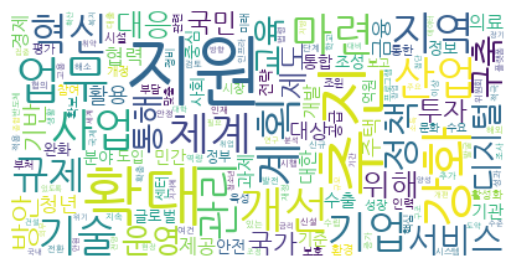

In [ ]:
import matplotlib.pyplot as plt

# 한글 폰트 설치 (NanumGothic)
!apt-get install -y fonts-nanum
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

import pandas as pd
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies({key: count for key, count in Counter(total_tokens).items() if count >= 200})
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Topic modeling

In [ ]:
import numpy as np
import string
import re
import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
len(set(total_tokens))

9507

In [ ]:
# (수업 후) 50개 이상으로 수정
vocabs = [token for token in Counter(total_tokens).keys() if Counter(total_tokens)[token]>=5]

In [ ]:
vocabs[0:10]

['어르신', '천만', '시대', '건강하고', '행복한', '노후', '대책', '관계', '부처', '합동']

In [ ]:
len(vocabs)

3637

In [ ]:
len(cleansed_documents[0])

133

In [ ]:
len(documents[0])

132

In [ ]:
documents = []
for document in cleansed_documents:
  documents.append([token for token in document if token in vocabs])

In [ ]:
len(documents)

1518

In [ ]:
import gensim
from gensim import corpora
from gensim.models import TfidfModel

# Document to Terms
# TF-IDF
def Document2Term(documents):
    dictionary = corpora.Dictionary(documents)
    corpus = [dictionary.doc2bow(document) for document in documents]
    tfidf = TfidfModel(corpus)
    corpus = tfidf[corpus]
    return corpus, dictionary

In [ ]:
# (수업후) 여기서 corpus가 tfidf가 안들어가고 counter가 들었갔던것 같습니다. 수정함
corpus, dictionary = Document2Term(documents)

In [ ]:
corpus[0]

[(0, 0.5669937221759919),
 (1, 0.35587492926606373),
 (2, 0.29072295236932294),
 (3, 0.1903804879186652),
 (4, 0.2880703465630144),
 (5, 0.31604562955624016),
 (6, 0.4982341056048534)]

In [ ]:
# Range of Topics
Ns = [i for i in range(2,11)]
Ns

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
from gensim.models import CoherenceModel # Evaluation
from gensim.models.ldamodel import LdaModel # LDA

In [ ]:
len(dictionary.token2id)

3637

In [ ]:
corpus[0][0:10]

[(0, 0.5669937221759919),
 (1, 0.35587492926606373),
 (2, 0.29072295236932294),
 (3, 0.1903804879186652),
 (4, 0.2880703465630144),
 (5, 0.31604562955624016),
 (6, 0.4982341056048534)]

In [ ]:
# (수업 후) iterations 100, passes = 10 추가

coherence_score_list = []
perplexity_list = []
model_list = []
for num_topics in tqdm(Ns):
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,
                      random_state=2, alpha='auto',iterations = 100, passes = 10)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=cleansed_documents, dictionary=dictionary, coherence='c_v')
    coherence_score_list.append(coherence_model.get_coherence())
    perplexity_list.append(model.log_perplexity(corpus))

100%|██████████| 9/9 [03:21<00:00, 22.42s/it]


In [ ]:
for num_topics, coherence_score in zip(Ns, coherence_score_list):
    print(f'Num Topics: {num_topics}, Coherence Score: {coherence_score}')

Num Topics: 2, Coherence Score: 0.3283128865946364
Num Topics: 3, Coherence Score: 0.2863348793379497
Num Topics: 4, Coherence Score: 0.35202670837073813
Num Topics: 5, Coherence Score: 0.31761287496878765
Num Topics: 6, Coherence Score: 0.37958321722381344
Num Topics: 7, Coherence Score: 0.32430141837465143
Num Topics: 8, Coherence Score: 0.338349648492023
Num Topics: 9, Coherence Score: 0.37748759601840987
Num Topics: 10, Coherence Score: 0.3725702689577151


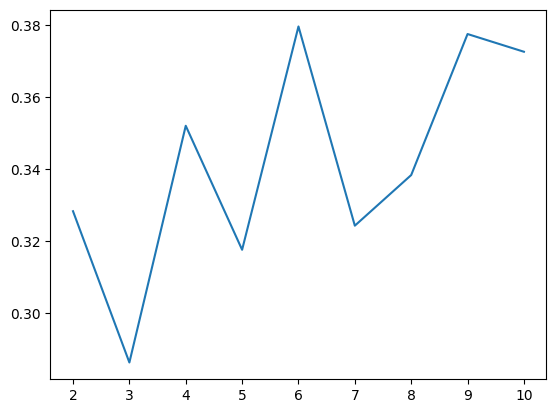

In [ ]:
plt.plot(Ns,coherence_score_list)

In [ ]:
for num_topics, perplexity in zip(Ns, perplexity_list):
    print(f'Num Topics: {num_topics}, Coherence Score: {perplexity}')

Num Topics: 2, Coherence Score: -8.25602223252523
Num Topics: 3, Coherence Score: -8.455307102251085
Num Topics: 4, Coherence Score: -8.803984073258276
Num Topics: 5, Coherence Score: -8.947716500516735
Num Topics: 6, Coherence Score: -9.143384520092027
Num Topics: 7, Coherence Score: -9.306956863754579
Num Topics: 8, Coherence Score: -9.535112793832983
Num Topics: 9, Coherence Score: -9.380079148312797
Num Topics: 10, Coherence Score: -9.724798811983648


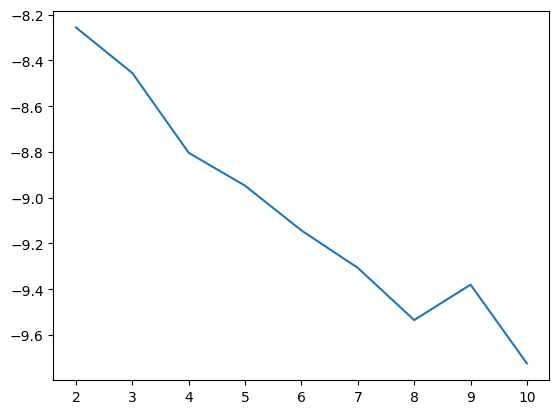

In [ ]:
plt.plot(Ns,perplexity_list)

In [ ]:
len(documents)

1518

In [ ]:
model_list

In [ ]:
# 4번째 모델로 수정
model = model_list[-1]
model.__dict__.keys()

dict_keys(['dtype', 'id2word', 'num_terms', 'distributed', 'num_topics', 'chunksize', 'decay', 'offset', 'minimum_probability', 'num_updates', 'passes', 'update_every', 'eval_every', 'minimum_phi_value', 'per_word_topics', 'callbacks', 'alpha', 'optimize_alpha', 'eta', 'optimize_eta', 'random_state', 'iterations', 'gamma_threshold', 'dispatcher', 'numworkers', 'state', 'expElogbeta', 'lifecycle_events'])

In [ ]:
model.num_topics

10

In [ ]:
for n in range(model.num_topics):
  print(n, model.show_topic(n,5))

0 [('방향', 0.015487922), ('여건', 0.013431234), ('업무', 0.011436993), ('추진', 0.008777839), ('정책', 0.006731239)]
1 [('지원', 0.0060060346), ('산업', 0.005124663), ('확대', 0.0050918376), ('기업', 0.0043099024), ('기술', 0.0041630394)]
2 [('배경', 0.01162189), ('추진', 0.0056459224), ('보건복지부', 0.0050803153), ('어촌', 0.004808565), ('소비자', 0.0043961206)]
3 [('인재', 0.009411575), ('교육', 0.006627456), ('피해자', 0.0060059964), ('양성', 0.0057289735), ('의료', 0.0053920285)]
4 [('해양', 0.0087257065), ('업무', 0.0067297053), ('보도', 0.00670041), ('혁신', 0.0065016123), ('과학기술', 0.0063973553)]
5 [('과제', 0.043998536), ('핵심', 0.036785115), ('추진', 0.02487805), ('업무', 0.020562263), ('계획', 0.017556475)]
6 [('성과', 0.032200966), ('평가', 0.025777847), ('추진', 0.012680682), ('보훈', 0.01071739), ('문화', 0.009138668)]
7 [('국토교통부', 0.0077653453), ('나이', 0.0066772564), ('통일부', 0.0065152305), ('의료', 0.0059013297), ('개정안', 0.0054201386)]
8 [('늘봄', 0.018464154), ('학교', 0.015518496), ('현황', 0.014010201), ('일반', 0.013173583), ('수사', 0.0057096416)]


In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'vis_2.html')

In [ ]:
temp_result_list = []

for i, topic_list in enumerate(model[corpus]):
    doc = topic_list[0] if model.per_word_topics else topic_list
    doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
    highest_prob_topic = doc[0]  # Get the topic with the highest probability
    topic_num, prop_topic = highest_prob_topic
    #temp_list = [file_list[i].split('/')[-1][:-4],int(topic_num), round(prop_topic, 4), topic_list]
    temp_list = ['document %s'%str(i),int(topic_num), round(prop_topic, 4), topic_list]
    temp_result_list.append(temp_list)

temp_result_df = pd.DataFrame(temp_result_list, columns=['Document name','Highest Probabilistic Topic', 'Probability of Highest Topic', 'Probability of Each Topic'])
temp_result_df.head(10)

,Document name,Highest Probabilistic Topic,Probability of Highest Topic,Probability of Each Topic
0,document 0,1,0.7922,"[(0, 0.039273366), (1, 0.79215115), (2, 0.0232..."
1,document 1,3,0.6896,"[(0, 0.05126631), (1, 0.07278534), (2, 0.03028..."
2,document 2,2,0.6106,"[(0, 0.06368791), (1, 0.09033472), (2, 0.61058..."
3,document 3,8,0.6335,"[(0, 0.058961224), (1, 0.0834443), (2, 0.03483..."
4,document 4,1,0.6271,"[(0, 0.07045737), (1, 0.62711084), (2, 0.04165..."
5,document 5,5,0.6647,"[(0, 0.0543653), (1, 0.07712487), (2, 0.032124..."
6,document 6,9,0.6992,"[(0, 0.048188653), (1, 0.06906006), (2, 0.0284..."
7,document 7,8,0.7176,"[(0, 0.04544197), (1, 0.06475578), (2, 0.02677..."
8,document 8,7,0.6812,"[(0, 0.051214505), (1, 0.073803574), (2, 0.030..."
9,document 9,0,0.6916,"[(0, 0.69158936), (1, 0.077040434), (2, 0.0318..."


In [ ]:
temp_result_df.tail(10)

,Document name,Highest Probabilistic Topic,Probability of Highest Topic,Probability of Each Topic
1508,document 1508,1,0.6373,"[(0, 0.20347448), (1, 0.6373361), (3, 0.101239..."
1509,document 1509,1,0.6768,"[(0, 0.18897592), (1, 0.676801), (3, 0.0896868)]"
1510,document 1510,0,0.6000,"[(0, 0.5999917), (1, 0.3366534)]"
1511,document 1511,0,0.7542,"[(0, 0.7541998), (1, 0.061081342), (2, 0.02544..."
1512,document 1512,1,0.7417,"[(0, 0.016390342), (1, 0.7416845), (2, 0.18405..."
1513,document 1513,1,0.3917,"[(0, 0.16620146), (1, 0.39169696), (2, 0.35352..."
1514,document 1514,1,0.4738,"[(0, 0.18857718), (1, 0.4737693), (2, 0.251819..."
1515,document 1515,1,0.4378,"[(0, 0.2291077), (1, 0.43780634), (2, 0.126851..."
1516,document 1516,1,0.5071,"[(0, 0.43484756), (1, 0.5070753)]"
1517,document 1517,1,0.8056,"[(0, 0.13583124), (1, 0.8055873)]"


In [ ]:
model.save('model.bin')

## Assignment 3

In [ ]:
from gensim.models.ldamodel import LdaModel # LDA

In [ ]:
# 각자 directory를 'model.bin'에 넣어주시면 됩니다
model = LdaModel.load('model.bin')

In [ ]:
# model.bin을 Load
# model의 8번째 토픽의 5번째 높은 확률을 가지는 글자 = value1
# model의 0번째 토픽의 5번째 높은 확률을 가지는 글자 = value2
# model의 1번째 토픽의 3번째 높은 확률을 가지는 글자 = value3
# model의 corpus 상에서 id가 245인 글자 = value4
# model의 corpus 상에서 id가 248인 글자 = value5

In [ ]:
import pandas as pd

# 블랙보드에 Assignment_df를 csv 파일 형태로 제출
Assignment_df = pd.DataFrame()
Assignment_df["value"]=[
    value1,value2,value3,value4,value5
]

# your_directory에 각자 저장할 디렉토리 입력
Assignment_df.to_csv(r'your_directory',index=False, encoding = 'utf-8 sig')

# Week6

In [69]:
# One - Hot encoding
import numpy as np

# corpus
corpus = ["Seoul is the capital of Korea",
          "Paris is the capital of France",
          "Washington is the capital of the United States",
          "Seoul Paris and Washington are the capitals"]

# vocab
vocab = list(set(" ".join(corpus).split()))
vocab.sort()

# One-Hot Encoding
def one_hot_encoding(word, vocab):
    one_hot_vector = np.zeros(len(vocab))
    index = vocab.index(word)
    one_hot_vector[index] = 1
    return one_hot_vector

# example
word = 'the'
print(vocab)
print(f"One-Hot Encoding for '{word}': {one_hot_encoding(word, vocab)}")


['France', 'Korea', 'Paris', 'Seoul', 'States', 'United', 'Washington', 'and', 'are', 'capital', 'capitals', 'is', 'of', 'the']
One-Hot Encoding for 'the': [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [71]:
vocab_index = {word: i for i, word in enumerate(vocab)}
vocab_index

{'France': 0,
 'Korea': 1,
 'Paris': 2,
 'Seoul': 3,
 'States': 4,
 'United': 5,
 'Washington': 6,
 'and': 7,
 'are': 8,
 'capital': 9,
 'capitals': 10,
 'is': 11,
 'of': 12,
 'the': 13}

In [77]:
for i, token in enumerate(tokens):
  print(i, token)

0 Seoul
1 Paris
2 and
3 Washington
4 are
5 the
6 capitals


In [78]:
# Co-occurrence matrix

from collections import Counter, defaultdict
import numpy as np

# corpus
corpus = ["Seoul is the capital of Korea",
          "Paris is the capital of France",
          "Washington is the capital of the United States",
          "Seoul Paris and Washington are the capitals"]

# vocab
vocab = list(set(" ".join(corpus).split()))
vocab.sort()

vocab_index = {word: i for i, word in enumerate(vocab)}

# co-occurrence matrix
co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

window_size = 100
for sentence in corpus:
    tokens = sentence.split()
    for i, token in enumerate(tokens):
        token_idx = vocab_index[token]
        context_indices = list(range(max(0, i - window_size), i)) + list(range(i + 1, min(len(tokens), i + window_size + 1)))
        for j in context_indices:
            context_token_idx = vocab_index[tokens[j]]
            co_occurrence_matrix[token_idx, context_token_idx] += 1

print("Co-occurrence Matrix:")
print(co_occurrence_matrix)

Co-occurrence Matrix:
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 2.]
 [0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 2.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 2.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 2.]
 [0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 3.]
 [0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 3. 3. 4.]
 [0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 3. 0. 0. 3. 4.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 3. 0. 3. 0. 4.]
 [1. 1. 2. 2. 2. 2. 3. 1. 1. 4. 1. 4. 4. 2.]]


In [79]:
import pandas as pd

pd.DataFrame(co_occurrence_matrix,index = vocab, columns = vocab)

,France,Korea,Paris,Seoul,States,United,Washington,and,are,capital,capitals,is,of,the
France,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
Korea,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
Paris,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Seoul,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
States,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
United,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
Washington,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
and,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
are,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
capital,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0


In [82]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# corpus
corpus = ["Seoul is the capital of Korea",
          "Paris is the capital of France",
          "Washington is the capital of the United States",
          "Seoul Paris and Washington are the capitals"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]])

In [83]:
vectorizer.get_feature_names_out()

array(['and', 'are', 'capital', 'capitals', 'france', 'is', 'korea', 'of',
       'paris', 'seoul', 'states', 'the', 'united', 'washington'],
      dtype=object)

In [85]:
# Document-Term Matrix

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# corpus
corpus = ["Seoul is the capital of Korea",
          "Paris is the capital of France",
          "Washington is the capital of the United States",
          "Seoul Paris and Washington are the capitals"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("Document-Term Matrix:")
df

Document-Term Matrix:


,and,are,capital,capitals,france,is,korea,of,paris,seoul,states,the,united,washington
0,0,0,1,0,0,1,1,1,0,1,0,1,0,0
1,0,0,1,0,1,1,0,1,1,0,0,1,0,0
2,0,0,1,0,0,1,0,1,0,0,1,2,1,1
3,1,1,0,1,0,0,0,0,1,1,0,1,0,1


In [5]:
X.shape

(4, 14)

In [86]:
pd.DataFrame(X.toarray(),index = ['D%s'%str(i) for i in range(len(corpus))], columns = vectorizer.get_feature_names_out())

,and,are,capital,capitals,france,is,korea,of,paris,seoul,states,the,united,washington
D0,0,0,1,0,0,1,1,1,0,1,0,1,0,0
D1,0,0,1,0,1,1,0,1,1,0,0,1,0,0
D2,0,0,1,0,0,1,0,1,0,0,1,2,1,1
D3,1,1,0,1,0,0,0,0,1,1,0,1,0,1


In [88]:
X.toarray()

array([[0.        , 0.        , 0.36158249, 0.        , 0.        ,
        0.36158249, 0.56648884, 0.36158249, 0.        , 0.44662631,
        0.        , 0.29561738, 0.        , 0.        ],
       [0.        , 0.        , 0.36158249, 0.        , 0.56648884,
        0.36158249, 0.        , 0.36158249, 0.44662631, 0.        ,
        0.        , 0.29561738, 0.        , 0.        ],
       [0.        , 0.        , 0.28737975, 0.        , 0.        ,
        0.28737975, 0.        , 0.28737975, 0.        , 0.        ,
        0.45023591, 0.46990355, 0.45023591, 0.35497117],
       [0.44120572, 0.44120572, 0.        , 0.44120572, 0.        ,
        0.        , 0.        , 0.        , 0.34785166, 0.34785166,
        0.        , 0.23023945, 0.        , 0.34785166]])

In [87]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# corpus
corpus = ["Seoul is the capital of Korea",
          "Paris is the capital of France",
          "Washington is the capital of the United States",
          "Seoul Paris and Washington are the capitals"]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("TF-IDF Matrix:")
print(df)


TF-IDF Matrix:
        and       are   capital  capitals    france        is     korea  \
0  0.000000  0.000000  0.361582  0.000000  0.000000  0.361582  0.566489   
1  0.000000  0.000000  0.361582  0.000000  0.566489  0.361582  0.000000   
2  0.000000  0.000000  0.287380  0.000000  0.000000  0.287380  0.000000   
3  0.441206  0.441206  0.000000  0.441206  0.000000  0.000000  0.000000   

         of     paris     seoul    states       the    united  washington  
0  0.361582  0.000000  0.446626  0.000000  0.295617  0.000000    0.000000  
1  0.361582  0.446626  0.000000  0.000000  0.295617  0.000000    0.000000  
2  0.287380  0.000000  0.000000  0.450236  0.469904  0.450236    0.354971  
3  0.000000  0.347852  0.347852  0.000000  0.230239  0.000000    0.347852  


In [89]:
pd.DataFrame(X.toarray(),index = ['D%s'%str(i) for i in range(len(corpus))], columns = vectorizer.get_feature_names_out())

,and,are,capital,capitals,france,is,korea,of,paris,seoul,states,the,united,washington
D0,0.000000,0.000000,0.361582,0.000000,0.000000,0.361582,0.566489,0.361582,0.000000,0.446626,0.000000,0.295617,0.000000,0.000000
D1,0.000000,0.000000,0.361582,0.000000,0.566489,0.361582,0.000000,0.361582,0.446626,0.000000,0.000000,0.295617,0.000000,0.000000
D2,0.000000,0.000000,0.287380,0.000000,0.000000,0.287380,0.000000,0.287380,0.000000,0.000000,0.450236,0.469904,0.450236,0.354971
D3,0.441206,0.441206,0.000000,0.441206,0.000000,0.000000,0.000000,0.000000,0.347852,0.347852,0.000000,0.230239,0.000000,0.347852


In [107]:
# Word2Vec - CBOW와 Skip-gram

from gensim.models import Word2Vec

# corpus
sentences = [["Seoul", "is", "the", "capital", "of", "Korea"],
             ["Paris", "is", "the", "capital", "of", "France"],
             ["Washington", "is", "the", "capital", "of", "the", "United States"],
             ["Seoul", "Paris", "and", 'Washington', 'are', 'the', "capital"]]

# CBOW
cbow_model = Word2Vec(sentences, vector_size=6, window=1, min_count=0, sg=0)  # sg=0: CBOW
print("CBOW 모델 단어 벡터:")
print(cbow_model.wv['Korea'])

CBOW 모델 단어 벡터:
[-0.01480272  0.09223293 -0.0457039   0.03769546  0.0909077   0.13908568]


In [121]:
# Skip-gram
skipgram_model = Word2Vec(sentences, vector_size=6, window=1, min_count=0, sg=1)  # sg=1: Skip-gram
print("Skip-gram 모델 단어 벡터:")
print(skipgram_model.wv['Korea'])

Skip-gram 모델 단어 벡터:
[-0.04397539 -0.14588045 -0.01428287  0.04710763  0.09003856  0.11756185]


In [108]:
cbow_model.wv.key_to_index

{'the': 0,
 'capital': 1,
 'of': 2,
 'is': 3,
 'Washington': 4,
 'Paris': 5,
 'Seoul': 6,
 'are': 7,
 'and': 8,
 'United States': 9,
 'France': 10,
 'Korea': 11}

In [109]:
cbow_model.wv.vectors.shape

(12, 6)

In [103]:
cbow_model.wv.__dict__

{'vector_size': 12,
 'index_to_key': ['the',
  'capital',
  'of',
  'is',
  'Washington',
  'Paris',
  'Seoul',
  'are',
  'and',
  'United States',
  'France',
  'Korea'],
 'next_index': 0,
 'key_to_index': {'the': 0,
  'capital': 1,
  'of': 2,
  'is': 3,
  'Washington': 4,
  'Paris': 5,
  'Seoul': 6,
  'are': 7,
  'and': 8,
  'United States': 9,
  'France': 10,
  'Korea': 11},
 'vectors': array([[-0.00449187,  0.00195049,  0.04253315,  0.07509472, -0.07755397,
         -0.05929911,  0.05384217,  0.07479783, -0.04177717, -0.03137539,
          0.06150985, -0.01276546],
        [-0.03780423,  0.05461343, -0.04049629, -0.01512242,  0.02395801,
          0.00825982, -0.06903909, -0.07873069,  0.06093184,  0.04224441,
          0.05631842,  0.00635784],
        [ 0.05291627, -0.02838807, -0.00788493,  0.04807535, -0.0626951 ,
         -0.03279657, -0.06259003, -0.00773896,  0.07949487, -0.060996  ,
         -0.01944765, -0.01614412],
        [ 0.0673135 , -0.04942599,  0.00037885, -0.0396

In [114]:
# Word2Vec - CBOW와 Skip-gram

from gensim.models import Word2Vec

# corpus
sentences = [["Seoul", "is", "the", "capital", "of", "Korea"],
             ["Paris", "is", "the", "capital", "of", "France"],
             ["Washington", "is", "the", "capital", "of", "the", "United", "States"],
             ["Seoul", "Paris", "and", 'Washington', 'are', 'the', "capitals"]]

# CBOW
cbow_model = Word2Vec(sentences, vector_size=4, window=1, min_count=0, sg=0)  # sg=0: CBOW
print("CBOW 모델 단어 벡터:")
print(cbow_model.wv['Korea'])

# Skip-gram
skipgram_model = Word2Vec(sentences, vector_size=4, window=1, min_count=0, sg=1)  # sg=1: Skip-gram
print("Skip-gram 모델 단어 벡터:")
print(skipgram_model.wv['Korea'])


CBOW 모델 단어 벡터:
[-0.10343136  0.02061505  0.21249665 -0.11153316]
Skip-gram 모델 단어 벡터:
[-0.103429    0.02061314  0.21245171 -0.11154797]


In [115]:
# Negative sampling
skipgram_ns_model = Word2Vec(sentences, vector_size=4, window=1, min_count=0, sg=1, negative=2)
print("Skip-gram with negative sampling:")
print(skipgram_ns_model.wv['Korea'])

Skip-gram with negative sampling:
[-0.10342693  0.02061313  0.21245842 -0.11154554]


In [116]:
def cosine_similarity(A,B):
  return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(A))

In [122]:
cosine_similarity(skipgram_model.wv['Korea'],skipgram_model.wv['Seoul'])

0.0032894504

In [123]:
cosine_similarity(skipgram_model.wv['Korea'],skipgram_model.wv['France'])

0.68196285

In [14]:
!pip install konlpy

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# 이 링크로 다운로드 해도 됨
#urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
#train_data = pd.read_table('ratings.txt')

('ratings.txt', <http.client.HTTPMessage at 0x7bb4389130a0>)

In [128]:
# train_data.to_csv('Movie_rating.csv',index=False,encoding='utf-8 sig')
train_data = pd.read_csv('/content/drive/MyDrive/Text Mining/Movie_rating.csv') # 여기서 로드해도 됨

In [129]:
len(train_data)

199992

In [130]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [131]:
train_data.dropna(inplace=True)
train_data.reset_index(inplace=True,drop=True)

In [132]:
# Regex
train_data['document'] = train_data['document'].str.replace(r'[^가-힣 ]', "", regex=True)
train_data['document'] = train_data['document'].str.replace(r'[\s+ ]', " ", regex=True)

In [133]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
from tqdm import tqdm

# 불용어 정의
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.nouns(sentence)
    stopwords_removed_sentence = [word for word in tokenized_sentence if len(word)>1]
    tokenized_data.append(stopwords_removed_sentence)

In [ ]:
import pickle

with open('/content/drive/MyDrive/Text Mining/tokenized_data.pkl','wb') as f:
  pickle.dump(tokenized_data,f)

In [134]:
import pickle

with open('/content/drive/MyDrive/Text Mining/tokenized_data.pkl','rb') as f:
  tokenized_data = pickle.load(f)

In [137]:
len(tokenized_data)

199992

In [138]:
tokenized_data[0:5]

[['보고', '지금', '다시'],
 ['디자인',
  '학생',
  '외국',
  '디자이너',
  '일군',
  '전통',
  '통해',
  '발전',
  '문화',
  '산업',
  '사실',
  '우리나라',
  '시절',
  '열정',
  '노라노',
  '전통',
  '사람'],
 ['폴리스스토리', '시리즈', '부터', '하나', '최고'],
 ['연기', '진짜', '생각', '몰입', '진짜', '영화'],
 ['안개', '밤하늘', '초승달', '영화']]

Max length : 66
Average length : 4.658421336853474


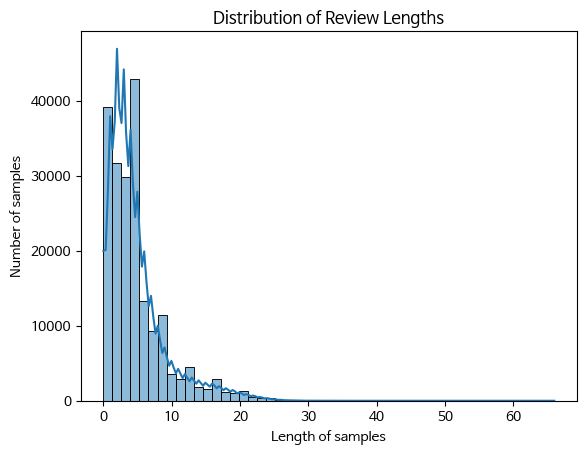

In [139]:
#  Review length distribution
import seaborn as sns

max_length = max(len(review) for review in tokenized_data)
average_length = sum(map(len, tokenized_data)) / len(tokenized_data)

print('Max length :', max_length)
print('Average length :', average_length)

# 리뷰 길이 리스트 생성
review_lengths = [len(review) for review in tokenized_data]

# 히스토그램 그리기 (Seaborn 사용)
sns.histplot(review_lengths, bins=50, kde=True)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Distribution of Review Lengths')
plt.show()

In [140]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 64, window = 2, min_count = 10, workers = 4, sg = 1, negative= 1)

In [141]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(7881, 64)

In [145]:
model.wv.most_similar("송강호")

[('차승원', 0.9300034046173096),
 ('패틴슨', 0.9168546199798584),
 ('능청', 0.9134232401847839),
 ('윤시윤', 0.9075021147727966),
 ('박정민', 0.9024412035942078),
 ('황정민', 0.8988898396492004),
 ('카리스마', 0.8976733088493347),
 ('유해진', 0.8968337774276733),
 ('김창완', 0.8940526843070984),
 ('조진웅', 0.8907859921455383)]

In [146]:
print(model.wv.most_similar("히어로"))

[('고전', 0.915621280670166), ('첩보물', 0.9034578800201416), ('느와르', 0.8881365656852722), ('교과서', 0.8817060589790344), ('판타지', 0.87775057554245), ('궁극', 0.877457857131958), ('컬트', 0.8752431869506836), ('괴수', 0.8744180202484131), ('멜로', 0.8726838231086731), ('히치콕', 0.8621122241020203)]


In [147]:
print(model.wv.most_similar("지브리"))

[('픽사', 0.9502902626991272), ('전쟁영화', 0.9133033156394958), ('비밥', 0.9108489751815796), ('디즈니', 0.9043688178062439), ('라이온킹', 0.9031419157981873), ('클레이', 0.9026364684104919), ('나은', 0.8999553918838501), ('에반게리온', 0.8835275769233704), ('혁신', 0.8800451755523682), ('부영', 0.8773836493492126)]


In [30]:
len(model.wv)

7881

In [148]:
model_1000 = Word2Vec(sentences = tokenized_data, vector_size = 64, window = 2, min_count = 1000, workers = 4, sg = 1, negative= 2)

In [149]:
len(model_1000.wv)

121

In [150]:
plt.rc('axes', unicode_minus=False)

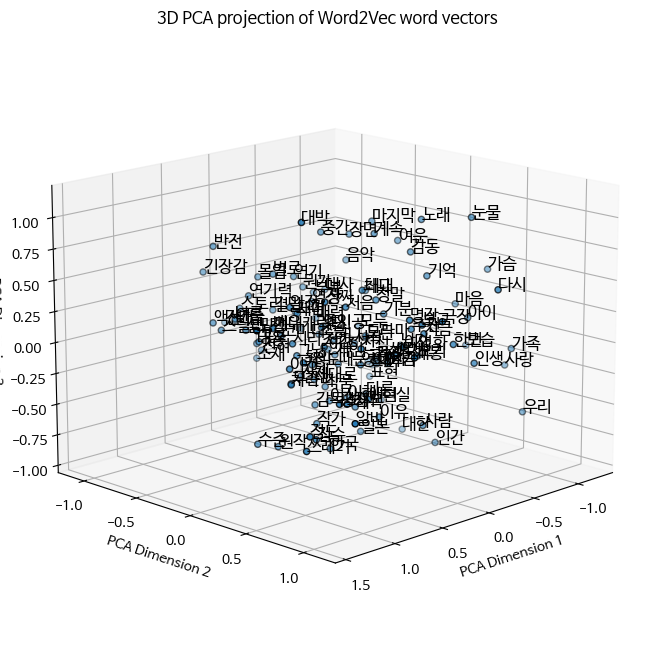

In [151]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

word_vectors = model_1000.wv
words = word_vectors.index_to_key
vectors = word_vectors.vectors

# PCA를 사용하여 3차원으로 축소
pca = PCA(n_components=3)
pca_result = pca.fit_transform(vectors)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], edgecolors='k')

for i, word in enumerate(words):
    ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], word, fontsize=12)

ax.set_title('3D PCA projection of Word2Vec word vectors')
ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.set_zlabel('PCA Dimension 3')

# 그래프 회전 설정 (elev: 위아래 회전, azim: 좌우 회전)
ax.view_init(elev=15, azim=45)

plt.grid(True)
plt.show()

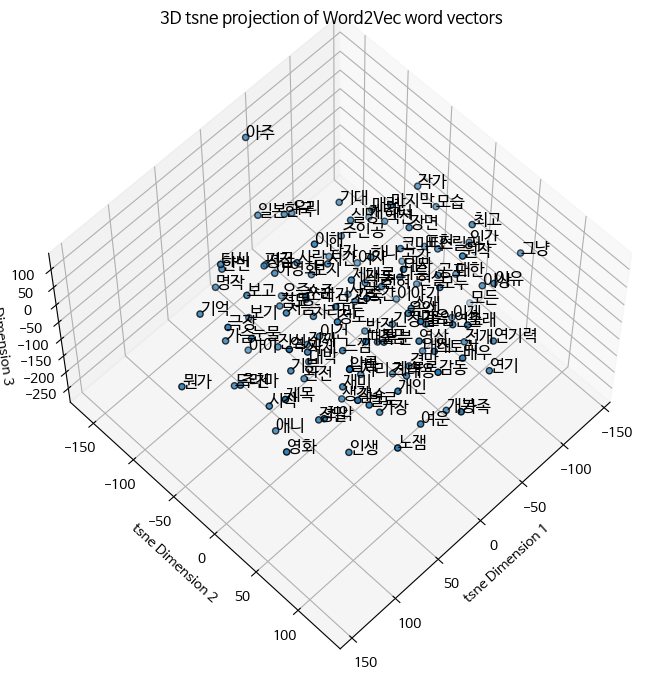

In [154]:
# t-SNE를 사용하여 3차원으로 축소
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(vectors)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], edgecolors='k')

for i, word in enumerate(words):
    ax.text(tsne_result[i, 0], tsne_result[i, 1], tsne_result[i, 2], word, fontsize=12)

ax.set_title('3D tsne projection of Word2Vec word vectors')
ax.set_xlabel('tsne Dimension 1')
ax.set_ylabel('tsne Dimension 2')
ax.set_zlabel('tsne Dimension 3')

# 그래프 회전 설정 (elev: 위아래 회전, azim: 좌우 회전)
ax.view_init(elev=60, azim=45)

plt.grid(True)
plt.show()

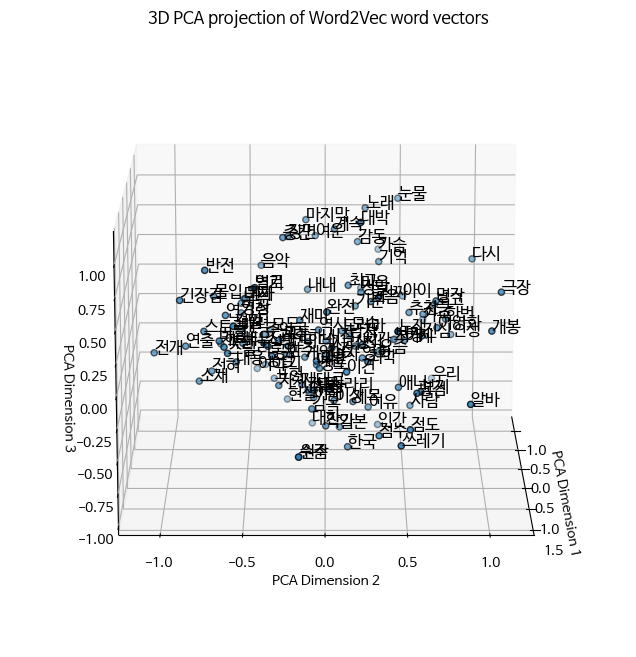

In [155]:
# 3차원 그래프 그리기 (동영상)
from matplotlib.animation import FuncAnimation, PillowWriter

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], edgecolors='k')

for i, word in enumerate(words):
    ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], word, fontsize=12)

ax.set_title('3D PCA projection of Word2Vec word vectors')
ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.set_zlabel('PCA Dimension 3')

def update(frame):
    ax.view_init(elev=15, azim=frame)
    return sc,

# 그래프 회전 설정 (elev: 위아래 회전, azim: 좌우 회전)
ax.view_init(elev=15, azim=45)
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), interval=100)
ani.save("word_vectors_3d.gif", writer='ffmpeg', fps=30)